<a href="https://colab.research.google.com/github/krishnaagarwal80777-droid/Career-Chatbot/blob/main/CRIME_HOTSPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Basic Setup
import pandas as pd
import numpy as np

# Show all columns
pd.set_option('display.max_columns', None)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [ ]:
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')

# Change path to your project folder
os.chdir('/content/drive/MyDrive/CrimeHotspotML')

# Check current directory
!pwd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CrimeHotspotML


In [ ]:
import os

# List files in the data folder
os.listdir('DATA')


['NCRB_Table_1B.4.csv']

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('DATA/NCRB_Table_1B.4.csv')

# Display first few rows
data.head()


Sl. No.                     City  \
0       1      Ahmedabad (Gujarat)   
1       2    Bengaluru (Karnataka)   
2       3     Chennai (Tamil Nadu)   
3       4  Coimbatore (Tamil Nadu)   
4       5               Delhi City   

   Offences affecting the Human Body - Murder (Sec.302 IPC) - I - Col. (3)  \
0                                                100                         
1                                                173                         
2                                                101                         
3                                                 31                         
4                                                501                         

   Offences affecting the Human Body - Murder (Sec.302 IPC) - V - Col. (4)  \
0                                                104                         
1                                                177                         
2                                                103                         
3                                                 31                         
4                                                517                         

   Offences affecting the Human Body - Murder (Sec.302 IPC) - R - Col. (5)  \
0                                                1.6                         
1                                                2.0                         
2                                                1.2                         
3                                                1.4                         
4                                                3.1                         

   Offences affecting the Human Body - Culpable Homicide not amounting to Murder (Sec.304 IPC) - I - Col. (6)  \
0                                                  7                                                            
1                                                 16                                                            
2                                                  2                                                            
3                                                  0                                                            
4                                                 84                                                            

   Offences affecting the Human Body - Culpable Homicide not amounting to Murder (Sec.304 IPC) - V - Col. (7)  \
0                                                 17                                                            
1                                                 19                                                            
2                                                  3                                                            
3                                                  0                                                            
4                                                121                                                            

   Offences affecting the Human Body - Culpable Homicide not amounting to Murder (Sec.304 IPC) - R - Col. (8)  \
0                                                0.1                                                            
1                                                0.2                                                            
2                                                0.0                                                            
3                                                0.0                                                            
4                                                0.5                                                            

   Offences affecting the Human Body - Causing Death by Negligence - Causing Death by Negligence (Sec.304-A IPC) (Total) - I - Col. (9)  \
0                                                468                                                                                      
1                                                90

In [ ]:
# Show info about dataset
data.info()

# Check missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 424 entries, Sl. No. to Total Cognizable IPC crimes - R - Col. (424)
dtypes: float64(124), int64(298), object(2)
memory usage: 66.4+ KB


Sl. No.                                                                    0
City                                                                       0
Offences affecting the Human Body - Murder (Sec.302 IPC) - I - Col. (3)    0
Offences affecting the Human Body - Murder (Sec.302 IPC) - V - Col. (4)    0
Offences affecting the Human Body - Murder (Sec.302 IPC) - R - Col. (5)    0
                                                                          ..
Other IPC Crimes - V - Col. (420)                                          0
Other IPC Crimes - R - Col. (421)                                          0
Total Cognizable IPC crimes - I - Col. (422)                               0
Total Cognizable IPC crimes - V - Col. (423)                               0
Total Cognizable IPC crimes - R - Col. (424)                               0
Length: 424, dtype: int64

In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("DATA/NCRB_Table_1B.4.csv")

# Drop Sl. No. if exists
if "Sl. No." in df.columns:
    df = df.drop(columns=["Sl. No."])

# Shorten column names for easier handling
rename_dict = {
    # Offences Affecting the Human Body
"Offences affecting the Human Body - Murder (Sec.302 IPC) - I - Col. (3)": "Murder_I",
"Offences affecting the Human Body - Murder (Sec.302 IPC) - V - Col. (4)": "Murder_V",
"Offences affecting the Human Body - Murder (Sec.302 IPC) - R - Col. (5)": "Murder_R",
"Offences affecting the Human Body - Culpable Homicide not amounting to Murder (Sec.304 IPC) - I - Col. (6)": "CulpHomicide_I",
"Offences affecting the Human Body - Culpable Homicide not amounting to Murder (Sec.304 IPC) - V - Col. (7)": "CulpHomicide_V",
"Offences affecting the Human Body - Culpable Homicide not amounting to Murder (Sec.304 IPC) - R - Col. (8)": "CulpHomicide_R",
"Offences affecting the Human Body - Causing Death by Negligence - Causing Death by Negligence (Sec.304-A IPC) (Total) - I - Col. (9)": "DeathByNeg_Total_I",
"Offences affecting the Human Body - Causing Death by Negligence - Causing Death by Negligence (Sec.304-A IPC) (Total) - V - Col. (10)": "DeathByNeg_Total_V",
"Offences affecting the Human Body - Causing Death by Negligence - Causing Death by Negligence (Sec.304-A IPC) (Total) - R - Col. (11)": "DeathByNeg_Total_R",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Negligence relating to Road AccidentsDeaths due to Negligence relating to Road Accidents (Total) - I - Col. (12)": "Death_RoadAccident_Total_I",
"Offences affecting the Human Body - Causing Death by Negligence - V - Col. (13)": "Death_RoadAccident_Total_V",
"Offences affecting the Human Body - Causing Death by Negligence - R - Col. (14)": "Death_RoadAccident_Total_R",
"Offences affecting the Human Body - Causing Death by Negligence - A) Hit and Run - I - Col. (15)": "Death_HitAndRun_I",
"Offences affecting the Human Body - Causing Death by Negligence - V - Col. (16)": "Death_HitAndRun_V",
"Offences affecting the Human Body - Causing Death by Negligence - R - Col. (17)": "Death_HitAndRun_R",
"Offences affecting the Human Body - Causing Death by Negligence - B) Other Accidents (other than Hit and Run) - I - Col. (18)": "Death_OtherAccidents_I",
"Offences affecting the Human Body - Causing Death by Negligence - V - Col. (19)": "Death_OtherAccidents_V",
"Offences affecting the Human Body - Causing Death by Negligence - R - Col. (20)": "Death_OtherAccidents_R",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Negligence relating to Rail Accidents - I - Col. (21)": "Death_RailAccident_I",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Negligence relating to Rail Accidents - V - Col. (22)": "Death_RailAccident_V",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Negligence relating to Rail Accidents - R - Col. (23)": "Death_RailAccident_R",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Medical Negligence - I - Col. (24)": "Death_MedicalNeg_I",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Medical Negligence - V - Col. (25)": "Death_MedicalNeg_V",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Medical Negligence - R - Col. (26)": "Death_MedicalNeg_R",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Negligence of Civic Bodies - I - Col. (27)": "Death_CivicNeg_I",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Negligence of Civic Bodies - V - Col. (28)": "Death_CivicNeg_V",
"Offences affecting the Human Body - Causing Death by Negligence - Deaths due to Negligence of Civic Bodies - R - Col. (29)": "Death_CivicNeg_R",
"Offences affecting the Human Body - Causing Death by NegligenceDeaths due to other Negligence - I - Col. (30)": "Death_OtherNeg_I",
"Offences affecting the Human Body - Deaths due to other Negligence - V - Col. (31)": "Death_OtherNeg_V",
"Offences affecting the Human Body - Deaths due to other Negligence - R - Col. (32)": "Death_OtherNeg_R",
"Offences affecting the Human Body - Dowry Deaths (Sec.304-B IPC) - I - Col. (33)": "DowryDeath_I",
"Offences affecting the Human Body - Dowry Deaths (Sec.304-B IPC) - V - Col. (34)": "DowryDeath_V",
"Offences affecting the Human Body - Dowry Deaths (Sec.304-B IPC) - R - Col. (35)": "DowryDeath_R",
"Offences affecting the Human Body - Abetment of Suicide (Sec.305/306 IPC) - I - Col. (36)": "AbetmentSuicide_I",
"Offences affecting the Human Body - Abetment of Suicide (Sec.305/306 IPC) - V - Col. (37)": "AbetmentSuicide_V",
"Offences affecting the Human Body - Abetment of Suicide (Sec.305/306 IPC) - R - Col. (38)": "AbetmentSuicide_R",
"Offences affecting the Human Body - Attempt to Commit Murder (Sec.307 IPC) - I - Col. (39)": "AttemptMurder_I",
"Offences affecting the Human Body - Attempt to Commit Murder (Sec.307 IPC) - V - Col. (40)": "AttemptMurder_V",
"Offences affecting the Human Body - Attempt to Commit Murder (Sec.307 IPC) - R - Col. (41)": "AttemptMurder_R",
"Offences affecting the Human Body - Attempt to commit Culpable Homicide (Sec.308 IPC) - I - Col. (42)": "AttemptCulpHomicide_I",
"Offences affecting the Human Body - Attempt to commit Culpable Homicide (Sec.308 IPC) - V - Col. (43)": "AttemptCulpHomicide_V",
"Offences affecting the Human Body - Attempt to commit Culpable Homicide (Sec.308 IPC) - R - Col. (44)": "AttemptCulpHomicide_R",
"Offences affecting the Human Body - Attempt to Commit Suicide (Sec.309 IPC) - I - Col. (45)": "AttemptSuicide_I",
"Offences affecting the Human Body - Attempt to Commit Suicide (Sec.309 IPC) - V - Col. (46)": "AttemptSuicide_V",
"Offences affecting the Human Body - Attempt to Commit Suicide (Sec.309 IPC) - R - Col. (47)": "AttemptSuicide_R",
"Offences affecting the Human Body - Miscarriage, Infanticide, Foeticide and Abandonment (Sec.313 to 317 IPC) - I - Col. (48)": "Infanticide_Etc_I",
"Offences affecting the Human Body - Miscarriage, Infanticide, Foeticide and Abandonment (Sec.313 to 317 IPC) - V - Col. (49)": "Infanticide_Etc_V",
"Offences affecting the Human Body - Miscarriage, Infanticide, Foeticide and Abandonment (Sec.313 to 317 IPC) - R - Col. (50)": "Infanticide_Etc_R",
"Offences affecting the Human Body - Hurt - Hurt (Simple +Grievous) - I - Col. (51)": "Hurt_Total_I",
"Offences affecting the Human Body - Hurt - Hurt (Simple +Grievous) - V - Col. (52)": "Hurt_Total_V",
"Offences affecting the Human Body - Hurt - Hurt (Simple +Grievous) - R - Col. (53)": "Hurt_Total_R",
"Offences affecting the Human Body - Hurt - Simple Hurt - Simple Hurt (Total) - I - Col. (54)": "Hurt_Simple_Total_I",
"Offences affecting the Human Body - Hurt - Simple Hurt - Simple Hurt (Total) - V - Col. (55)": "Hurt_Simple_Total_V",
"Offences affecting the Human Body - Hurt - Simple Hurt - Simple Hurt (Total) - R - Col. (56)": "Hurt_Simple_Total_R",
"Offences affecting the Human Body - Hurt - Simple Hurt - A) Voluntarily Causing Simple Hurt (Sec.323 r/w 341/342)- I - Col. (57)": "Hurt_Simple_Voluntary_I",
"Offences affecting the Human Body - Hurt - Simple Hurt - A) Voluntarily Causing Simple Hurt (Sec.323 r/w 341/342)- V - Col. (58)": "Hurt_Simple_Voluntary_V",
"Offences affecting the Human Body - Hurt - Simple Hurt - A) Voluntarily Causing Simple Hurt (Sec.323 r/w 341/342)- R - Col. (59)": "Hurt_Simple_Voluntary_R",
"Offences affecting the Human Body - Hurt - Simple Hurt - B) Voluntarily causing hurt by Dangerous weapons or means (Sec.324 IPC) -I - Col. (60)": "Hurt_Simple_DangerousWeapon_I",
"Offences affecting the Human Body - Hurt - Simple Hurt - B) Voluntarily causing hurt by Dangerous weapons or means (Sec.324 IPC) -V - Col. (61)": "Hurt_Simple_DangerousWeapon_V",
"Offences affecting the Human Body - Hurt - Simple Hurt - B) Voluntarily causing hurt by Dangerous weapons or means (Sec.324 IPC) -R - Col. (62)": "Hurt_Simple_DangerousWeapon_R",
"Offences affecting the Human Body - Hurt - Simple Hurt - C) Voluntarily Causing hurt/Force to deter public servant from his duty (Sec.332/353 IPC) - I - Col. (63)": "Hurt_Simple_PublicServant_I",
"Offences affecting the Human Body - Hurt - Simple Hurt - C) Voluntarily Causing hurt/Force to deter public servant from his duty (Sec.332/353 IPC) - V - Col. (64)": "Hurt_Simple_PublicServant_V",
"Offences affecting the Human Body - Hurt - Simple Hurt - C) Voluntarily Causing hurt/Force to deter public servant from his duty (Sec.332/353 IPC) - R - Col. (65)": "Hurt_Simple_PublicServant_R",
"Offences affecting the Human Body - Hurt - Simple Hurt - D) Causing Hurt by act endangering life/safety of others (Sec.336/337) - I - Col. (66)": "Hurt_Simple_EndangeringLife_I",
"Offences affecting the Human Body - Hurt - Simple Hurt - D) Causing Hurt by act endangering life/safety of others (Sec.336/337) - V - Col. (67)": "Hurt_Simple_EndangeringLife_V",
"Offences affecting the Human Body - Hurt - Simple Hurt - D) Causing Hurt by act endangering life/safety of others (Sec.336/337) - R - Col. (68)": "Hurt_Simple_EndangeringLife_R",
"Offences affecting the Human Body - Hurt - Simple Hurt - E) Other Simple Hurt (Sec.327, 328, 330 and 334) - I - Col. (69)": "Hurt_Simple_Other_I",
"Offences affecting the Human Body - Hurt - Simple Hurt - E) Other Simple Hurt (Sec.327, 328, 330 and 334) - V - Col. (70)": "Hurt_Simple_Other_V",
"Offences affecting the Human Body - Hurt - Simple Hurt - E) Other Simple Hurt (Sec.327, 328, 330 and 334) - R - Col. (71)": "Hurt_Simple_Other_R",
"Offences affecting the Human Body - Hurt - Grievous Hurt - Grievous Hurt (Total) - I - Col. (72)": "Hurt_Grievous_Total_I",
"Offences affecting the Human Body - Hurt - Grievous Hurt - Grievous Hurt (Total) - V - Col. (73)": "Hurt_Grievous_Total_V",
"Offences affecting the Human Body - Hurt - Grievous Hurt - Grievous Hurt (Total) - R - Col. (74)": "Hurt_Grievous_Total_R",
"Offences affecting the Human Body - Hurt - Grievous Hurt - A) Voluntarily causing grievous hurt (Sec.325 IPC) - I - Col. (75)": "Hurt_Grievous_Voluntary_I",
"Offences affecting the Human Body - Hurt - Grievous Hurt - A) Voluntarily causing grievous hurt (Sec.325 IPC) - V - Col. (76)": "Hurt_Grievous_Voluntary_V",
"Offences affecting the Human Body - Hurt - Grievous Hurt - A) Voluntarily causing grievous hurt (Sec.325 IPC) - R - Col. (77)": "Hurt_Grievous_Voluntary_R",
"Offences affecting the Human Body - Hurt - Grievous Hurt - B) Voluntarily causing grievous hurt by dangerous weapons or means (Sec.326 IPC) - I - Col. (78)": "Hurt_Grievous_DangerousWeapon_I",
"Offences affecting the Human Body - Hurt - Grievous Hurt - B) Voluntarily causing grievous hurt by dangerous weapons or means (Sec.326 IPC) - V - Col. (79)": "Hurt_Grievous_DangerousWeapon_V",
"Offences affecting the Human Body - Hurt - Grievous Hurt - B) Voluntarily causing grievous hurt by dangerous weapons or means (Sec.326 IPC) - R - Col. (80)": "Hurt_Grievous_DangerousWeapon_R",
"Offences affecting the Human Body - Hurt - Grievous Hurt - C) Acid Attack (Sec.326A IPC) - I - Col. (81)": "Hurt_Grievous_AcidAttack_I",
"Offences affecting the Human Body - Hurt - Grievous Hurt - C) Acid Attack (Sec.326A IPC) - V - Col. (82)": "Hurt_Grievous_AcidAttack_V",
"Offences affecting the Human Body - Hurt - Grievous Hurt - C) Acid Attack (Sec.326A IPC) - R - Col. (83)": "Hurt_Grievous_AcidAttack_R",
"Offences affecting the Human Body - Hurt - Grievous Hurt - D) Attempt to Acid Attack (Sec.326B IPC) - I - Col. (84)": "Hurt_Grievous_AttemptAcidAttack_I",
"Offences affecting the Human Body - Hurt - Grievous Hurt - D) Attempt to Acid Attack (Sec.326B IPC) - V - Col. (85)": "Hurt_Grievous_AttemptAcidAttack_V",
"Offences affecting the Human Body - Hurt - Grievous Hurt - D) Attempt to Acid Attack (Sec.326B IPC) - R - Col. (86)": "Hurt_Grievous_AttemptAcidAttack_R",
"Offences affecting the Human Body - Hurt - Grievous Hurt - E) Voluntarily Causing Grievous hurt/Force to deter public servant from his duty (Sec.333/353 IPC) - I - Col. (87)": "Hurt_Grievous_PublicServant_I",
"Offences affecting the Human Body - Hurt - Grievous Hurt - E) Voluntarily Causing Grievous hurt/Force to deter public servant from his duty (Sec.333/353 IPC) - V - Col. (88)": "Hurt_Grievous_PublicServant_V",
"Offences affecting the Human Body - Hurt - Grievous Hurt - E) Voluntarily Causing Grievous hurt/Force to deter public servant from his duty (Sec.333/353 IPC) - R - Col. (89)": "Hurt_Grievous_PublicServant_R",
"Offences affecting the Human Body - Hurt - Grievous Hurt - F) Causing Grievous Hurt by act endangering life/safety of others (Sec.338 IPC) - I - Col. (90)": "Hurt_Grievous_EndangeringLife_I",
"Offences affecting the Human Body - Hurt - Grievous Hurt - F) Causing Grievous Hurt by act endangering life/safety of others (Sec.338 IPC) - V - Col. (91)": "Hurt_Grievous_EndangeringLife_V",
"Offences affecting the Human Body - Hurt - Grievous Hurt - F) Causing Grievous Hurt by act endangering life/safety of others (Sec.338 IPC) - R - Col. (92)": "Hurt_Grievous_EndangeringLife_R",
"Offences affecting the Human Body - Hurt - Grievous Hurt - G) Other Grievous Hurt (Sec.329, 331 and 335) - I - Col. (93)": "Hurt_Grievous_Other_I",
"Offences affecting the Human Body - Hurt - Grievous Hurt - G) Other Grievous Hurt (Sec.329, 331 and 335) - V - Col. (94)": "Hurt_Grievous_Other_V",
"Offences affecting the Human Body - Hurt - Grievous Hurt - G) Other Grievous Hurt (Sec.329, 331 and 335) - R - Col. (95)": "Hurt_Grievous_Other_R",
"Offences affecting the Human Body - Wrongful Restraint/Confinement (Sec.341 to 348 IPC) - I - Col. (96)": "WrongfulRestraint_I",
"Offences affecting the Human Body - Wrongful Restraint/Confinement (Sec.341 to 348 IPC) - V - Col. (97)": "WrongfulRestraint_V",
"Offences affecting the Human Body - Wrongful Restraint/Confinement (Sec.341 to 348 IPC) - R - Col. (98)": "WrongfulRestraint_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault on Women with Intent to Outrage her Modesty (Total) - I - Col. (99)": "AssaultWomen_Total_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault on Women with Intent to Outrage her Modesty (Total) - V - Col. (100)": "AssaultWomen_Total_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault on Women with Intent to Outrage her Modesty (Total) - R - Col. (101)": "AssaultWomen_Total_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault on Women (Sec. 354 IPC) - I - Col. (102)": "AssaultWomen_354_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault on Women (Sec. 354 IPC) - V - Col. (103)": "AssaultWomen_354_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault on Women (Sec. 354 IPC) - R - Col. (104)": "AssaultWomen_354_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - Sexual Harassment (Sec.354A IPC) (Total) - I - Col. (105)": "SexualHarassment_Total_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - Sexual Harassment (Sec.354A IPC) (Total) - V - Col. (106)": "SexualHarassment_Total_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - Sexual Harassment (Sec.354A IPC) (Total) - R - Col. (107)": "SexualHarassment_Total_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - a) at Work or Office Premises - I - Col. (108)": "SexualHarassment_Work_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - a) at Work or Office Premises - V - Col. (109)": "SexualHarassment_Work_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - a) at Work or Office Premises - R - Col. (110)": "SexualHarassment_Work_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - b) In Public Transport System - I - Col. (111)": "SexualHarassment_Transport_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - b) In Public Transport System - V - Col. (112)": "SexualHarassment_Transport_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - b) In Public Transport System - R - Col. (113)": "SexualHarassment_Transport_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - c) In Shelter Homes for women and Children - I - Col. (114)": "SexualHarassment_Shelter_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - c) In Shelter Homes for women and Children - V - Col. (115)": "SexualHarassment_Shelter_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - c) In Shelter Homes for women and Children - R - Col. (116)": "SexualHarassment_Shelter_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - d) Other Places - I - Col. (117)": "SexualHarassment_OtherPlace_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - d) Other Places - V - Col. (118)": "SexualHarassment_OtherPlace_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Sexual Harassment - d) Other Places - R - Col. (119)": "SexualHarassment_OtherPlace_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault or use of Criminal Force on women with intent to Disrobe (Sec.354B IPC) - I - Col. (120)": "AssaultWomen_Disrobe_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault or use of Criminal Force on women with intent to Disrobe (Sec.354B IPC) - V - Col. (121)": "AssaultWomen_Disrobe_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Assault or use of Criminal Force on women with intent to Disrobe (Sec.354B IPC) - R - Col. (122)": "AssaultWomen_Disrobe_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Voyeurism (Sec.354C IPC) - I - Col. (123)": "Voyeurism_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Voyeurism (Sec.354C IPC) - V - Col. (124)": "Voyeurism_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Voyeurism (Sec.354C IPC) - R - Col. (125)": "Voyeurism_R",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Stalking (Sec.354D IPC) - I - Col. (126)": "Stalking_I",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Stalking (Sec.354D IPC) - V - Col. (127)": "Stalking_V",
"Offences affecting the Human Body - Assault on Women with Intent to Outrage her Modesty - Stalking (Sec.354D IPC) - R - Col. (128)": "Stalking_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Total) - I - Col. (129)": "Kidnapping_Total_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Total) - V - Col. (130)": "Kidnapping_Total_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Total) - R - Col. (131)": "Kidnapping_Total_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - Kidnapping and Abduction (Sec.363 IPC) - I - Col. (132)": "Kidnapping_363_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - Kidnapping and Abduction (Sec.363 IPC) - V - Col. (133)": "Kidnapping_363_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - Kidnapping and Abduction (Sec.363 IPC) - R - Col. (134)": "Kidnapping_363_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - A) Missing Children Deemed as Kidnapped - I - Col. (135)": "Kidnapping_MissingChildren_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - A) Missing Children Deemed as Kidnapped - V - Col. (136)": "Kidnapping_MissingChildren_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - A) Missing Children Deemed as Kidnapped - R - Col. (137)": "Kidnapping_MissingChildren_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - B) Other Kidnapping and Abduction - I - Col. (138)": "Kidnapping_Other_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - B) Other Kidnapping and Abduction - V - Col. (139)": "Kidnapping_Other_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction (Sec.363 IPC) - B) Other Kidnapping and Abduction - R - Col. (140)": "Kidnapping_Other_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction for the Purpose of Begging (Sec 363A IPC) - I - Col. (141)": "Kidnapping_Begging_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction for the Purpose of Begging (Sec 363A IPC) - V - Col. (142)": "Kidnapping_Begging_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction for the Purpose of Begging (Sec 363A IPC) - R - Col. (143)": "Kidnapping_Begging_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction in order to Murder (Sec.364 IPC) - I - Col. (144)": "Kidnapping_Murder_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction in order to Murder (Sec.364 IPC) - V - Col. (145)": "Kidnapping_Murder_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction in order to Murder (Sec.364 IPC) - R - Col. (146)": "Kidnapping_Murder_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping for Ransom (Sec.364A IPC) - I - Col. (147)": "Kidnapping_Ransom_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping for Ransom (Sec.364A IPC) - V - Col. (148)": "Kidnapping_Ransom_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping for Ransom (Sec.364A IPC) - R - Col. (149)": "Kidnapping_Ransom_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction of Women to compel her for marriage (Sec.366 IPC) - I - Col. (150)": "Kidnapping_Marriage_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction of Women to compel her for marriage (Sec.366 IPC) - V - Col. (151)": "Kidnapping_Marriage_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Kidnapping and Abduction of Women to compel her for marriage (Sec.366 IPC) - R - Col. (152)": "Kidnapping_Marriage_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Procuration of Minor Girls (Sec.366A) - I - Col. (153)": "ProcurationMinor_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Procuration of Minor Girls (Sec.366A) - V - Col. (154)": "ProcurationMinor_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Procuration of Minor Girls (Sec.366A) - R - Col. (155)": "ProcurationMinor_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Importation of Girls from Foreign Country (Sec.366-B IPC) - I - Col. (156)": "ImportationGirls_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Importation of Girls from Foreign Country (Sec.366-B IPC) - V - Col. (157)": "ImportationGirls_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Importation of Girls from Foreign Country (Sec.366-B IPC) - R - Col. (158)": "ImportationGirls_R",
"Offences affecting the Human Body - Kidnapping and Abduction - Other Kidnapping and Abduction (Sec.365, 367, 368, 369 IPC) - I - Col. (159)": "Kidnapping_OtherIPC_I",
"Offences affecting the Human Body - Kidnapping and Abduction - Other Kidnapping and Abduction (Sec.365, 367, 368, 369 IPC) - V - Col. (160)": "Kidnapping_OtherIPC_V",
"Offences affecting the Human Body - Kidnapping and Abduction - Other Kidnapping and Abduction (Sec.365, 367, 368, 369 IPC) - R - Col. (161)": "Kidnapping_OtherIPC_R",
"Offences affecting the Human Body - Human Trafficking (Sec 370 IPC) - I - Col. (162)": "HumanTrafficking_370_I",
"Offences affecting the Human Body - Human Trafficking (Sec 370 IPC) - V - Col. (163)": "HumanTrafficking_370_V",
"Offences affecting the Human Body - Human Trafficking (Sec 370 IPC) - R - Col. (164)": "HumanTrafficking_370_R",
"Offences affecting the Human Body - Exploitation of Trafficked Person (Sec. 370A IPC) - I - Col. (165)": "ExploitationTrafficked_I",
"Offences affecting the Human Body - Exploitation of Trafficked Person (Sec. 370A IPC) - V - Col. (166)": "ExploitationTrafficked_V",
"Offences affecting the Human Body - Exploitation of Trafficked Person (Sec. 370A IPC) - R - Col. (167)": "ExploitationTrafficked_R",
"Offences affecting the Human Body - Selling of Minors for Prostitution (Sec.372 IPC) - I - Col. (168)": "SellingMinor_Prostitution_I",
"Offences affecting the Human Body - Selling of Minors for Prostitution (Sec.372 IPC) - V - Col. (169)": "SellingMinor_Prostitution_V",
"Offences affecting the Human Body - Selling of Minors for Prostitution (Sec.372 IPC) - R - Col. (170)": "SellingMinor_Prostitution_R",
"Offences affecting the Human Body - Buying of Minors for Prostitution (Sec.373 IPC) - I - Col. (171)": "BuyingMinor_Prostitution_I",
"Offences affecting the Human Body - Buying of Minors for Prostitution (Sec.373 IPC) - V - Col. (172)": "BuyingMinor_Prostitution_V",
"Offences affecting the Human Body - Buying of Minors for Prostitution (Sec.373 IPC) - R - Col. (173)": "BuyingMinor_Prostitution_R",
"Offences affecting the Human Body - Rape (Sec.376 IPC) - I - Col. (174)": "Rape_I",
"Offences affecting the Human Body - Rape (Sec.376 IPC) - V - Col. (175)": "Rape_V",
"Offences affecting the Human Body - Rape (Sec.376 IPC) - R - Col. (176)": "Rape_R",
"Offences affecting the Human Body - Attempt to Commit Rape (Sec.376/511 IPC) - I - Col. (177)": "AttemptRape_I",
"Offences affecting the Human Body - Attempt to Commit Rape (Sec.376/511 IPC) - V - Col. (178)": "AttemptRape_V",
"Offences affecting the Human Body - Attempt to Commit Rape (Sec.376/511 IPC) - R - Col. (179)": "AttemptRape_R",
"Offences affecting the Human Body - Unnatural Offences (Sec.377 IPC) - I - Col. (180)": "UnnaturalOffences_I",
"Offences affecting the Human Body - Unnatural Offences (Sec.377 IPC) - V - Col. (181)": "UnnaturalOffences_V",
"Offences affecting the Human Body - Unnatural Offences (Sec.377 IPC) - R - Col. (182)": "UnnaturalOffences_R",
"Offences affecting the Human Body - Offences Affecting the Human Body (Total) - I - Col. (183)": "HumanBody_Total_I",
"Offences affecting the Human Body - Offences Affecting the Human Body (Total) - V - Col. (184)": "HumanBody_Total_V",
"Offences affecting the Human Body - Offences Affecting the Human Body (Total) - R - Col. (185)": "HumanBody_Total_R",

# Offences against State
"Offences against State - Sedition (Sec.124A IPC) - I - Col. (186)": "Sedition_I",
"Offences against State - Sedition (Sec.124A IPC) - V - Col. (187)": "Sedition_V",
"Offences against State - Sedition (Sec.124A IPC) - R - Col. (188)": "Sedition_R",
"Offences against State - Others (Sec.121, 121A, 122 and 123 IPC) - I - Col. (189)": "StateOffences_Other_I",
"Offences against State - Others (Sec.121, 121A, 122 and 123 IPC) - V - Col. (190)": "StateOffences_Other_V",
"Offences against State - Others (Sec.121, 121A, 122 and 123 IPC) - R - Col. (191)": "StateOffences_Other_R",
"Offences against State - Offences against the State (Total) - I - Col. (192)": "StateOffences_Total_I",
"Offences against State - Offences against the State (Total) - V - Col. (193)": "StateOffences_Total_V",
"Offences against State - Offences against the State (Total) - R - Col. (194)": "StateOffences_Total_R",

# Offences against Public Tranquility
"Offences against Public Tranquility - Unlawful Assembly (Sec.143, 144 and 145) - I - Col. (195)": "UnlawfulAssembly_I",
"Offences against Public Tranquility - Unlawful Assembly (Sec.143, 144 and 145) - R - Col. (196)": "UnlawfulAssembly_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - Rioting (Total) - I - Col. (197)": "Rioting_Total_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - Rioting (Total) - V - Col. (198)": "Rioting_Total_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - Rioting (Total) - R - Col. (199)": "Rioting_Total_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - A) Communal/ Religious - I - Col. (200)": "Rioting_Communal_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - A) Communal/ Religious - V - Col. (201)": "Rioting_Communal_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - A) Communal/ Religious - R - Col. (202)": "Rioting_Communal_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - B) Sectarian - I - Col. (203)": "Rioting_Sectarian_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - B) Sectarian - V - Col. (204)": "Rioting_Sectarian_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - B) Sectarian - R - Col. (205)": "Rioting_Sectarian_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - C) Industrial - I - Col. (206)": "Rioting_Industrial_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - C) Industrial - V - Col. (207)": "Rioting_Industrial_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - C) Industrial - R - Col. (208)": "Rioting_Industrial_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - D) Political - I - Col. (209)": "Rioting_Political_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - D) Political - V - Col. (210)": "Rioting_Political_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - D) Political - R - Col. (211)": "Rioting_Political_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - E) Caste Conflict - I - Col. (212)": "Rioting_Caste_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - E) Caste Conflict - V - Col. (213)": "Rioting_Caste_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - E) Caste Conflict - R - Col. (214)": "Rioting_Caste_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - F) Agrarian - I - Col. (215)": "Rioting_Agrarian_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - F) Agrarian - V - Col. (216)": "Rioting_Agrarian_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - F) Agrarian - R - Col. (217)": "Rioting_Agrarian_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - G) Students - I - Col. (218)": "Rioting_Students_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - G) Students - V - Col. (219)": "Rioting_Students_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - G) Students - R - Col. (220)": "Rioting_Students_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - H) Money Dispute - I - Col. (221)": "Rioting_MoneyDispute_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - H) Money Dispute - V - Col. (222)": "Rioting_MoneyDispute_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - H) Money Dispute - R - Col. (223)": "Rioting_MoneyDispute_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - I) Water Dispute - I - Col. (224)": "Rioting_WaterDispute_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - I) Water Dispute - V - Col. (225)": "Rioting_WaterDispute_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - I) Water Dispute - R - Col. (226)": "Rioting_WaterDispute_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - J) Land/Property Dispute - I - Col. (227)": "Rioting_LandDispute_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - J) Land/Property Dispute - V - Col. (228)": "Rioting_LandDispute_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - J) Land/Property Dispute - R - Col. (229)": "Rioting_LandDispute_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - K) Family Disputes - I - Col. (230)": "Rioting_FamilyDisputes_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - K) Family Disputes - V - Col. (231)": "Rioting_FamilyDisputes_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - K) Family Disputes - R - Col. (232)": "Rioting_FamilyDisputes_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - L) Enmity/Rivalry - I - Col. (233)": "Rioting_Enmity_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - L) Enmity/Rivalry - V - Col. (234)": "Rioting_Enmity_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - L) Enmity/Rivalry - R - Col. (235)": "Rioting_Enmity_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - M) Electricity/Power Supply Disputes - I - Col. (236)": "Rioting_PowerDisputes_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - M) Electricity/Power Supply Disputes - V - Col. (237)": "Rioting_PowerDisputes_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - M) Electricity/Power Supply Disputes - R - Col. (238)": "Rioting_PowerDisputes_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - N) Rioting while in Aandolan/Morcha - I - Col. (239)": "Rioting_Morcha_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - N) Rioting while in Aandolan/Morcha - V - Col. (240)": "Rioting_Morcha_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - N) Rioting while in Aandolan/Morcha - R - Col. (241)": "Rioting_Morcha_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - O) Rioting/Attacks on Police Personnel or Govt Servants - I - Col. (242)": "Rioting_AttacksOnPolice_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - O) Rioting/Attacks on Police Personnel or Govt Servants - V - Col. (243)": "Rioting_AttacksOnPolice_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - O) Rioting/Attacks on Police Personnel or Govt Servants - R - Col. (244)": "Rioting_AttacksOnPolice_R",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - P) Other Rioting - I - Col. (245)": "Rioting_Other_I",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - P) Other Rioting - V - Col. (246)": "Rioting_Other_V",
"Offences against Public Tranquility - Rioting (Sec.147-151 IPC) - P) Other Rioting - R - Col. (247)": "Rioting_Other_R",
"Offences against Public Tranquility - Offences promoting enmity between different groups (Total) - I - Col. (248)": "EnmityGroups_Total_I",
"Offences against Public Tranquility - Offences promoting enmity between different groups (Total) - V - Col. (249)": "EnmityGroups_Total_V",
"Offences against Public Tranquility - Offences promoting enmity between different groups (Total) - R - Col. (250)": "EnmityGroups_Total_R",
"Offences against Public Tranquility - Offences promoting enmity between different groups - A) Promoting enmity between groups (Sec.153A and 153AA IPC) - I - Col. (251)": "EnmityGroups_153A_I",
"Offences against Public Tranquility - Offences promoting enmity between different groups - A) Promoting enmity between groups (Sec.153A and 153AA IPC) - V - Col. (252)": "EnmityGroups_153A_V",
"Offences against Public Tranquility - Offences promoting enmity between different groups - A) Promoting enmity between groups (Sec.153A and 153AA IPC) - R - Col. (253)": "EnmityGroups_153A_R",
"Offences against Public Tranquility - Offences promoting enmity between different groups - B) Imputation, assertions prejudicial to national integration (Sec.153 B IPC) - I - Col. (254)": "EnmityGroups_153B_I",
"Offences against Public Tranquility - Offences promoting enmity between different groups - B) Imputation, assertions prejudicial to national integration (Sec.153 B IPC) - V - Col. (255)": "EnmityGroups_153B_V",
"Offences against Public Tranquility - Offences promoting enmity between different groups - B) Imputation, assertions prejudicial to national integration (Sec.153 B IPC) - R - Col. (256)": "EnmityGroups_153B_R",
"Offences against Public Tranquility - Affray (Sec.159 and 160 IPC) - I - Col. (257)": "Affray_I",
"Offences against Public Tranquility - Affray (Sec.159 and 160 IPC) - V - Col. (258)": "Affray_V",
"Offences against Public Tranquility - Affray (Sec.159 and 160 IPC) - R - Col. (259)": "Affray_R",
"Offences against Public Tranquility - Offences against Public Tranquility (Total) - I - Col. (260)": "PublicTranquility_Total_I",
"Offences against Public Tranquility - Offences against Public Tranquility (Total) - V - Col. (261)": "PublicTranquility_Total_V",
"Offences against Public Tranquility - Offences against Public Tranquility (Total) - R - Col. (262)": "PublicTranquility_Total_R",

# Offences against Property
"Offences against Property - Theft (Section 379 IPC) - Theft (Total) - I - Col. (263)": "Theft_Total_I",
"Offences against Property - Theft (Section 379 IPC) - Theft (Total) - V - Col. (264)": "Theft_Total_V",
"Offences against Property - Theft (Section 379 IPC) - Theft (Total) - R - Col. (265)": "Theft_Total_R",
"Offences against Property - Theft (Section 379 IPC) - A) Auto/Motor Vehicle Theft - I - Col. (266)": "Theft_MotorVehicle_I",
"Offences against Property - Theft (Section 379 IPC) - A) Auto/Motor Vehicle Theft - V - Col. (267)": "Theft_MotorVehicle_V",
"Offences against Property - Theft (Section 379 IPC) - A) Auto/Motor Vehicle Theft - R - Col. (268)": "Theft_MotorVehicle_R",
"Offences against Property - Theft (Section 379 IPC) - B) Other Thefts - I - Col. (269)": "Theft_Other_I",
"Offences against Property - Theft (Section 379 IPC) - B) Other Thefts - V - Col. (270)": "Theft_Other_V",
"Offences against Property - Theft (Section 379 IPC) - B) Other Thefts - R - Col. (271)": "Theft_Other_R",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - Burglary (Total) - I - Col. (272)": "Burglary_Total_I",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - Burglary (Total) - V - Col. (273)": "Burglary_Total_V",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - Burglary (Total) - R - Col. (274)": "Burglary_Total_R",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - A) Day Time - I - Col. (275)": "Burglary_Day_I",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - A) Day Time - V - Col. (276)": "Burglary_Day_V",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - A) Day Time - R - Col. (277)": "Burglary_Day_R",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - B) Night- I - Col. (278)": "Burglary_Night_I",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - B) Night- V - Col. (279)": "Burglary_Night_V",
"Offences against Property - Burglary (Sec.454 to 460 r/w Sec.380 IPC) - B) Night- R - Col. (280)": "Burglary_Night_R",
"Offences against Property - Extortion and Blackmailing (Sec.384 to 389 IPC) - I - Col. (281)": "Extortion_I",
"Offences against Property - Extortion and Blackmailing (Sec.384 to 389 IPC) - V - Col. (282)": "Extortion_V",
"Offences against Property - Extortion and Blackmailing (Sec.384 to 389 IPC) - R - Col. (283)": "Extortion_R",
"Offences against Property - Robbery (Sec.392/394/397 IPC) - I - Col. (284)": "Robbery_I",
"Offences against Property - Robbery (Sec.392/394/397 IPC) - V - Col. (285)": "Robbery_V",
"Offences against Property - Robbery (Sec.392/394/397 IPC) - R - Col. (286)": "Robbery_R",
"Offences against Property - Attempt to Commit Dacoity/Robbery (Sec.393 and 398 IPC) - I - Col. (287)": "AttemptDacoityRobbery_I",
"Offences against Property - Attempt to Commit Dacoity/Robbery (Sec.393 and 398 IPC) - V - Col. (288)": "AttemptDacoityRobbery_V",
"Offences against Property - Attempt to Commit Dacoity/Robbery (Sec.393 and 398 IPC) - R - Col. (289)": "AttemptDacoityRobbery_R",
"Offences against Property - Dacoity - Dacoity (Total) - I - Col. (290)": "Dacoity_Total_I",
"Offences against Property - Dacoity - Dacoity (Total) - V - Col. (291)": "Dacoity_Total_V",
"Offences against Property - Dacoity - Dacoity (Total) - R - Col. (292)": "Dacoity_Total_R",
"Offences against Property - Dacoity - A) Dacoity (Sec.395/397 IPC) - I - Col. (293)": "Dacoity_395_I",
"Offences against Property - Dacoity - A) Dacoity (Sec.395/397 IPC) - V - Col. (294)": "Dacoity_395_V",
"Offences against Property - Dacoity - A) Dacoity (Sec.395/397 IPC) - R - Col. (295)": "Dacoity_395_R",
"Offences against Property - Dacoity - B) Dacoity with Murder (Sec.396 IPC) - I - Col. (296)": "Dacoity_Murder_I",
"Offences against Property - Dacoity - B) Dacoity with Murder (Sec.396 IPC) - V - Col. (297)": "Dacoity_Murder_V",
"Offences against Property - Dacoity - B) Dacoity with Murder (Sec.396 IPC) - R - Col. (298)": "Dacoity_Murder_R",
"Offences against Property - Making Preparation and Assembly for committing Dacoity (Sec.399 and 402 IPC) - I - Col. (299)": "Dacoity_Preparation_I",
"Offences against Property - Making Preparation and Assembly for committing Dacoity (Sec.399 and 402 IPC) - V - Col. (300)": "Dacoity_Preparation_V",
"Offences against Property - Making Preparation and Assembly for committing Dacoity (Sec.399 and 402 IPC) - R - Col. (301)": "Dacoity_Preparation_R",
"Offences against Property - Criminal Misappropriation (Sec.403/404 r/w Other IPC) - I - Col. (302)": "CriminalMisappropriation_I",
"Offences against Property - Criminal Misappropriation (Sec.403/404 r/w Other IPC) - V - Col. (303)": "CriminalMisappropriation_V",
"Offences against Property - Criminal Misappropriation (Sec.403/404 r/w Other IPC) - R - Col. (304)": "CriminalMisappropriation_R",
"Offences against Property - Criminal Breach of Trust (Sec.406 to 409 IPC) - I - Col. (305)": "CriminalBreachOfTrust_I",
"Offences against Property - Criminal Breach of Trust (Sec.406 to 409 IPC) - V - Col. (306)": "CriminalBreachOfTrust_V",
"Offences against Property - Criminal Breach of Trust (Sec.406 to 409 IPC) - R - Col. (307)": "CriminalBreachOfTrust_R",
"Offences against Property - Dishonestly Receiving/Dealing-in Stolen Property (Sec.411 to 414 IPC) - I - Col. (308)": "StolenProperty_I",
"Offences against Property - Dishonestly Receiving/Dealing-in Stolen Property (Sec.411 to 414 IPC) - V - Col. (309)": "StolenProperty_V",
"Offences against Property - Dishonestly Receiving/Dealing-in Stolen Property (Sec.411 to 414 IPC) - R - Col. (310)": "StolenProperty_R",
"Offences against Property - Offences against Property (Total) - I - Col. (311)": "PropertyOffences_Total_I",
"Offences against Property - Offences against Property (Total) - V - Col. (312)": "PropertyOffences_Total_V",
"Offences against Property - Offences against Property (Total) - R - Col. (313)": "PropertyOffences_Total_R",

# Offences Relating to Documents and Property Marks
"Offences Relating to Documents and Property Marks - Counterfeiting - Counterfeiting (Total) - I - Col. (314)": "Counterfeiting_Total_I",
"Offences Relating to Documents and Property Marks - Counterfeiting - Counterfeiting (Total) - V - Col. (315)": "Counterfeiting_Total_V",
"Offences Relating to Documents and Property Marks - Counterfeiting - Counterfeiting (Total) - R - Col. (316)": "Counterfeiting_Total_R",
"Offences Relating to Documents and Property Marks - Counterfeiting - A) Counterfeit Coin (Sec.231-235,237,238-240 and 242-254 IPC) - I - Col. (317)": "Counterfeiting_Coin_I",
"Offences Relating to Documents and Property Marks - Counterfeiting - A) Counterfeit Coin (Sec.231-235,237,238-240 and 242-254 IPC) - V - Col. (318)": "Counterfeiting_Coin_V",
"Offences Relating to Documents and Property Marks - Counterfeiting - A) Counterfeit Coin (Sec.231-235,237,238-240 and 242-254 IPC) - R - Col. (319)": "Counterfeiting_Coin_R",
"Offences Relating to Documents and Property Marks - Counterfeiting - B) Counterfeiting Government Stamp (Sec.255 to 260 IPC) - I - Col. (320)": "Counterfeiting_Stamp_I",
"Offences Relating to Documents and Property Marks - Counterfeiting - B) Counterfeiting Government Stamp (Sec.255 to 260 IPC) - V - Col. (321)": "Counterfeiting_Stamp_V",
"Offences Relating to Documents and Property Marks - Counterfeiting - B) Counterfeiting Government Stamp (Sec.255 to 260 IPC) - R - Col. (322)": "Counterfeiting_Stamp_R",
"Offences Relating to Documents and Property Marks - Counterfeiting - C) Counterfeiting of Seal or Mark (Sec.472/473 IPC) - I - Col. (323)": "Counterfeiting_Seal_I",
"Offences Relating to Documents and Property Marks - Counterfeiting - C) Counterfeiting of Seal or Mark (Sec.472/473 IPC) - V - Col. (324)": "Counterfeiting_Seal_V",
"Offences Relating to Documents and Property Marks - Counterfeiting - C) Counterfeiting of Seal or Mark (Sec.472/473 IPC) - R - Col. (325)": "Counterfeiting_Seal_R",
"Offences Relating to Documents and Property Marks - Counterfeiting - D) Counterfeit Currency and Bank notes (Sec.489-A to 489-E IPC) - I - Col. (326)": "Counterfeiting_Currency_I",
"Offences Relating to Documents and Property Marks - Counterfeiting - D) Counterfeit Currency and Bank notes (Sec.489-A to 489-E IPC) - V - Col. (327)": "Counterfeiting_Currency_V",
"Offences Relating to Documents and Property Marks - Counterfeiting - D) Counterfeit Currency and Bank notes (Sec.489-A to 489-E IPC) - R - Col. (328)": "Counterfeiting_Currency_R",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Forgery, Cheating and Fraud (Total) - I - Col. (329)": "ForgeryCheatingFraud_Total_I",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Forgery, Cheating and Fraud (Total) - V - Col. (330)": "ForgeryCheatingFraud_Total_V",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Forgery, Cheating and Fraud (Total) - R - Col. (331)": "ForgeryCheatingFraud_Total_R",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - Fraud (Sec.420 r/w Sec.465,468-471 IPC/IT Act) - I - Col. (332)": "Fraud_420_471_I",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - Fraud (Sec.420 r/w Sec.465,468-471 IPC/IT Act) - V - Col. (333)": "Fraud_420_471_V",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - Fraud (Sec.420 r/w Sec.465,468-471 IPC/IT Act) - R - Col. (334)": "Fraud_420_471_R",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - a) Bank - I - Col. (335)": "Fraud_Bank_I",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - a) Bank - V - Col. (336)": "Fraud_Bank_V",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - a) Bank - R - Col. (337)": "Fraud_Bank_R",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - b) ATMs - I - Col. (338)": "Fraud_ATM_I",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - b) ATMs - V - (339)": "Fraud_ATM_V",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - b) ATMs - R - Col. (340)": "Fraud_ATM_R",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - c) Credit Card/Debit Card - I - Col. (341)": "Fraud_Card_I",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - c) Credit Card/Debit Card - V - Col. (342)": "Fraud_Card_V",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - c) Credit Card/Debit Card - R - Col. (343)": "Fraud_Card_R",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - d) Other Frauds - I - Col. (344)": "Fraud_Other_I",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - d) Other Frauds - V - Col. (345)": "Fraud_Other_V",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Fraud - d) Other Frauds - R - Col. (346)": "Fraud_Other_R",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Cheating (Sec.420 IPC) - I - Col. (347)": "Cheating_420_I",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Cheating (Sec.420 IPC) - V - Col. (348)": "Cheating_420_V",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Cheating (Sec.420 IPC) - R - Col. (349)": "Cheating_420_R",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Forgery (Sec 467-469, 471 and474 IPC) - I - Col. (350)": "Forgery_467_474_I",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Forgery (Sec 467-469, 471 and474 IPC) - V - Col. (351)": "Forgery_467_474_V",
"Offences Relating to Documents and Property Marks - Forgery, Cheating and Fraud - Forgery (Sec 467-469, 471 and474 IPC) - R - Col. (352)": "Forgery_467_474_R",
"Offences Relating to Documents and Property Marks - Offences Relating to Documents and Property Marks (Total) - I - Col. (353)": "DocumentsPropertyMarks_Total_I",
"Offences Relating to Documents and Property Marks - Offences Relating to Documents and Property Marks (Total) - V - Col. (354)": "DocumentsPropertyMarks_Total_V",
"Offences Relating to Documents and Property Marks - Offences Relating to Documents and Property Marks (Total) - R - Col. (355)": "DocumentsPropertyMarks_Total_R",

# Miscellaneous IPC Crimes
"Miscellaneous IPC Crimes - Offences relating to Elections (Sec.171-E to 171-I r/w IPC/SLL) - I - Col. (356)": "ElectionsOffences_I",
"Miscellaneous IPC Crimes - Offences relating to Elections (Sec.171-E to 171-I r/w IPC/SLL) - V - Col. (357)": "ElectionsOffences_V",
"Miscellaneous IPC Crimes - Offences relating to Elections (Sec.171-E to 171-I r/w IPC/SLL) - R - Col. (358)": "ElectionsOffences_R",
"Miscellaneous IPC Crimes - Disobedience to order duly promulgated by Public Servant (Sec.188) - I - Col. (359)": "Disobedience_188_I",
"Miscellaneous IPC Crimes - Disobedience to order duly promulgated by Public Servant (Sec.188) - V - Col. (360)": "Disobedience_188_V",
"Miscellaneous IPC Crimes - Disobedience to order duly promulgated by Public Servant (Sec.188) - R - Col. (361)": "Disobedience_188_R",
"Miscellaneous IPC Crimes - Harbouring an Offender (Sec.212/216/216A IPC) - I - Col. (362)": "HarbouringOffender_I",
"Miscellaneous IPC Crimes - Harbouring an Offender (Sec.212/216/216A IPC) - V - Col. (363)": "HarbouringOffender_V",
"Miscellaneous IPC Crimes - Harbouring an Offender (Sec.212/216/216A IPC) - R - Col. (364)": "HarbouringOffender_R",
"Miscellaneous IPC Crimes - Offences relating to Adulteration or Sale of Food/Drugs (Sec.272/273/274/275/276 IPC) - I - Col. (365)": "FoodDrugAdulteration_I",
"Miscellaneous IPC Crimes - Offences relating to Adulteration or Sale of Food/Drugs (Sec.272/273/274/275/276 IPC) - V - Col. (366)": "FoodDrugAdulteration_V",
"Miscellaneous IPC Crimes - Offences relating to Adulteration or Sale of Food/Drugs (Sec.272/273/274/275/276 IPC) - R - Col. (367)": "FoodDrugAdulteration_R",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - Rash Driving on Public way (Total) - I - Col. (368)": "RashDriving_Total_I",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - Rash Driving on Public way (Total) - V - Col. (369)": "RashDriving_Total_V",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - Rash Driving on Public way (Total) - R - Col. (370)": "RashDriving_Total_R",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - A) Rash Driving on Public Way (Sec.279 or Sec.279 r/w 336/Other IPC) - I - Col. (371)": "RashDriving_279_I",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - A) Rash Driving on Public Way (Sec.279 or Sec.279 r/w 336/Other IPC) - V - Col. (372)": "RashDriving_279_V",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - A) Rash Driving on Public Way (Sec.279 or Sec.279 r/w 336/Other IPC) - R - Col. (373)": "RashDriving_279_R",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - B) Causing Hurt by Rash/Negligent Driving on Public Way (Sec.279 r/w 337 IPC) - I - Col. (374)": "RashDriving_Hurt_I",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - B) Causing Hurt by Rash/Negligent Driving on Public Way (Sec.279 r/w 337 IPC) - V - Col. (375)": "RashDriving_Hurt_V",
"Miscellaneous IPC Crimes - Rash Driving on Public way (Sec.279/279 r/w 336/337/338/Other IPC) - B) Causing Hurt by Rash/Negligent Driving on Public Way (Sec.279 r/w 337 IPC) - R - Col. (376)": "RashDriving_Hurt_R",
"Miscellaneous IPC Crimes - Rash Driving on Public way - C) Causing Grievous Hurt by Rash/Negligent Driving on Public way(Sec.279 r/w 338 IPC) - I - Col. (377)": "RashDriving_GrievousHurt_I",
"Miscellaneous IPC Crimes - Rash Driving on Public way - C) Causing Grievous Hurt by Rash/Negligent Driving on Public way(Sec.279 r/w 338 IPC) - V - Col. (378)": "RashDriving_GrievousHurt_V",
"Miscellaneous IPC Crimes - Rash Driving on Public way - C) Causing Grievous Hurt by Rash/Negligent Driving on Public way(Sec.279 r/w 338 IPC) - R - Col. (379)": "RashDriving_GrievousHurt_R",
"Miscellaneous IPC Crimes - Obstruction on Public way (Sec.283 IPC) - I - Col. (380)": "ObstructionPublicWay_I",
"Miscellaneous IPC Crimes - Obstruction on Public way (Sec.283 IPC) - V - Col. (381)": "ObstructionPublicWay_V",
"Miscellaneous IPC Crimes - Obstruction on Public way (Sec.283 IPC) - R - Col. (382)": "ObstructionPublicWay_R",
"Miscellaneous IPC Crimes - Sale of obscene Books/Objects (Sec292 and 293 IPC) - I - Col. (383)": "SaleObscene_I",
"Miscellaneous IPC Crimes - Sale of obscene Books/Objects (Sec292 and 293 IPC) - V - Col. (384)": "SaleObscene_V",
"Miscellaneous IPC Crimes - Sale of obscene Books/Objects (Sec292 and 293 IPC) - R - Col. (385)": "SaleObscene_R",
"Miscellaneous IPC Crimes - Obscene Acts and Songs at Public Places (Sec.294) - I - Col. (386)": "ObsceneActs_I",
"Miscellaneous IPC Crimes - Obscene Acts and Songs at Public Places (Sec.294) - V - Col. (387)": "ObsceneActs_V",
"Miscellaneous IPC Crimes - Obscene Acts and Songs at Public Places (Sec.294) - R - Col. (388)": "ObsceneActs_R",
"Miscellaneous IPC Crimes - Offences relating to Religion (Sec.295 to 297) - I - Col. (389)": "ReligionOffences_I",
"Miscellaneous IPC Crimes - Offences relating to Religion (Sec.295 to 297) - V - Col. (390)": "ReligionOffences_V",
"Miscellaneous IPC Crimes - Offences relating to Religion (Sec.295 to 297) - R - Col. (391)": "ReligionOffences_R",
"Miscellaneous IPC Crimes - Cheating by Impersonation (Sec.419 IPC) - I - Col. (392)": "CheatingImpersonation_I",
"Miscellaneous IPC Crimes - Cheating by Impersonation (Sec.419 IPC) - V - Col. (393)": "CheatingImpersonation_V",
"Miscellaneous IPC Crimes - Cheating by Impersonation (Sec.419 IPC) - R - Col. (394)": "CheatingImpersonation_R",
"Miscellaneous IPC Crimes - Offences related to Mischief (Sec.428 to 433) - I - Col. (395)": "MischiefOffences_I",
"Miscellaneous IPC Crimes - Offences related to Mischief (Sec.428 to 433) - V - Col. (396)": "MischiefOffences_V",
"Miscellaneous IPC Crimes - Offences related to Mischief (Sec.428 to 433) - R - Col. (397)": "MischiefOffences_R",
"Miscellaneous IPC Crimes - Arson (Sec.435, 436 and 438 IPC) - I - Col. (398)": "Arson_I",
"Miscellaneous IPC Crimes - Arson (Sec.435, 436 and 438 IPC) - V - Col. (399)": "Arson_V",
"Miscellaneous IPC Crimes - Arson (Sec.435, 436 and 438 IPC) - R - Col. (400)": "Arson_R",
"Miscellaneous IPC Crimes - Criminal Trespass (Sec.447 to 452 IPC) - I - Col. (401)": "CriminalTrespass_I",
"Miscellaneous IPC Crimes - Criminal Trespass (Sec.447 to 452 IPC) - V - Col. (402)": "CriminalTrespass_V",
"Miscellaneous IPC Crimes - Criminal Trespass (Sec.447 to 452 IPC) - R - Col. (403)": "CriminalTrespass_R",
"Miscellaneous IPC Crimes - Cruelty by Husband or his Relatives (Sec.498-A IPC) - I - Col. (404)": "CrueltyByHusband_I",
"Miscellaneous IPC Crimes - Cruelty by Husband or his Relatives (Sec.498-A IPC) - V - Col. (405)": "CrueltyByHusband_V",
"Miscellaneous IPC Crimes - Cruelty by Husband or his Relatives (Sec.498-A IPC) - R - Col. (406)": "CrueltyByHusband_R",
"Miscellaneous IPC Crimes - Circulate False/Fake News/Rumours (Sec.505 IPC/Sec.505 r/w IT Act) - I - Col. (407)": "FakeNews_I",
"Miscellaneous IPC Crimes - Circulate False/Fake News/Rumours (Sec.505 IPC/Sec.505 r/w IT Act) - V - Col. (408)": "FakeNews_V",
"Miscellaneous IPC Crimes - Circulate False/Fake News/Rumours (Sec.505 IPC/Sec.505 r/w IT Act) - R - Col. (409)": "FakeNews_R",
"Miscellaneous IPC Crimes - Criminal Intimidation (Sec.506 r/w Other IPC Crimes) - I - Col. (410)": "CriminalIntimidation_I",
"Miscellaneous IPC Crimes - Criminal Intimidation (Sec.506 r/w Other IPC Crimes) - V - Col. (411)": "CriminalIntimidation_V",
"Miscellaneous IPC Crimes - Criminal Intimidation (Sec.506 r/w Other IPC Crimes) - R - Col. (412)": "CriminalIntimidation_R",
"Miscellaneous IPC Crimes - Insult to the Modesty of Women (Sec. 509 IPC) - I - Col. (413)": "InsultModesty_I",
"Miscellaneous IPC Crimes - Insult to the Modesty of Women (Sec. 509 IPC) - V - Col. (414)": "InsultModesty_V",
"Miscellaneous IPC Crimes - Insult to the Modesty of Women (Sec. 509 IPC) - R - Col. (415)": "InsultModesty_R",
"Miscellaneous IPC Crimes - Miscellaneous IPC Crimes(Total) - I - Col. (416)": "Miscellaneous_Total_I",
"Miscellaneous IPC Crimes - Miscellaneous IPC Crimes(Total) - V - Col. (417)": "Miscellaneous_Total_V",
"Miscellaneous IPC Crimes - Miscellaneous IPC Crimes(Total) - R - Col. (418)": "Miscellaneous_Total_R",

# Other IPC Crimes & Totals
"Other IPC Crimes - I - Col. (419)": "OtherIPCCrimes_I",
"Other IPC Crimes - V - Col. (420)": "OtherIPCCrimes_V",
"Other IPC Crimes - R - Col. (421)": "OtherIPCCrimes_R",
"Total Cognizable IPC crimes - I - Col. (422)": "TotalIPCCrimes_I",
"Total Cognizable IPC crimes - V - Col. (423)": "TotalIPCCrimes_V",
"Total Cognizable IPC crimes - R - Col. (424)": "TotalIPCCrimes_R"

}

df = df.rename(columns=rename_dict)

# Drop last row if it is "Total Cities"
if df.iloc[-1]['City'] == "Total Cities":
    df = df.iloc[:-1]

# Save cleaned CSV
df.to_csv("crime_data_cleaned.csv", index=False)

print(df.head())


                      City  Murder_I  Murder_V  Murder_R  CulpHomicide_I  \
0      Ahmedabad (Gujarat)       100       104       1.6               7   
1    Bengaluru (Karnataka)       173       177       2.0              16   
2     Chennai (Tamil Nadu)       101       103       1.2               2   
3  Coimbatore (Tamil Nadu)        31        31       1.4               0   
4               Delhi City       501       517       3.1              84   

   CulpHomicide_V  CulpHomicide_R  DeathByNeg_Total_I  DeathByNeg_Total_V  \
0              17             0.1                 468                 493   
1              19             0.2                 902                 945   
2               3             0.0                 585                 594   
3               0             0.0                 275                 291   
4             121             0.5                1678                1706   

   DeathByNeg_Total_R  Death_RoadAccident_Total_I  Death_RoadAccident_Total_V  \

In [ ]:
# Drop completely empty columns
data = data.dropna(axis=1, how='all')

# Fill missing numerical values with 0 (or mean)
num_cols = data.select_dtypes(include='number').columns
data[num_cols] = data[num_cols].fillna(0)

# Fill missing categorical values with 'Unknown'
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna('Unknown')

# Check again
data.isnull().sum()


Sl. No.                                                                    0
City                                                                       0
Offences affecting the Human Body - Murder (Sec.302 IPC) - I - Col. (3)    0
Offences affecting the Human Body - Murder (Sec.302 IPC) - V - Col. (4)    0
Offences affecting the Human Body - Murder (Sec.302 IPC) - R - Col. (5)    0
                                                                          ..
Other IPC Crimes - V - Col. (420)                                          0
Other IPC Crimes - R - Col. (421)                                          0
Total Cognizable IPC crimes - I - Col. (422)                               0
Total Cognizable IPC crimes - V - Col. (423)                               0
Total Cognizable IPC crimes - R - Col. (424)                               0
Length: 419, dtype: int64

In [ ]:
import pandas as pd
data = pd.read_csv('DATA/crime_data_cleaned.csv')


In [ ]:
data.isnull().sum()
data.fillna(0, inplace=True)


In [ ]:
df_long = df.melt(id_vars=["City"], var_name="Offense_Metric", value_name="Count")

# If you want to split Offense and Metric
df_long[['Offense', 'Metric']] = df_long['Offense_Metric'].str.rsplit('_', n=1, expand=True)
df_long = df_long.drop(columns=['Offense_Metric'])

print(df_long.head())


                      City  Count Offense Metric
0      Ahmedabad (Gujarat)  100.0  Murder      I
1    Bengaluru (Karnataka)  173.0  Murder      I
2     Chennai (Tamil Nadu)  101.0  Murder      I
3  Coimbatore (Tamil Nadu)   31.0  Murder      I
4               Delhi City  501.0  Murder      I


Columns: Index(['City', 'Murder_I', 'Murder_V', 'Murder_R', 'CulpHomicide_I',
       'CulpHomicide_V', 'CulpHomicide_R', 'DeathByNeg_Total_I',
       'DeathByNeg_Total_V', 'DeathByNeg_Total_R',
       ...
       'InsultModesty_R', 'Miscellaneous_Total_I', 'Miscellaneous_Total_V',
       'Miscellaneous_Total_R', 'OtherIPCCrimes_I', 'OtherIPCCrimes_V',
       'OtherIPCCrimes_R', 'TotalIPCCrimes_I', 'TotalIPCCrimes_V',
       'TotalIPCCrimes_R'],
      dtype='object', length=423)
                      City  Murder_I  Murder_V  Murder_R  CulpHomicide_I  \
0      Ahmedabad (Gujarat)       100       104       1.6               7   
1    Bengaluru (Karnataka)       173       177       2.0              16   
2     Chennai (Tamil Nadu)       101       103       1.2               2   
3  Coimbatore (Tamil Nadu)        31        31       1.4               0   
4               Delhi City       501       517       3.1              84   

   CulpHomicide_V  CulpHomicide_R  DeathByNeg_Total_I  DeathB

/tmp/ipython-input-2091431119.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


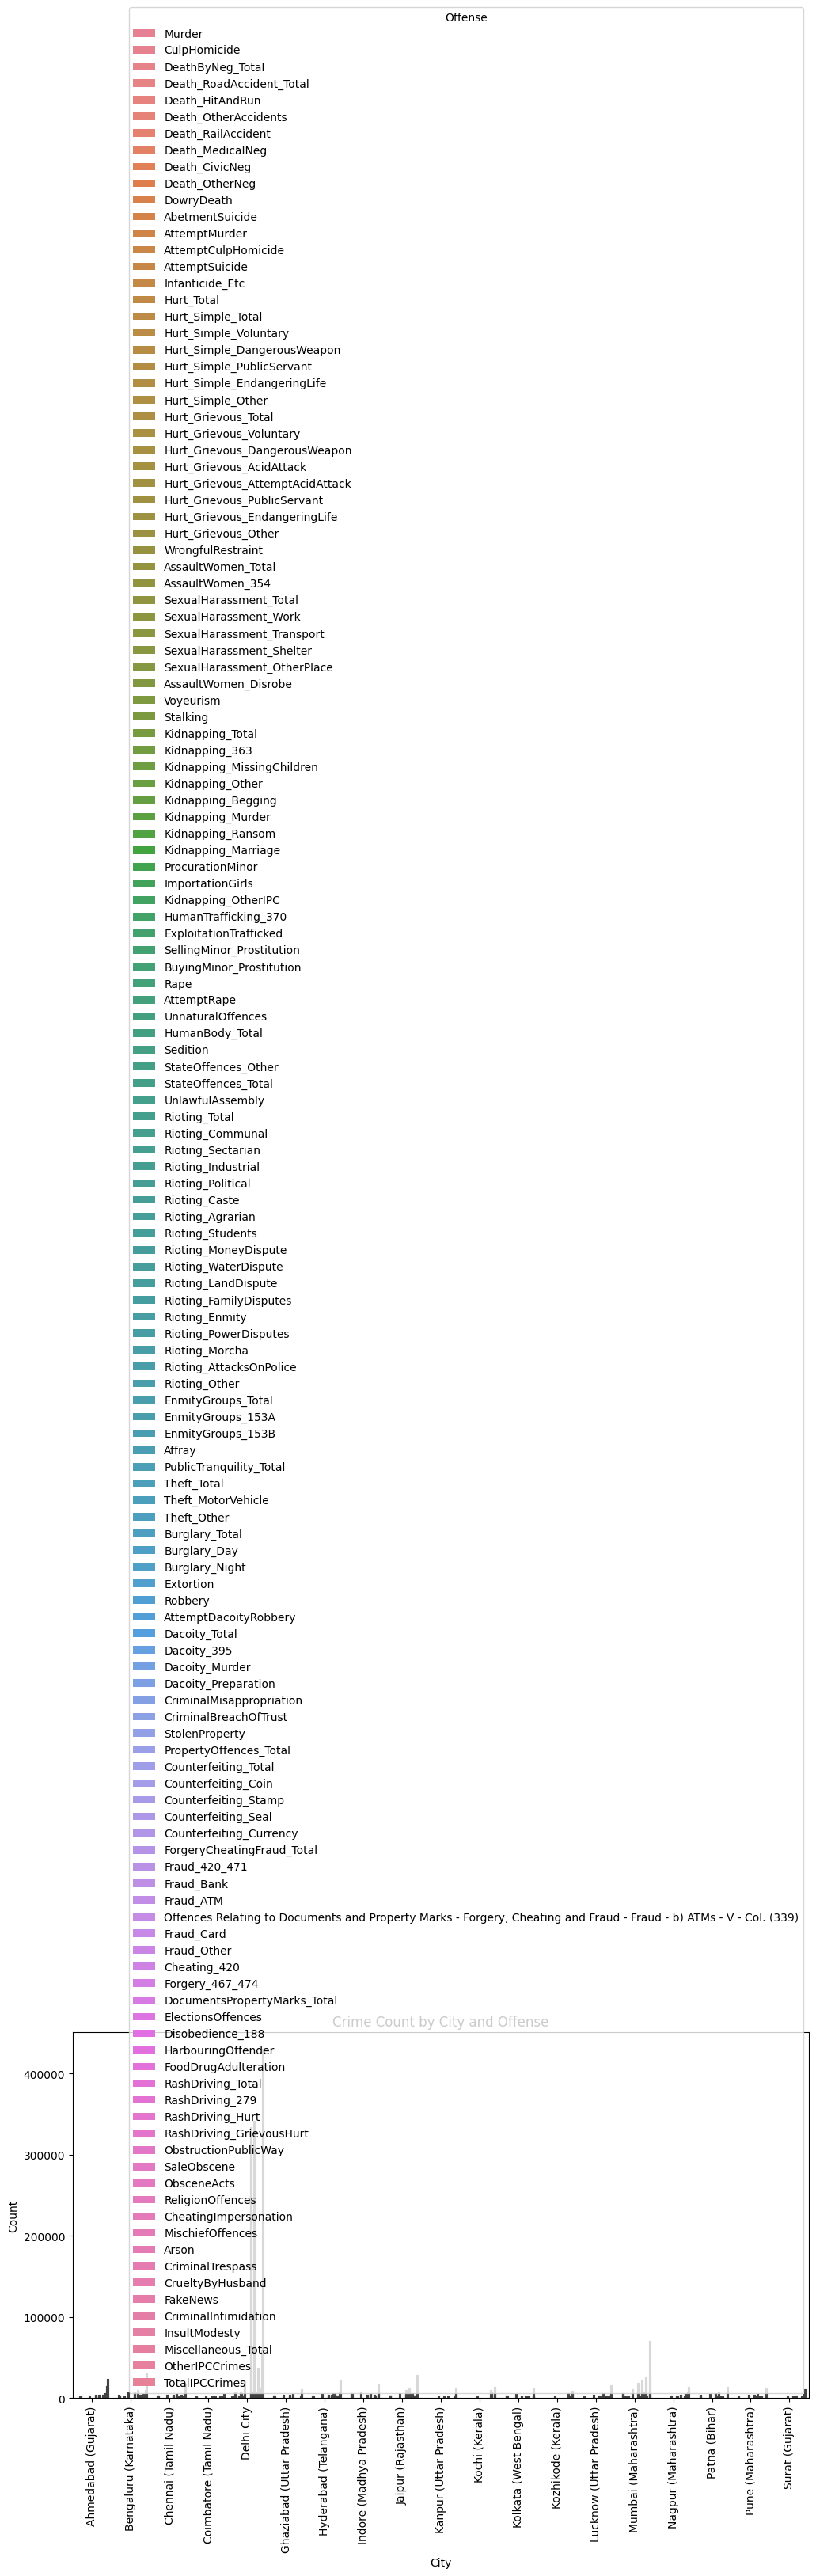

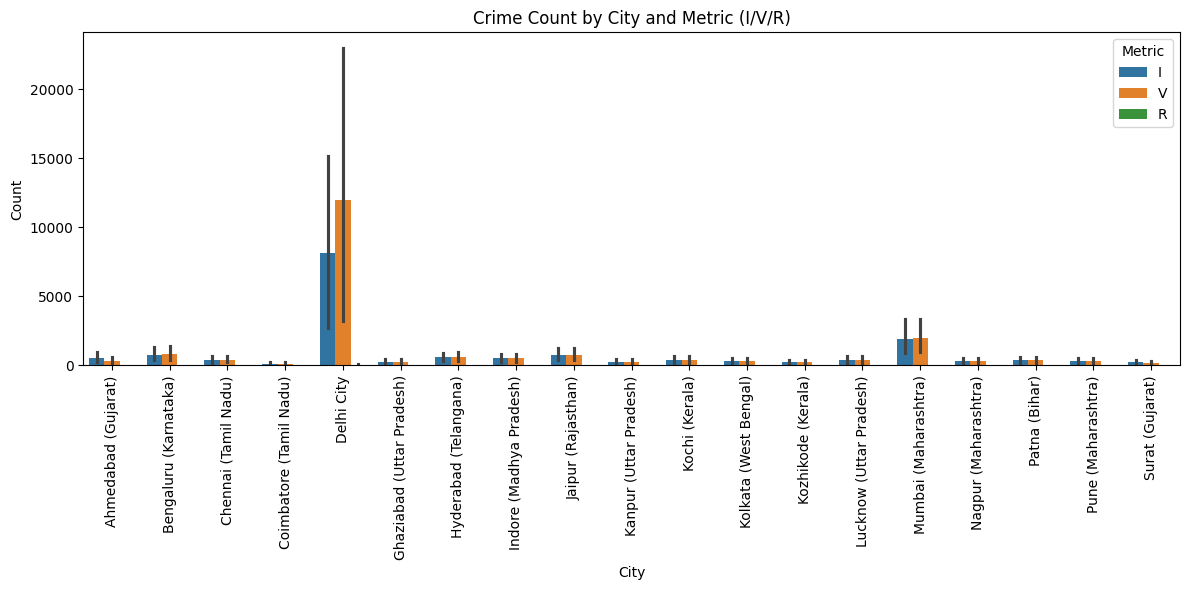

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV
df = pd.read_csv("DATA/crime_data_cleaned.csv")

# Step 2: Inspect the data
print("Columns:", df.columns)
print(df.head())

# Step 3: Melt the data to long format for easier analysis
df_long = df.melt(id_vars=["City"], var_name="Offense_Metric", value_name="Count")

# Optional: Split 'Offense_Metric' into 'Offense' and 'Metric'
df_long[['Offense', 'Metric']] = df_long['Offense_Metric'].str.rsplit('_', n=1, expand=True)
df_long = df_long.drop(columns=['Offense_Metric'])

# Step 4: Summary statistics
print("\nSummary Stats by Offense:")
print(df_long.groupby('Offense')['Count'].sum())

print("\nTop 5 Cities by Total Crimes:")
top_cities = df_long.groupby('City')['Count'].sum().sort_values(ascending=False).head(5)
print(top_cities)

# Step 5: Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=df_long, x='City', y='Count', hue='Offense')
plt.xticks(rotation=90)
plt.title("Crime Count by City and Offense")
plt.tight_layout()
plt.show()

# Optional: Metric-wise analysis (I, V, R)
plt.figure(figsize=(12,6))
sns.barplot(data=df_long, x='City', y='Count', hue='Metric')
plt.xticks(rotation=90)
plt.title("Crime Count by City and Metric (I/V/R)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1794635359.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


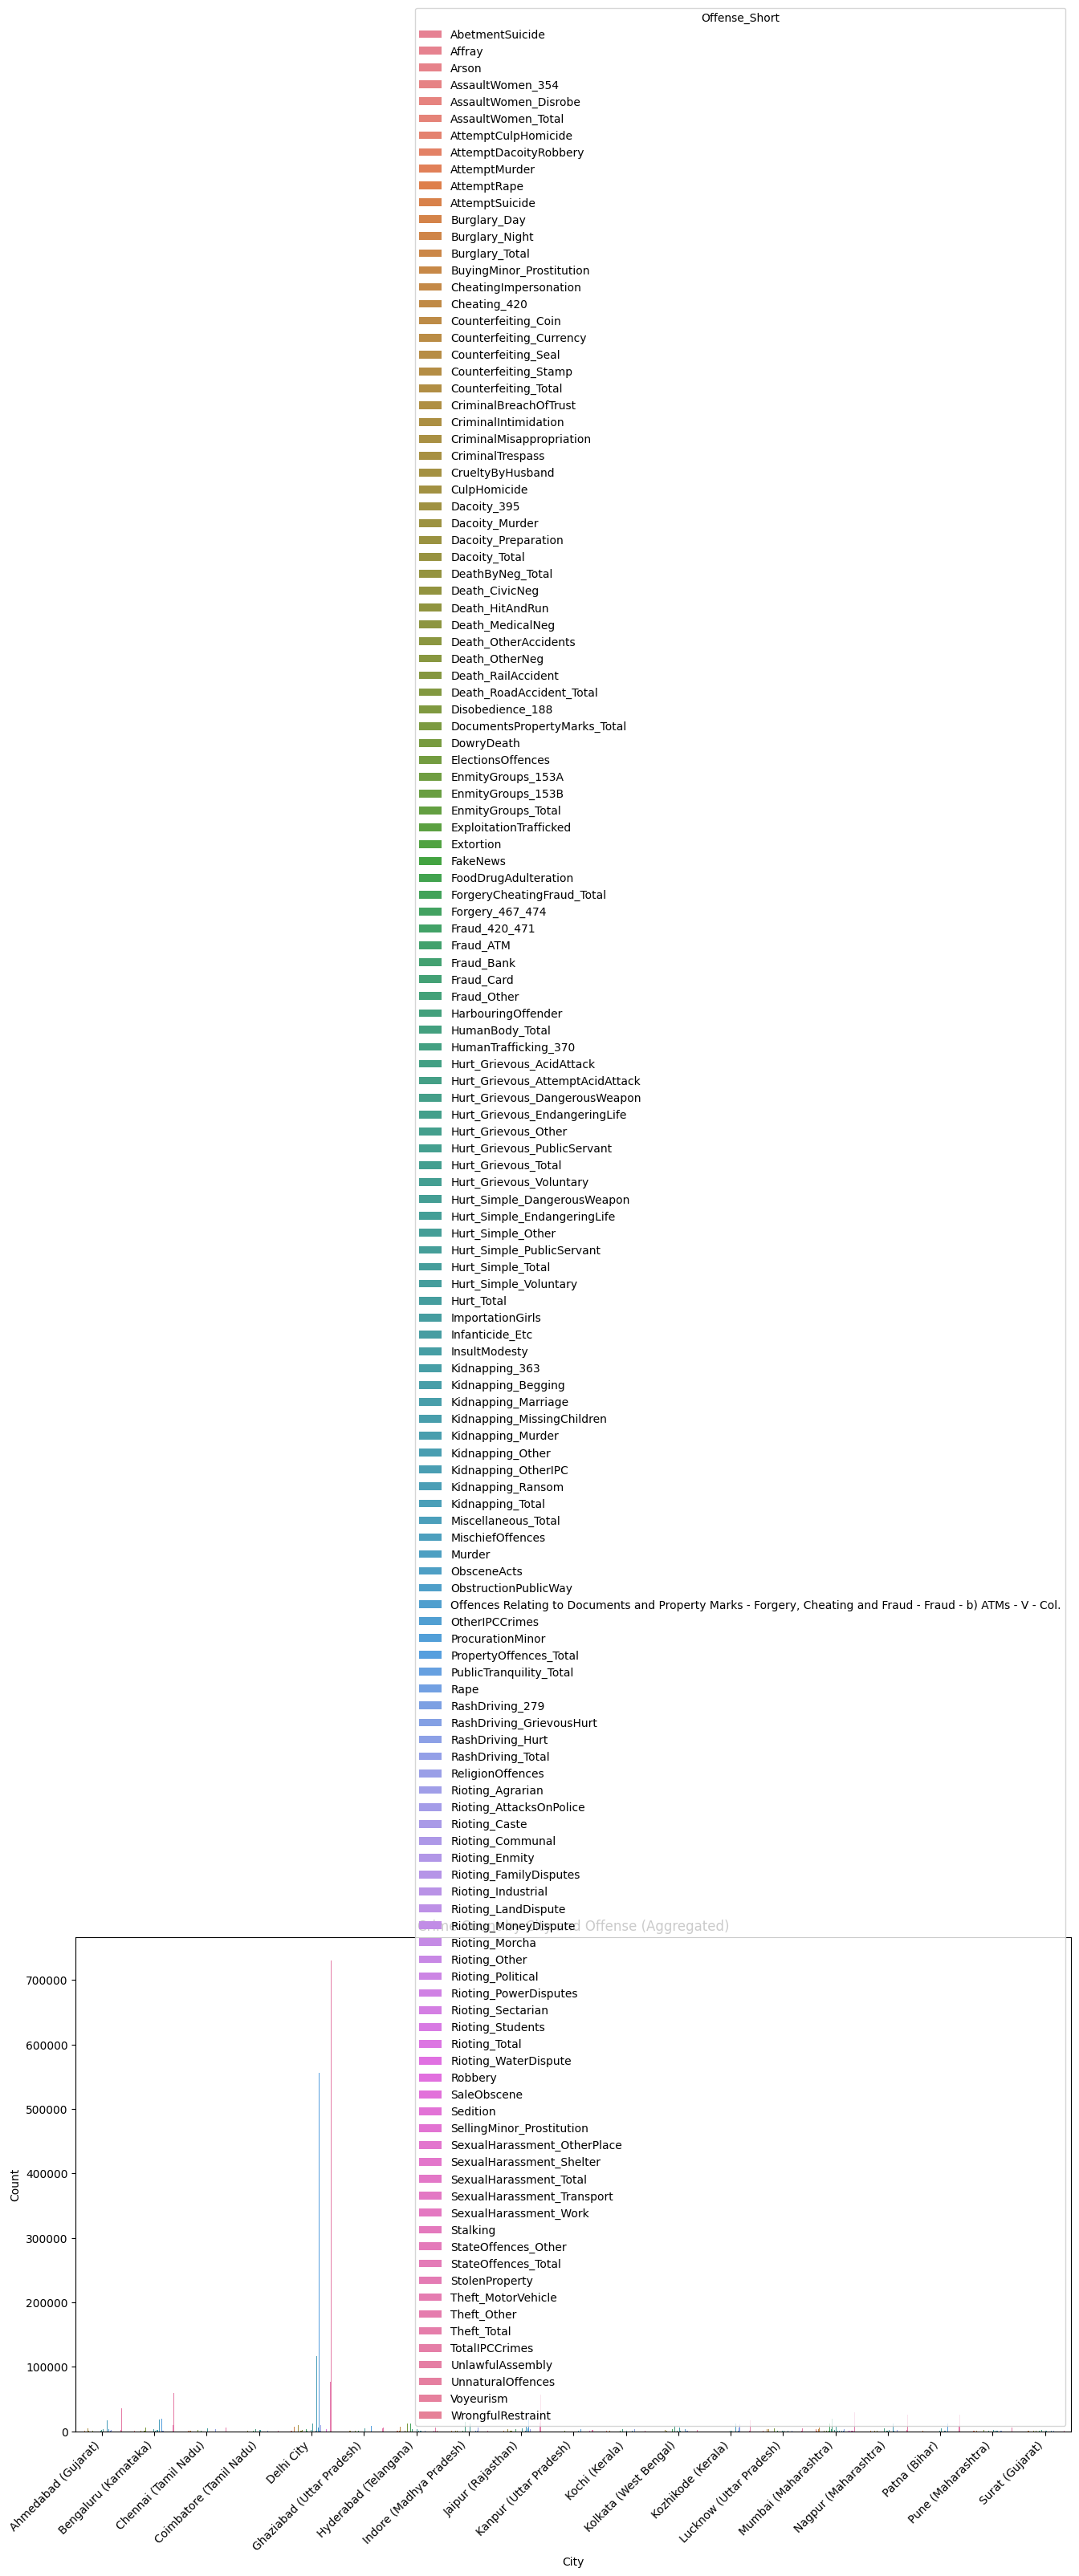

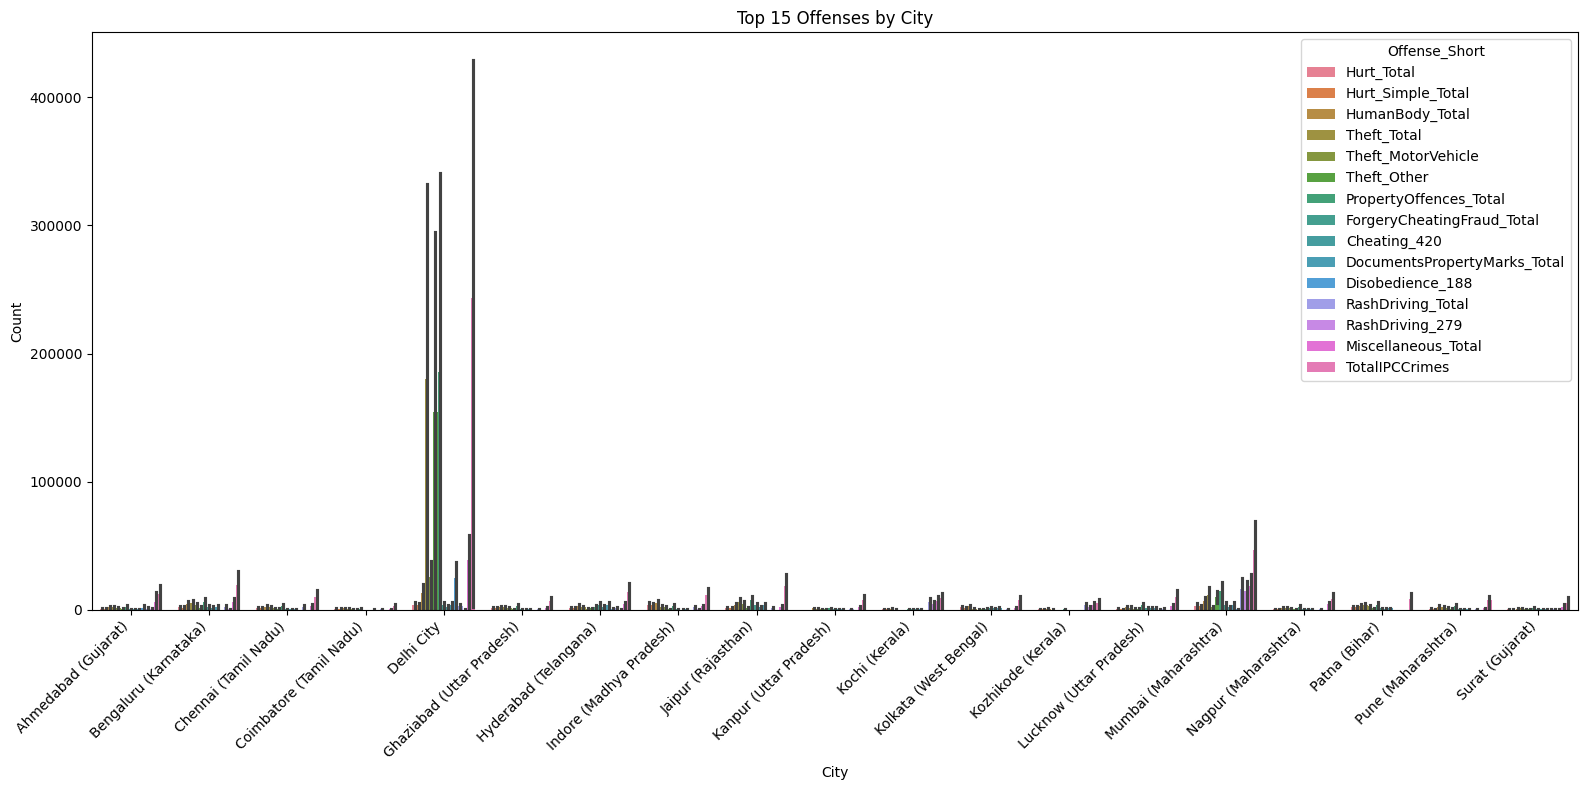

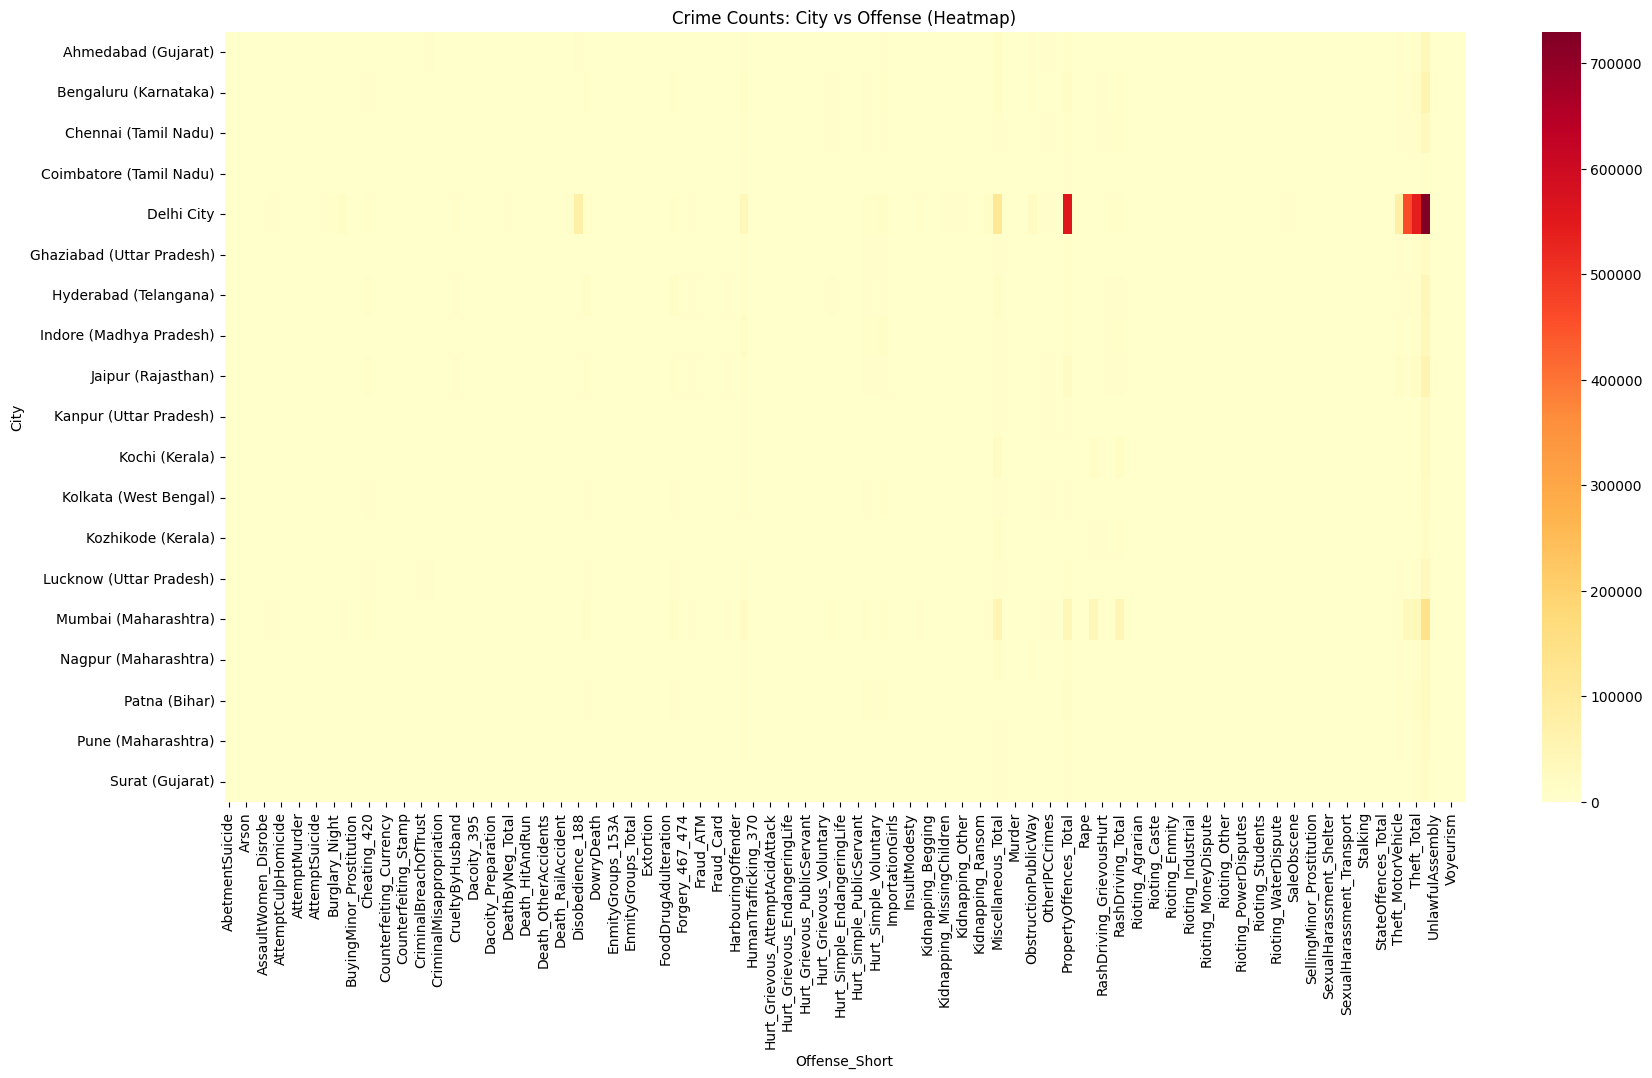

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load CSV
df = pd.read_csv("DATA/crime_data_cleaned.csv")

# Step 2: Melt to long format
df_long = df.melt(id_vars=["City"], var_name="Offense_Metric", value_name="Count")

# Convert Count to numeric safely
df_long['Count'] = pd.to_numeric(df_long['Count'], errors='coerce')

# Step 3: Split 'Offense_Metric' into 'Offense' and 'Metric'
df_long[['Offense', 'Metric']] = df_long['Offense_Metric'].str.rsplit('_', n=1, expand=True)
df_long = df_long.drop(columns=['Offense_Metric'])

# Step 4: Aggregate offenses (remove extra details in parentheses to reduce clutter)
df_long['Offense_Short'] = df_long['Offense'].str.replace(r'\s*\(.*\)','', regex=True)

# --- BARPLOT: Aggregated by Offense ---
df_agg = df_long.groupby(['City','Offense_Short'])['Count'].sum().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(data=df_agg, x='City', y='Count', hue='Offense_Short')
plt.xticks(rotation=45, ha='right')
plt.title("Crime Count by City and Offense (Aggregated)")
plt.tight_layout()
plt.show()

# --- BARPLOT: Top 15 Offenses Only ---
top_offenses = df_long.groupby('Offense_Short')['Count'].sum().sort_values(ascending=False).head(15).index
df_top = df_long[df_long['Offense_Short'].isin(top_offenses)]

plt.figure(figsize=(16,8))
sns.barplot(data=df_top, x='City', y='Count', hue='Offense_Short')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Offenses by City")
plt.tight_layout()
plt.show()

# --- HEATMAP: Full Offense vs City ---
df_pivot = df_long.pivot_table(index='City', columns='Offense_Short', values='Count', aggfunc='sum')

plt.figure(figsize=(20,10))
sns.heatmap(df_pivot, cmap="YlOrRd")
plt.title("Crime Counts: City vs Offense (Heatmap)")
plt.show()


/tmp/ipython-input-576900375.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipython-input-576900375.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


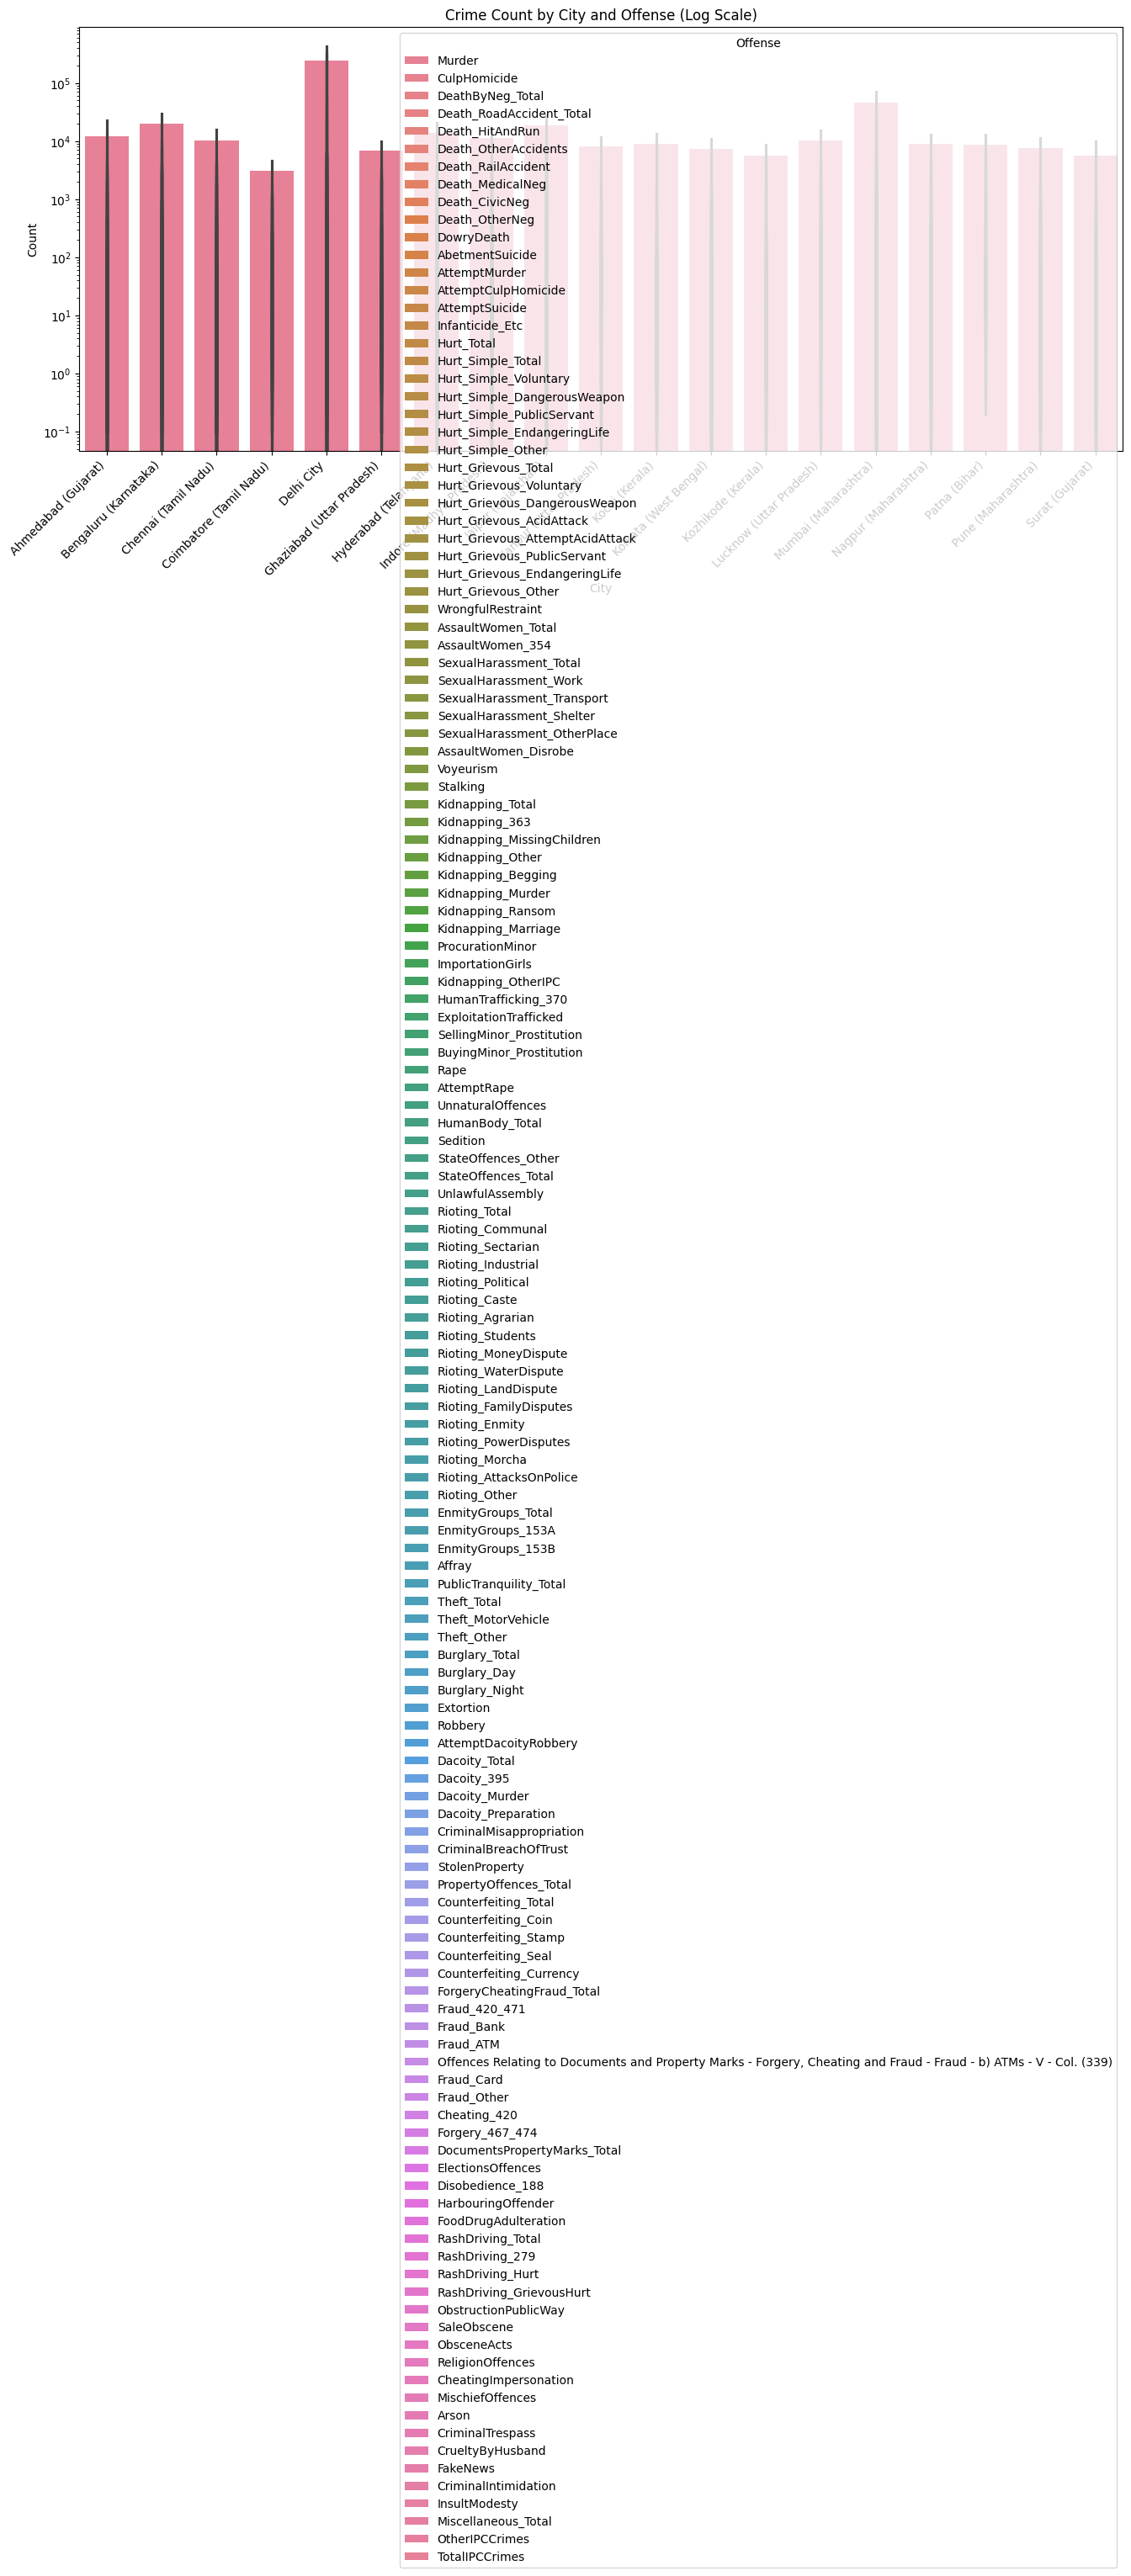

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot log-scale barplot
plt.figure(figsize=(16,8))
sns.barplot(data=df_long, x='City', y='Count', hue='Offense', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Logarithmic scale
plt.title("Crime Count by City and Offense (Log Scale)")
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()


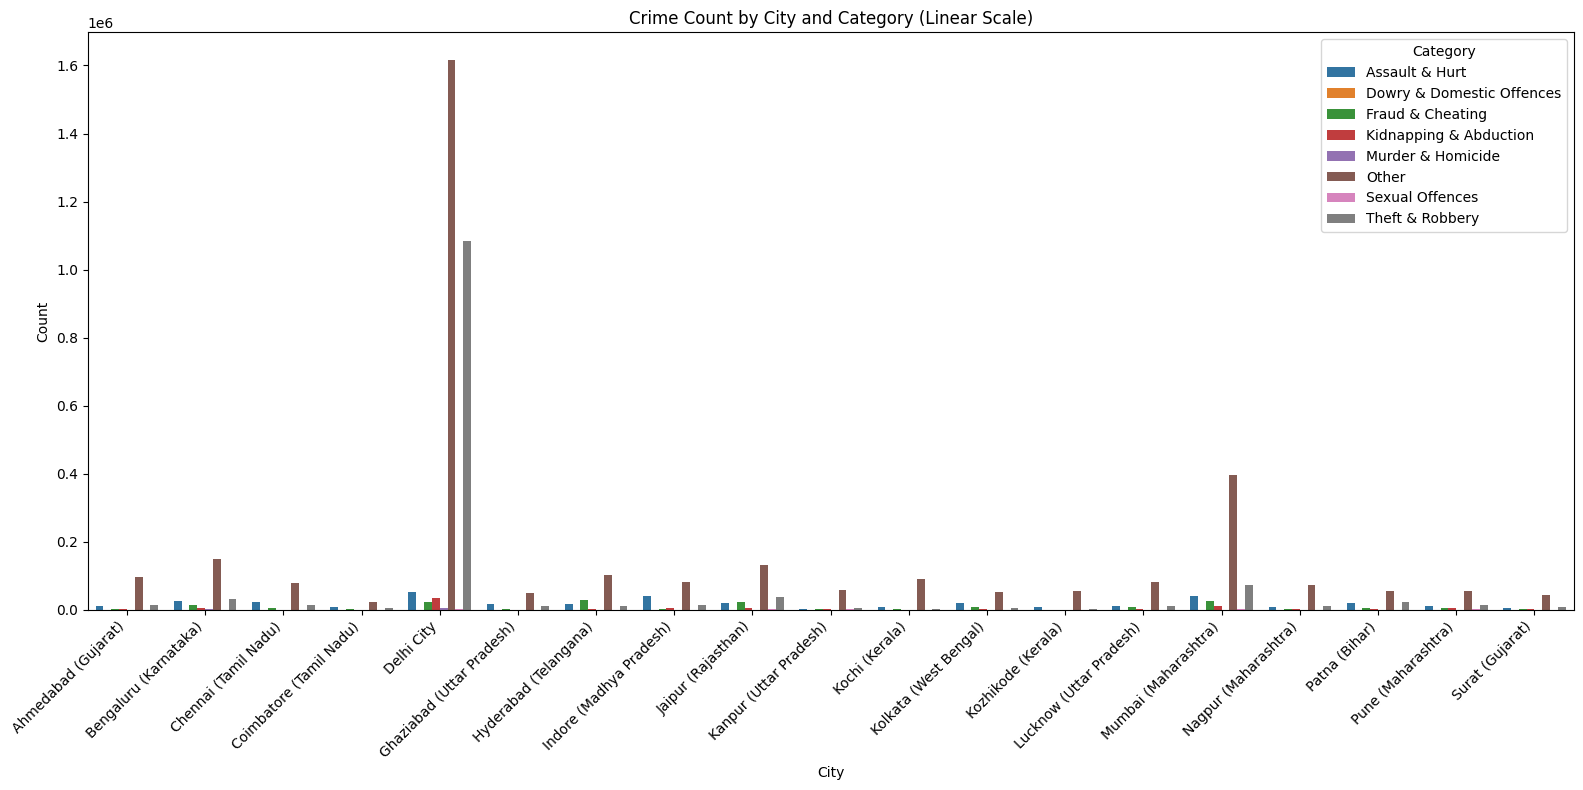

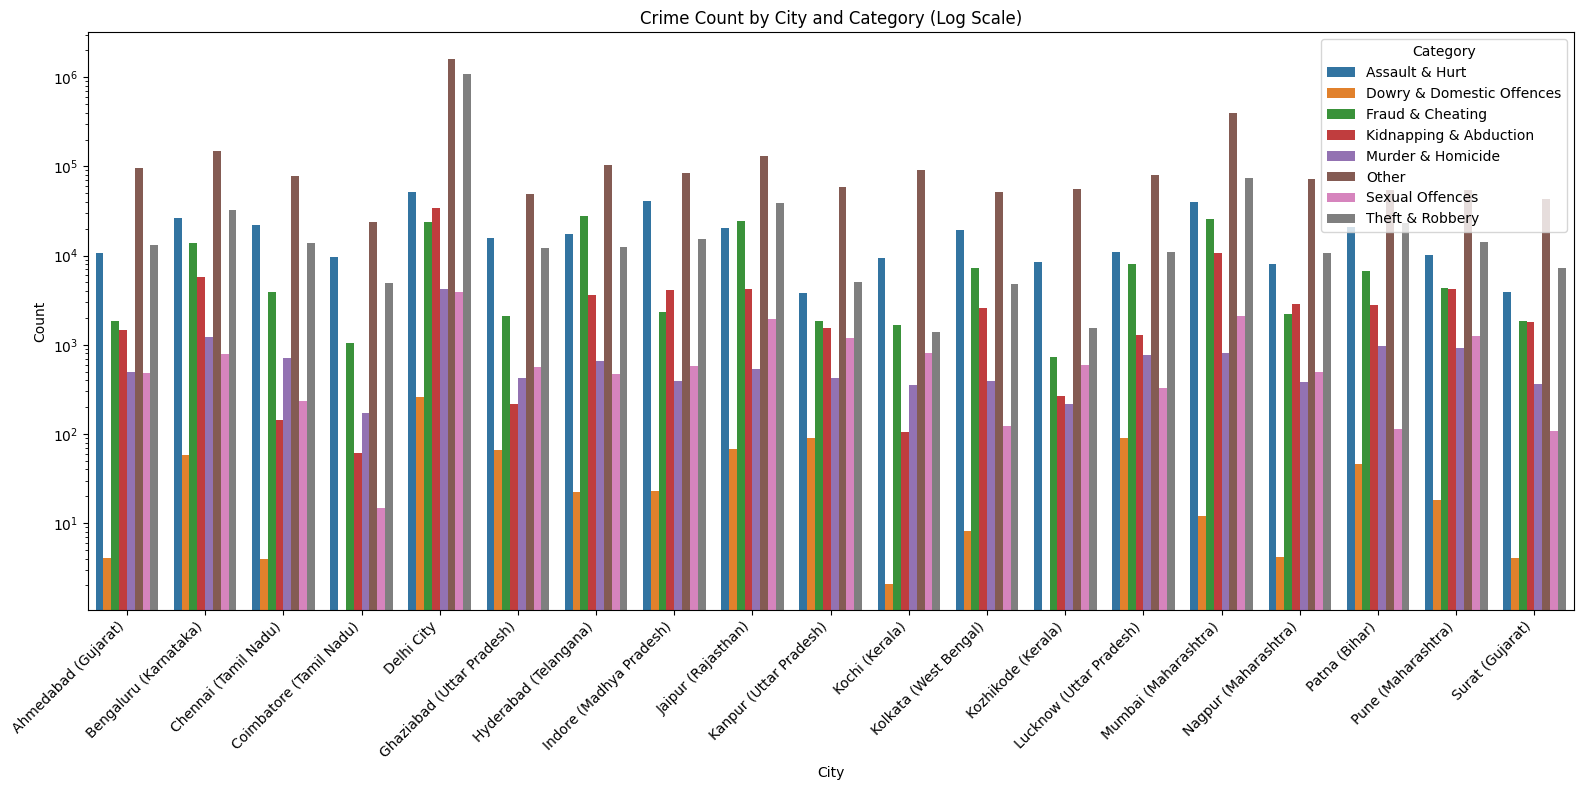

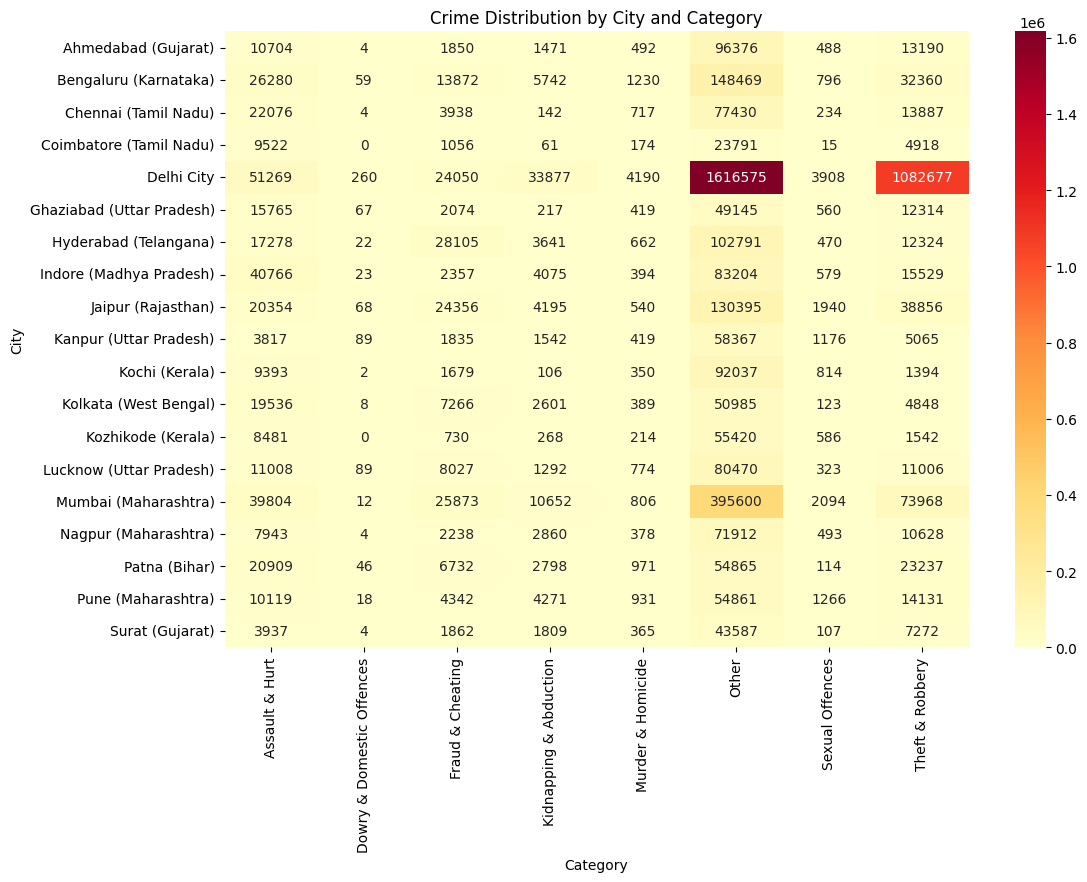

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Step 1: Load the cleaned CSV
df = pd.read_csv("DATA/crime_data_cleaned.csv")

# Step 2: Melt the dataframe to long format
df_long = df.melt(id_vars=["City"], var_name="Offense_Metric", value_name="Count")

# Ensure Count is numeric
df_long['Count'] = pd.to_numeric(df_long['Count'], errors='coerce').fillna(0)

# Step 3: Split 'Offense_Metric' into 'Offense' and 'Metric'
df_long[['Offense', 'Metric']] = df_long['Offense_Metric'].str.rsplit('_', n=1, expand=True)
df_long = df_long.drop(columns=['Offense_Metric'])

# Step 4: Automatically detect categories from offense names
def categorize_offense(offense):
    offense = offense.lower()
    if any(k in offense for k in ['murder', 'homicide']):
        return 'Murder & Homicide'
    elif any(k in offense for k in ['kidnap', 'abduct']):
        return 'Kidnapping & Abduction'
    elif any(k in offense for k in ['theft', 'robbery', 'dacoity']):
        return 'Theft & Robbery'
    elif any(k in offense for k in ['assault', 'hurt']):
        return 'Assault & Hurt'
    elif any(k in offense for k in ['rape', 'sexual']):
        return 'Sexual Offences'
    elif any(k in offense for k in ['cheating', 'fraud']):
        return 'Fraud & Cheating'
    elif any(k in offense for k in ['dowry']):
        return 'Dowry & Domestic Offences'
    else:
        return 'Other'

df_long['Category'] = df_long['Offense'].apply(categorize_offense)

# Step 5: Aggregate counts per City and Category
df_cat = df_long.groupby(['City', 'Category'])['Count'].sum().reset_index()

# -------------------------------
# Step 6: Barplot - Linear Scale
plt.figure(figsize=(16,8))
sns.barplot(data=df_cat, x='City', y='Count', hue='Category')
plt.xticks(rotation=45, ha='right')
plt.title("Crime Count by City and Category (Linear Scale)")
plt.tight_layout()
plt.show()

# Step 7: Barplot - Log Scale
plt.figure(figsize=(16,8))
sns.barplot(data=df_cat, x='City', y='Count', hue='Category')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title("Crime Count by City and Category (Log Scale)")
plt.tight_layout()
plt.show()

# Step 8: Heatmap of Crime Counts
df_cat_pivot = df_cat.pivot(index='City', columns='Category', values='Count')
plt.figure(figsize=(12,8))
sns.heatmap(df_cat_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Crime Distribution by City and Category")
plt.show()


                  City               Offense  Severity Reporting
0  Ahmedabad (Gujarat)       AbetmentSuicide  1.016393  0.016393
1  Ahmedabad (Gujarat)                Affray       1.0    0.0125
2  Ahmedabad (Gujarat)                 Arson       1.0  0.014286
3  Ahmedabad (Gujarat)      AssaultWomen_354       1.0  0.034043
4  Ahmedabad (Gujarat)  AssaultWomen_Disrobe       1.0  0.033333

Severity Outliers:
                     City                   Offense  Severity
8     Ahmedabad (Gujarat)             AttemptMurder   1.03252
27    Ahmedabad (Gujarat)              CulpHomicide  2.428571
32    Ahmedabad (Gujarat)          DeathByNeg_Total  1.053419
36    Ahmedabad (Gujarat)      Death_OtherAccidents  1.058111
37    Ahmedabad (Gujarat)            Death_OtherNeg      1.25
...                   ...                       ...       ...
2636      Surat (Gujarat)           RashDriving_279  0.241509
2637      Surat (Gujarat)  RashDriving_GrievousHurt  1.150442
2638      Surat (Gujarat)       

/tmp/ipython-input-1781210696.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


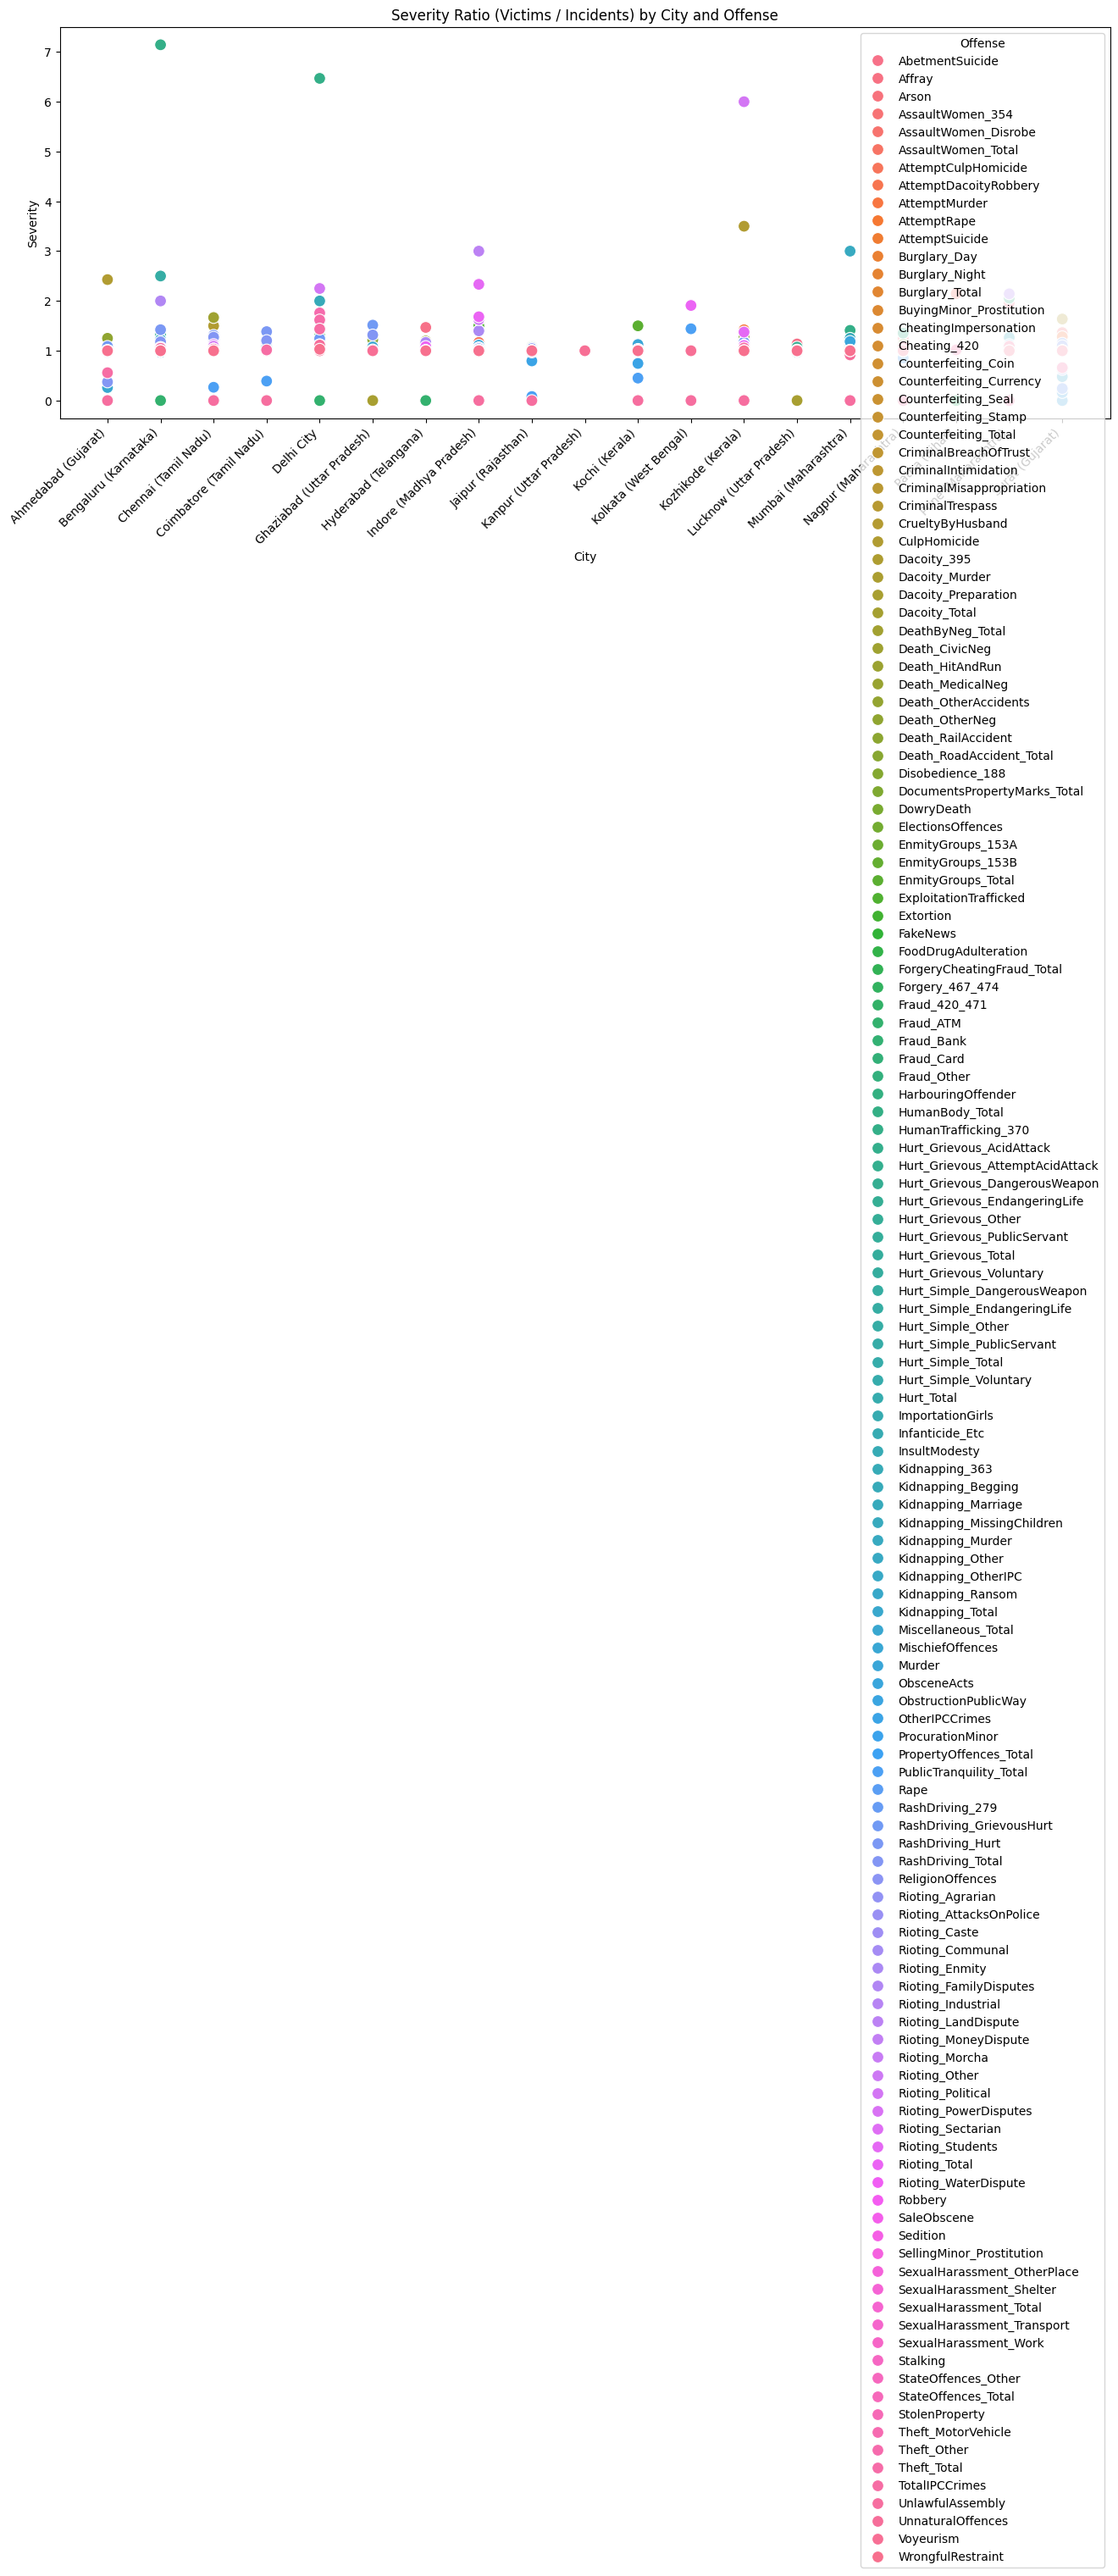

/tmp/ipython-input-1781210696.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


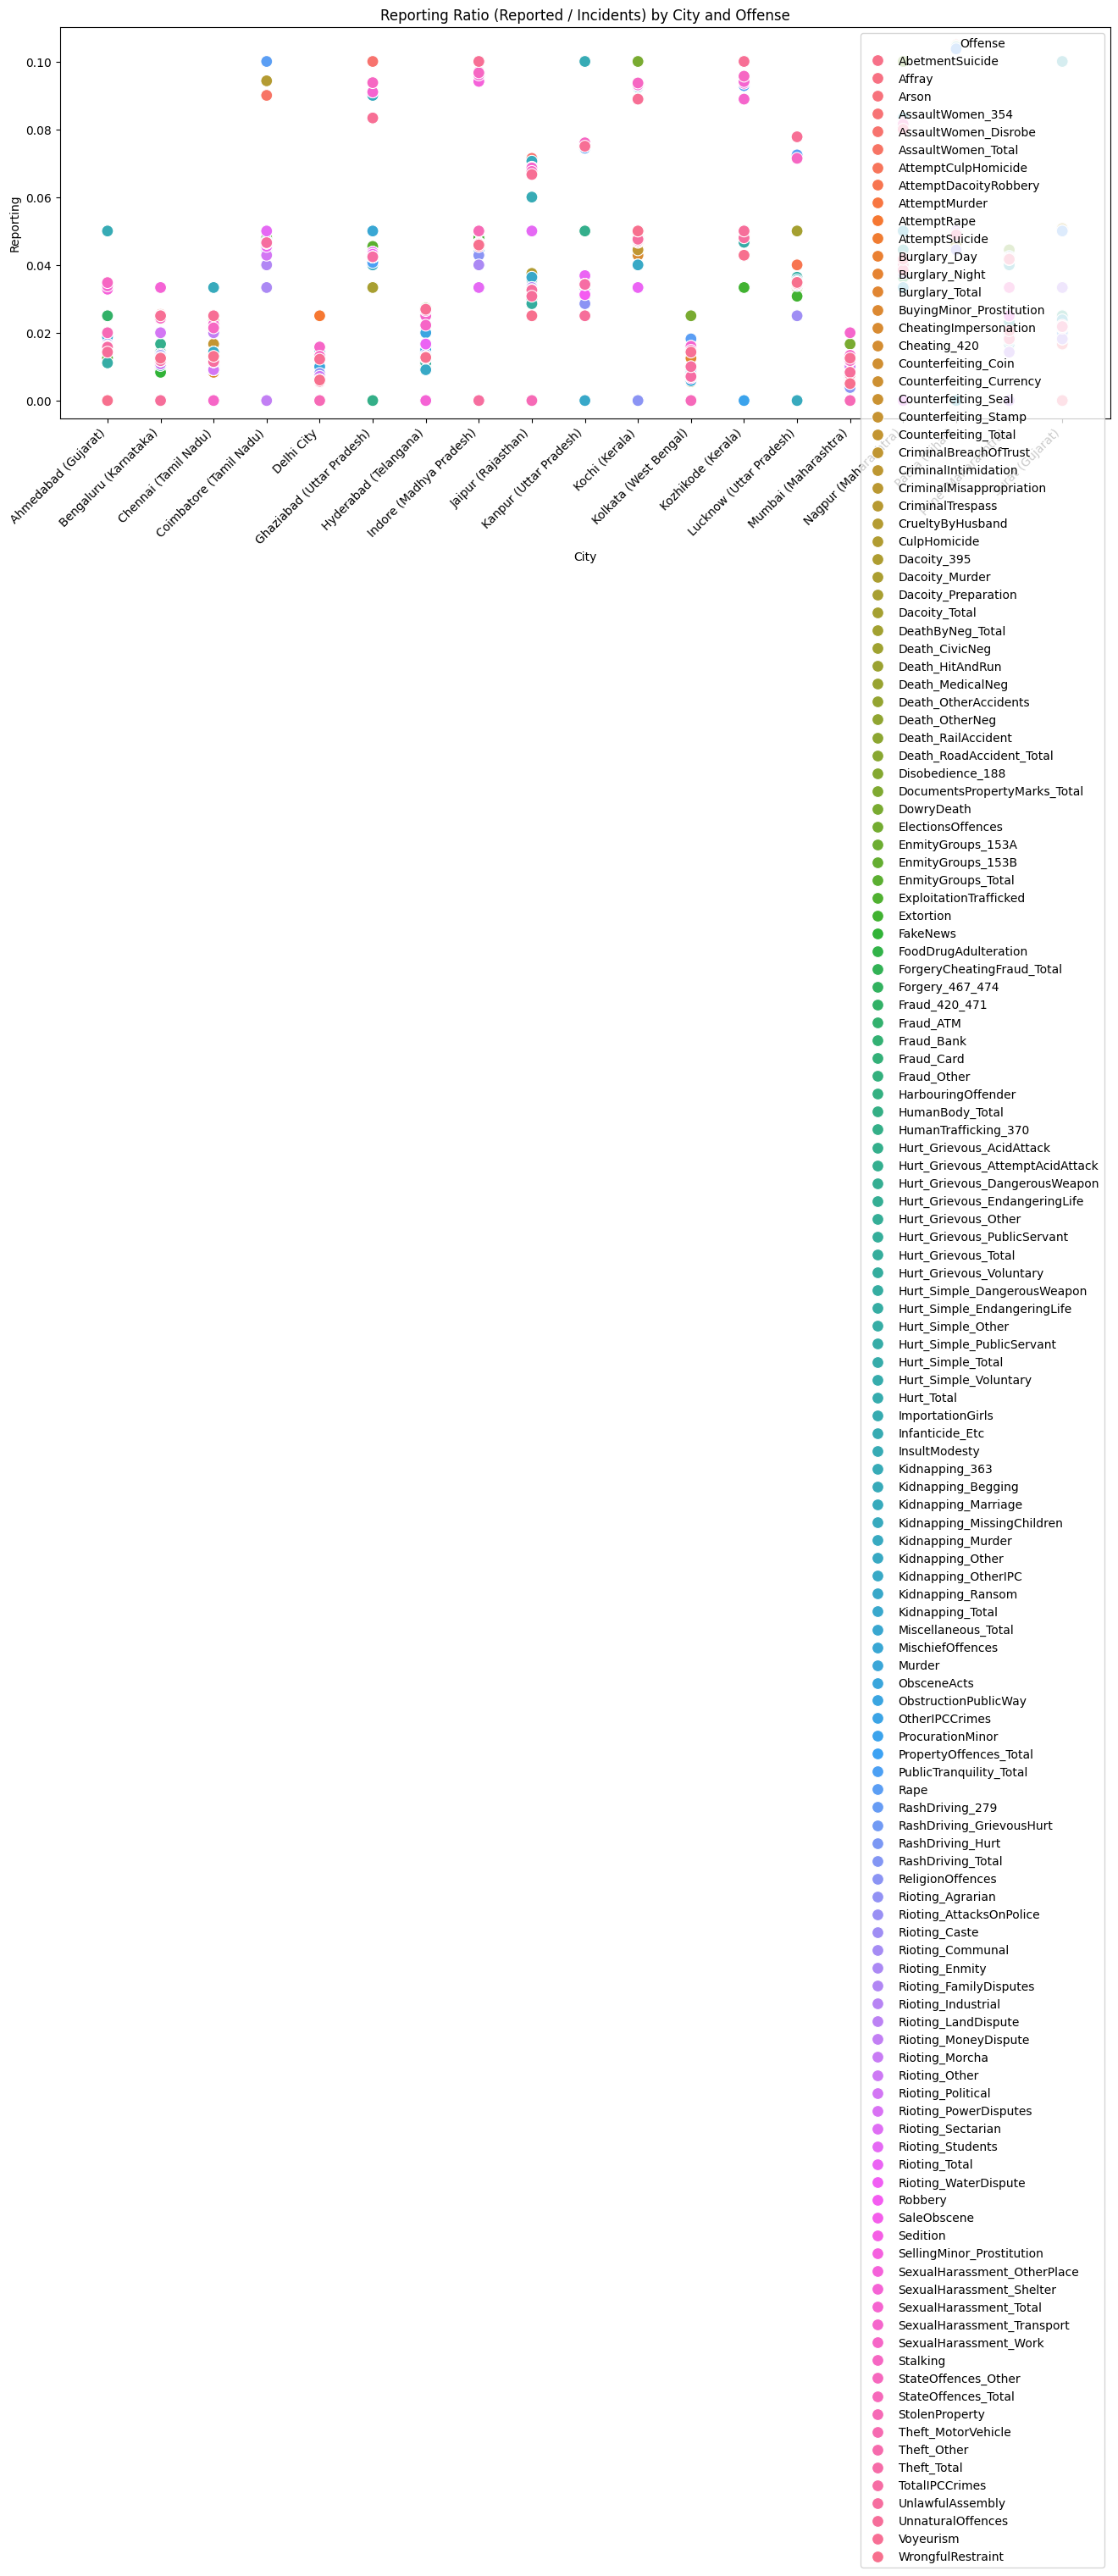

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure numeric values
df_long['Count'] = pd.to_numeric(df_long['Count'], errors='coerce').fillna(0)

# Step 2: Pivot data to get separate columns for I (Incidents), V (Victims), R (Reported)
df_pivot = df_long.pivot_table(index=['City','Offense'], columns='Metric', values='Count', aggfunc='sum').reset_index()
df_pivot.columns.name = None  # Remove pivot table names

# Fill missing values with 0
df_pivot[['I','V','R']] = df_pivot[['I','V','R']].fillna(0)

# Step 3: Compute Ratios
df_pivot['Severity'] = df_pivot['V'] / df_pivot['I'].replace(0, pd.NA)  # Victims per Incident
df_pivot['Reporting'] = df_pivot['R'] / df_pivot['I'].replace(0, pd.NA)  # Reported per Incident

# Step 4: Inspect
print(df_pivot[['City','Offense','Severity','Reporting']].head())

# Step 5: Identify Outliers using simple threshold or IQR
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]

severity_outliers = detect_outliers(df_pivot['Severity'])
reporting_outliers = detect_outliers(df_pivot['Reporting'])

print("\nSeverity Outliers:")
print(df_pivot[df_pivot['Severity'].isin(severity_outliers)][['City','Offense','Severity']])

print("\nReporting Outliers:")
print(df_pivot[df_pivot['Reporting'].isin(reporting_outliers)][['City','Offense','Reporting']])

# Step 6: Optional - Visualize Ratios
plt.figure(figsize=(16,6))
sns.scatterplot(data=df_pivot, x='City', y='Severity', hue='Offense', s=100)
plt.xticks(rotation=45, ha='right')
plt.title("Severity Ratio (Victims / Incidents) by City and Offense")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))
sns.scatterplot(data=df_pivot, x='City', y='Reporting', hue='Offense', s=100)
plt.xticks(rotation=45, ha='right')
plt.title("Reporting Ratio (Reported / Incidents) by City and Offense")
plt.tight_layout()
plt.show()


In [ ]:
print(df_pivot.columns)

Index(['City', 'Offense', 'I', 'R', 'V', 'Severity', 'Reporting'], dtype='object')


In [ ]:
df_pivot['Severity'] = pd.to_numeric(df_pivot['Severity'], errors='coerce')
df_pivot['Reporting'] = pd.to_numeric(df_pivot['Reporting'], errors='coerce')


In [ ]:
import pandas as pd

# Set the option to display all rows
pd.set_option('display.max_rows', None)

print(df_pivot['Offense'])

0                       AbetmentSuicide
1                                Affray
2                                 Arson
3                      AssaultWomen_354
4                  AssaultWomen_Disrobe
5                    AssaultWomen_Total
6                   AttemptCulpHomicide
7                 AttemptDacoityRobbery
8                         AttemptMurder
9                           AttemptRape
10                       AttemptSuicide
11                         Burglary_Day
12                       Burglary_Night
13                       Burglary_Total
14             BuyingMinor_Prostitution
15                CheatingImpersonation
16                         Cheating_420
17                  Counterfeiting_Coin
18              Counterfeiting_Currency
19                  Counterfeiting_Seal
20                 Counterfeiting_Stamp
21                 Counterfeiting_Total
22                CriminalBreachOfTrust
23                 CriminalIntimidation
24             CriminalMisappropriation


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Create a mapping from offenses to broader categories

crime_map = {

    # Crimes Against the Person
    'AbetmentSuicide': 'Crimes_Person',
    'AbetmentSuicide': 'Crimes_Person',
    'AbetmentSuicide': 'Crimes_Person',
    'AssaultWomen_354': 'Crimes_Person',
    'AssaultWomen_Disrobe': 'Crimes_Person',
    'AssaultWomen_Total': 'Crimes_Person',
    'AttemptCulpHomicide': 'Crimes_Person',
    'AttemptMurder': 'Crimes_Person',
    'AttemptRape': 'Crimes_Person',
    'AttemptSuicide': 'Crimes_Person',
    'BuyingMinor_Prostitution': 'Crimes_Person',
    'CrueltyByHusband': 'Crimes_Person',
    'CulpHomicide': 'Crimes_Person',
    'DowryDeath': 'Crimes_Person',
    'ExploitationTrafficked': 'Crimes_Person',
    'HumanBody_Total': 'Crimes_Person',
    'HumanTrafficking_370': 'Crimes_Person',
    'Hurt_Grievous_AcidAttack': 'Crimes_Person',
    'Hurt_Grievous_AttemptAcidAttack': 'Crimes_Person',
    'Hurt_Grievous_DangerousWeapon': 'Crimes_Person',
    'Hurt_Grievous_EndangeringLife': 'Crimes_Person',
    'Hurt_Grievous_Other': 'Crimes_Person',
    'Hurt_Grievous_PublicServant': 'Crimes_Person',
    'Hurt_Grievous_Total': 'Crimes_Person',
    'Hurt_Grievous_Voluntary': 'Crimes_Person',
    'Hurt_Simple_DangerousWeapon': 'Crimes_Person',
    'Hurt_Simple_EndangeringLife': 'Crimes_Person',
    'Hurt_Simple_Other': 'Crimes_Person',
    'Hurt_Simple_PublicServant': 'Crimes_Person',
    'Hurt_Simple_Total': 'Crimes_Person',
    'Hurt_Simple_Voluntary': 'Crimes_Person',
    'Hurt_Total': 'Crimes_Person',
    'ImportationGirls': 'Crimes_Person',
    'Infanticide_Etc': 'Crimes_Person',
    'InsultModesty': 'Crimes_Person',
    'Kidnapping_363': 'Crimes_Person',
    'Kidnapping_Begging': 'Crimes_Person',
    'Kidnapping_Marriage': 'Crimes_Person',
    'Kidnapping_MissingChildren': 'Crimes_Person',
    'Kidnapping_Murder': 'Crimes_Person',
    'Kidnapping_Other': 'Crimes_Person',
    'Kidnapping_OtherIPC': 'Crimes_Person',
    'Kidnapping_Ransom': 'Crimes_Person',
    'Kidnapping_Total': 'Crimes_Person',
    'Murder': 'Crimes_Person',
    'ProcurationMinor': 'Crimes_Person',
    'Rape': 'Crimes_Person',
    'SellingMinor_Prostitution': 'Crimes_Person',
    'SexualHarassment_OtherPlace': 'Crimes_Person',
    'SexualHarassment_Shelter': 'Crimes_Person',
    'SexualHarassment_Total': 'Crimes_Person',
    'SexualHarassment_Transport': 'Crimes_Person',
    'SexualHarassment_Work': 'Crimes_Person',
    'Stalking': 'Crimes_Person',
    'UnnaturalOffences': 'Crimes_Person',
    'Voyeurism': 'Crimes_Person',
    'WrongfulRestraint': 'Crimes_Person',

    # Crimes Against Property
    'Arson': 'Crimes_Property',
    'AttemptDacoityRobbery': 'Crimes_Property',
    'Burglary_Day': 'Crimes_Property',
    'Burglary_Night': 'Crimes_Property',
    'Burglary_Total': 'Crimes_Property',
    'CriminalBreachOfTrust': 'Crimes_Property',
    'CriminalMisappropriation': 'Crimes_Property',
    'CriminalTrespass': 'Crimes_Property',
    'Dacoity_395': 'Crimes_Property',
    'Dacoity_Murder': 'Crimes_Property',
    'Dacoity_Preparation': 'Crimes_Property',
    'Dacoity_Total': 'Crimes_Property',
    'Extortion': 'Crimes_Property',
    'PropertyOffences_Total': 'Crimes_Property',
    'Robbery': 'Crimes_Property',
    'StolenProperty': 'Crimes_Property',
    'Theft_MotorVehicle': 'Crimes_Property',
    'Theft_Other': 'Crimes_Property',
    'Theft_Total': 'Crimes_Property',

    # Financial Crimes & Fraud
    'CheatingImpersonation': 'Crimes_Financial',
    'Cheating_420': 'Crimes_Financial',
    'Counterfeiting_Coin': 'Crimes_Financial',
    'Counterfeiting_Currency': 'Crimes_Financial',
    'Counterfeiting_Seal': 'Crimes_Financial',
    'Counterfeiting_Stamp': 'Crimes_Financial',
    'Counterfeiting_Total': 'Crimes_Financial',
    'ForgeryCheatingFraud_Total': 'Crimes_Financial',
    'Forgery_467_474': 'Crimes_Financial',
    'Fraud_420_471': 'Crimes_Financial',
    'Fraud_ATM': 'Crimes_Financial',
    'Fraud_Bank': 'Crimes_Financial',
    'Fraud_Card': 'Crimes_Financial',
    'Fraud_Other': 'Crimes_Financial',

    # Crimes Affecting Public Order & State
    'Affray': 'Crimes_Public_Order',
    'EnmityGroups_153A': 'Crimes_Public_Order',
    'EnmityGroups_153B': 'Crimes_Public_Order',
    'EnmityGroups_Total': 'Crimes_Public_Order',
    'ObsceneActs': 'Crimes_Public_Order',
    'PublicTranquility_Total': 'Crimes_Public_Order',
    'Rioting_Agrarian': 'Crimes_Public_Order',
    'Rioting_AttacksOnPolice': 'Crimes_Public_Order',
    'Rioting_Caste': 'Crimes_Public_Order',
    'Rioting_Communal': 'Crimes_Public_Order',
    'Rioting_Enmity': 'Crimes_Public_Order',
    'Rioting_FamilyDisputes': 'Crimes_Public_Order',
    'Rioting_Industrial': 'Crimes_Public_Order',
    'Rioting_LandDispute': 'Crimes_Public_Order',
    'Rioting_MoneyDispute': 'Crimes_Public_Order',
    'Rioting_Morcha': 'Crimes_Public_Order',
    'Rioting_Other': 'Crimes_Public_Order',
    'Rioting_Political': 'Crimes_Public_Order',
    'Rioting_PowerDisputes': 'Crimes_Public_Order',
    'Rioting_Sectarian': 'Crimes_Public_Order',
    'Rioting_Students': 'Crimes_Public_Order',
    'Rioting_Total': 'Crimes_Public_Order',
    'Rioting_WaterDispute': 'Crimes_Public_Order',
    'SaleObscene': 'Crimes_Public_Order',
    'Sedition': 'Crimes_State',
    'StateOffences_Other': 'Crimes_State',
    'StateOffences_Total': 'Crimes_State',
    'UnlawfulAssembly': 'Crimes_Public_Order',

    # Negligence & Accidents
    'DeathByNeg_Total': 'Crimes_Negligence_Accidents',
    'Death_CivicNeg': 'Crimes_Negligence_Accidents',
    'Death_HitAndRun': 'Crimes_Negligence_Accidents',
    'Death_MedicalNeg': 'Crimes_Negligence_Accidents',
    'Death_OtherAccidents': 'Crimes_Negligence_Accidents',
    'Death_OtherNeg': 'Crimes_Negligence_Accidents',
    'Death_RailAccident': 'Crimes_Negligence_Accidents',
    'Death_RoadAccident_Total': 'Crimes_Negligence_Accidents',
    'RashDriving_279': 'Crimes_Negligence_Accidents',
    'RashDriving_GrievousHurt': 'Crimes_Negligence_Accidents',
    'RashDriving_Hurt': 'Crimes_Negligence_Accidents',
    'RashDriving_Total': 'Crimes_Negligence_Accidents',
    'HarbouringOffender': 'Crimes_Miscellaneous',
    'OtherIPCCrimes': 'Crimes_Miscellaneous',
    'TotalIPCCrimes': 'Crimes_Miscellaneous',
    'Miscellaneous_Total': 'Crimes_Miscellaneous',
    'ObstructionPublicWay': 'Crimes_Miscellaneous',
    'ElectionsOffences': 'Crimes_Miscellaneous',
    'Disobedience_188': 'Crimes_Miscellaneous',
    'FoodDrugAdulteration': 'Crimes_Miscellaneous',
    'FakeNews': 'Crimes_Miscellaneous',
    'MischiefOffences': 'Crimes_Miscellaneous',
    'CriminalIntimidation': 'Crimes_Miscellaneous',
    'ReligionOffences': 'Crimes_Miscellaneous',
    'DocumentsPropertyMarks_Total': 'Crimes_Miscellaneous'
}


df_pivot['Crime_Category'] = df_pivot['Offense'].map(crime_map).fillna('Other')

# Step 2: Aggregate by City and Crime_Category
city_crime_cat = df_pivot.groupby(['City', 'Crime_Category']).agg(
    Total_Incidents=('I','sum'),
    Total_Victims=('V','sum'),
    Total_Reported=('R','sum')
).reset_index()

# Step 3: Pivot to make Crime_Category columns (wide format)
city_features = city_crime_cat.pivot(index='City', columns='Crime_Category',
                                     values=['Total_Incidents','Total_Victims','Total_Reported'])

# Flatten MultiIndex columns
city_features.columns = [f"{metric}_{category}" for metric, category in city_features.columns]
city_features = city_features.reset_index()

# Step 4: Compute severity and reporting ratios per category
for cat in city_crime_cat['Crime_Category'].unique():
    city_features[f'Severity_{cat}'] = city_features[f'Total_Victims_{cat}'] / city_features[f'Total_Incidents_{cat}'].replace(0, pd.NA)
    city_features[f'Reporting_{cat}'] = city_features[f'Total_Reported_{cat}'] / city_features[f'Total_Incidents_{cat}'].replace(0, pd.NA)

# Step 5: Fill NA with 0 (optional)
city_features = city_features.fillna(0)

# Step 6: Scale numeric features for ML
numeric_cols = city_features.columns.drop('City')
scaler = StandardScaler()
city_features_scaled = city_features.copy()
city_features_scaled[numeric_cols] = scaler.fit_transform(city_features[numeric_cols])

city_features_scaled.head()


/tmp/ipython-input-230056970.py:186: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  city_features = city_features.fillna(0)


City  Total_Incidents_Crimes_Financial  \
0      Ahmedabad (Gujarat)                         -0.698593   
1    Bengaluru (Karnataka)                          0.517314   
2     Chennai (Tamil Nadu)                         -0.451041   
3  Coimbatore (Tamil Nadu)                         -0.812848   
4               Delhi City                          1.446285   

   Total_Incidents_Crimes_Miscellaneous  \
0                              0.015307   
1                             -0.035021   
2                             -0.298988   
3                             -0.485656   
4                              4.112324   

   Total_Incidents_Crimes_Negligence_Accidents  Total_Incidents_Crimes_Person  \
0                                    -0.247711                      -0.472625   
1                                     0.071410                       0.333736   
2                                    -0.050750                      -0.268471   
3                                    -0.522136                      -0.726536   
4                                     0.509113                       3.482465   

   Total_Incidents_Crimes_Property  Total_Incidents_Crimes_Public_Order  \
0                        -0.257070                            -1.021281   
1                        -0.138710                             0.244834   
2                        -0.249817                             1.403554   
3                        -0.307992                             0.007437   
4                         4.221882                             1.395076   

   Total_Incidents_Crimes_State  Total_Victims_Crimes_Financial  \
0                     -0.342997                       -0.698131   
1                     -0.342997                        0.617362   
2                     -0.342997                       -0.464941   
3                     -0.342997                       -0.805647   
4                     -0.342997                        1.904496   

   Total_Victims_Crimes_Miscellaneous  \
0                           -0.280443   
1                           -0.050421   
2                           -0.258224   
3                           -0.407584   
4                            4.170879   

   Total_Victims_Crimes_Negligence_Accidents  Total_Victims_Crimes_Person  \
0                                  -0.483609                    -0.471666   
1                                   0.170231                     0.374657   
2                                   0.084422                    -0.279217   
3                                  -0.496153                    -0.719214   
4                                   0.547918                     3.517256   

   Total_Victims_Crimes_Property  Total_Victims_Crimes_Public_Order  \
0                      -0.249413                          -0.828510   
1                      -0.174374                           0.621869   
2                      -0.244978                          -0.135654   
3                      -0.281146                          -0.508257   
4                       4.234556                           1.964470   

   Total_Victims_Crimes_State  Total_Reported_Crimes_Financial  \
0                   -0.342997                        -0.707823   
1                   -0.342997                        -0.007255   
2                   -0.342997                        -0.608388   
3                   -0.342997                        -0.620817   
4                   -0.342997                        -0.133810   

   Total_Reported_Crimes_Miscellaneous  \
0                             0.083097   
1                            -0.397804   
2                            -0.934731   
3                            -0.914845   
4                             3.412503   

   Total_Reported_Crimes_Negligence_Accidents  Total_Reported_Crimes_Person  \
0                                   -0.424645                     -0.750348   
1                                   -0.332481                     -0.400688   
2            

In [ ]:
df_pivot['Severity'] = pd.to_numeric(df_pivot['Severity'], errors='coerce')
df_pivot['Reporting'] = pd.to_numeric(df_pivot['Reporting'], errors='coerce')


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop City column for clustering
X = city_features_scaled.drop(columns=['City'])

# Step 1: Decide number of clusters (k)
# Let's check optimal k using elbow method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


ValueError: could not convert string to float: 'Below-Average Severity and Reporting'

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
city_features_scaled['Cluster'] = kmeans.fit_predict(X)

# View cluster assignment
city_clusters = city_features_scaled[['City', 'Cluster']]
print(city_clusters.sort_values('Cluster'))


                         City  Cluster
3     Coimbatore (Tamil Nadu)        0
5   Ghaziabad (Uttar Pradesh)        0
7     Indore (Madhya Pradesh)        0
15       Nagpur (Maharashtra)        0
12         Kozhikode (Kerala)        0
10             Kochi (Kerala)        0
9      Kanpur (Uttar Pradesh)        0
8          Jaipur (Rajasthan)        0
13    Lucknow (Uttar Pradesh)        0
16              Patna (Bihar)        0
2        Chennai (Tamil Nadu)        1
1       Bengaluru (Karnataka)        1
14       Mumbai (Maharashtra)        1
6       Hyderabad (Telangana)        1
17         Pune (Maharashtra)        1
4                  Delhi City        2
11      Kolkata (West Bengal)        3
0         Ahmedabad (Gujarat)        3
18            Surat (Gujarat)        3


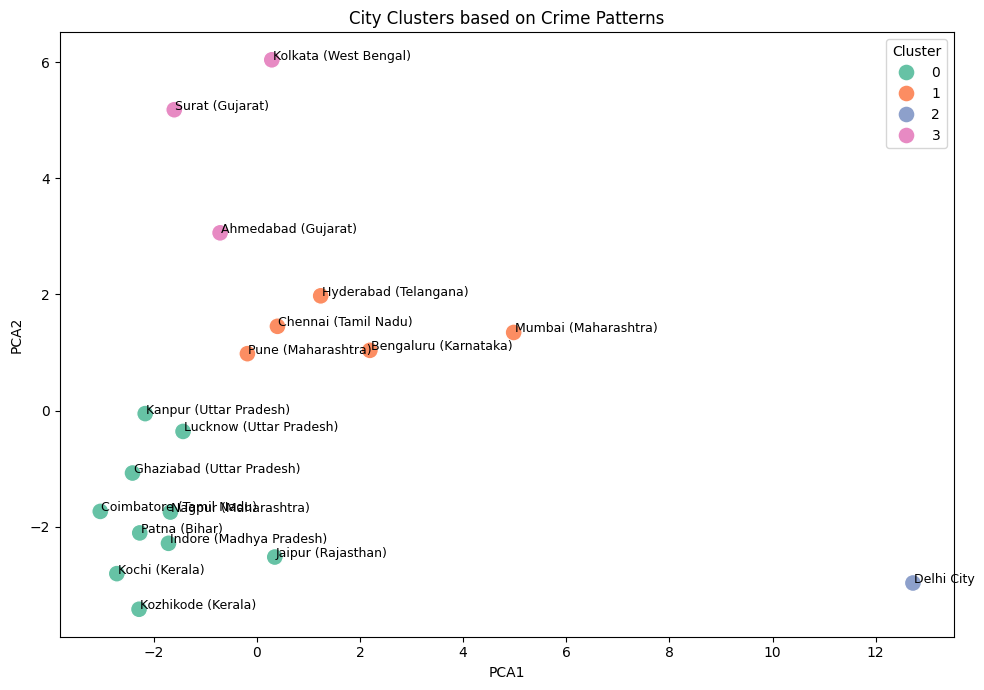

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
city_features_scaled['PCA1'] = pca_result[:,0]
city_features_scaled['PCA2'] = pca_result[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=city_features_scaled,
    x='PCA1', y='PCA2', hue='Cluster',
    palette='Set2', s=150
)
for i, row in city_features_scaled.iterrows():
    plt.text(row['PCA1']+0.02, row['PCA2'], row['City'], fontsize=9)
plt.title('City Clusters based on Crime Patterns')
plt.tight_layout()
plt.show()


In [ ]:

city_features_scaled['Cluster'] = kmeans.labels_

cluster_summary = city_features_scaled.drop(columns=['City'], errors='ignore').groupby('Cluster').mean()

display(cluster_summary)



Total_Incidents_Crimes_Financial  \
Cluster                                     
0                               -0.363965   
1                                0.747295   
2                                1.446285   
3                               -0.514372   

         Total_Incidents_Crimes_Miscellaneous  \
Cluster                                         
0                                   -0.321338   
1                                   -0.043055   
2                                    4.112324   
3                                   -0.227892   

         Total_Incidents_Crimes_Negligence_Accidents  \
Cluster                                                
0                                          -0.232357   
1                                           0.621985   
2                                           0.509113   
3                                          -0.431824   

         Total_Incidents_Crimes_Person  Total_Incidents_Crimes_Property  \
Cluster                                                                   
0                            -0.335289                        -0.258982   
1                             0.236703                        -0.155174   
2                             3.482465                         4.221882   
3                            -0.437698                        -0.285396   

         Total_Incidents_Crimes_Public_Order  Total_Incidents_Crimes_State  \
Cluster                                                                      
0                                  -0.175132                     -0.342997   
1                                   0.685713                     -0.342997   
2                                   1.395076                     -0.342997   
3                                  -1.024107                      1.829318   

         Total_Victims_Crimes_Financial  Total_Victims_Crimes_Miscellaneous  \
Cluster                                                                       
0                             -0.384538                           -0.285597   
1                              0.701702                           -0.069415   
2                              1.904496                            4.170879   
3                             -0.522541                           -0.322611   

         Total_Victims_Crimes_Negligence_Accidents  \
Cluster                                              
0                                        -0.223827   
1                                         0.660506   
2                                         0.547918   
3                                        -0.537391   

         Total_Victims_Crimes_Person  Total_Victims_Crimes_Property  \
Cluster                                                               
0                          -0.334350                      -0.250486   
1                           0.230480                      -0.185689   
2                           3.517256                       4.234556   
3                          -0.442053                      -0.267084   

         Total_Victims_Crimes_Public_Order  Total_Victims_Crimes_State  \
Cluster                                                                  
0                                -0.310870                   -0.342997   
1                                 0.663748                   -0.342997   
2                                 1.964470                   -0.342997   
3                                -0.724838                    1.829318   

         Total_Reported_Crimes_Financial  Total_Reported_Crimes_Miscellaneous  \
Cluster                                                                         
0                               0.202463                             0.142909   
1                               0.013762                            -0.618656   
2                              -0.133810                             3.412503   
3                              -0.653209                            -0.582771   

         Total_Reported_Cri

In [ ]:
kmeans_features = X.columns.tolist()


In [ ]:
# Make a copy to be safe
df_clusters = city_features_scaled.copy()

# Ensure 'Cluster' exists (from your previous KMeans)
# If not, assign clusters again:
# df_clusters['Cluster'] = kmeans.labels_

# Drop non-numeric columns except 'Cluster'
numeric_cols = df_clusters.select_dtypes(include='number').columns.drop('Cluster')

# Aggregate mean values per cluster
cluster_profiles = df_clusters.groupby('Cluster')[numeric_cols].mean().reset_index()

display(cluster_profiles)


Cluster  Total_Incidents_Crimes_Financial  \
0        0                         -0.363965   
1        1                          0.747295   
2        2                          1.446285   
3        3                         -0.514372   

   Total_Incidents_Crimes_Miscellaneous  \
0                             -0.321338   
1                             -0.043055   
2                              4.112324   
3                             -0.227892   

   Total_Incidents_Crimes_Negligence_Accidents  Total_Incidents_Crimes_Person  \
0                                    -0.232357                      -0.335289   
1                                     0.621985                       0.236703   
2                                     0.509113                       3.482465   
3                                    -0.431824                      -0.437698   

   Total_Incidents_Crimes_Property  Total_Incidents_Crimes_Public_Order  \
0                        -0.258982                            -0.175132   
1                        -0.155174                             0.685713   
2                         4.221882                             1.395076   
3                        -0.285396                            -1.024107   

   Total_Incidents_Crimes_State  Total_Victims_Crimes_Financial  \
0                     -0.342997                       -0.384538   
1                     -0.342997                        0.701702   
2                     -0.342997                        1.904496   
3                      1.829318                       -0.522541   

   Total_Victims_Crimes_Miscellaneous  \
0                           -0.285597   
1                           -0.069415   
2                            4.170879   
3                           -0.322611   

   Total_Victims_Crimes_Negligence_Accidents  Total_Victims_Crimes_Person  \
0                                  -0.223827                    -0.334350   
1                                   0.660506                     0.230480   
2                                   0.547918                     3.517256   
3                                  -0.537391                    -0.442053   

   Total_Victims_Crimes_Property  Total_Victims_Crimes_Public_Order  \
0                      -0.250486                          -0.310870   
1                      -0.185689                           0.663748   
2                       4.234556                           1.964470   
3                      -0.267084                          -0.724838   

   Total_Victims_Crimes_State  Total_Reported_Crimes_Financial  \
0                   -0.342997                         0.202463   
1                   -0.342997                         0.013762   
2                   -0.342997                        -0.133810   
3                    1.829318                        -0.653209   

   Total_Reported_Crimes_Miscellaneous  \
0                             0.142909   
1                            -0.618656   
2                             3.412503   
3                            -0.582771   

   Total_Reported_Crimes_Negligence_Accidents  Total_Reported_Crimes_Person  \
0                                    0.356472                      0.493291   
1                                   -0.274757                     -0.520415   
2                                   -0.433862                      0.285961   
3                                   -0.585690                     -0.872267   

   Total_Reported_Crimes_Property  Total_Reported_Crimes_Public_Order  \
0                       -0.093408                            0.523145   
1                       -0.330901                           -0.353469   
2                        4.029834                           -0.571272   
3                       -0.480415                           -0.964278   

   Total_Reported_Crimes_State  Severity_Crimes_Financial  \
0                          0.0                  -0.332745   
1                          0.0                   0.055

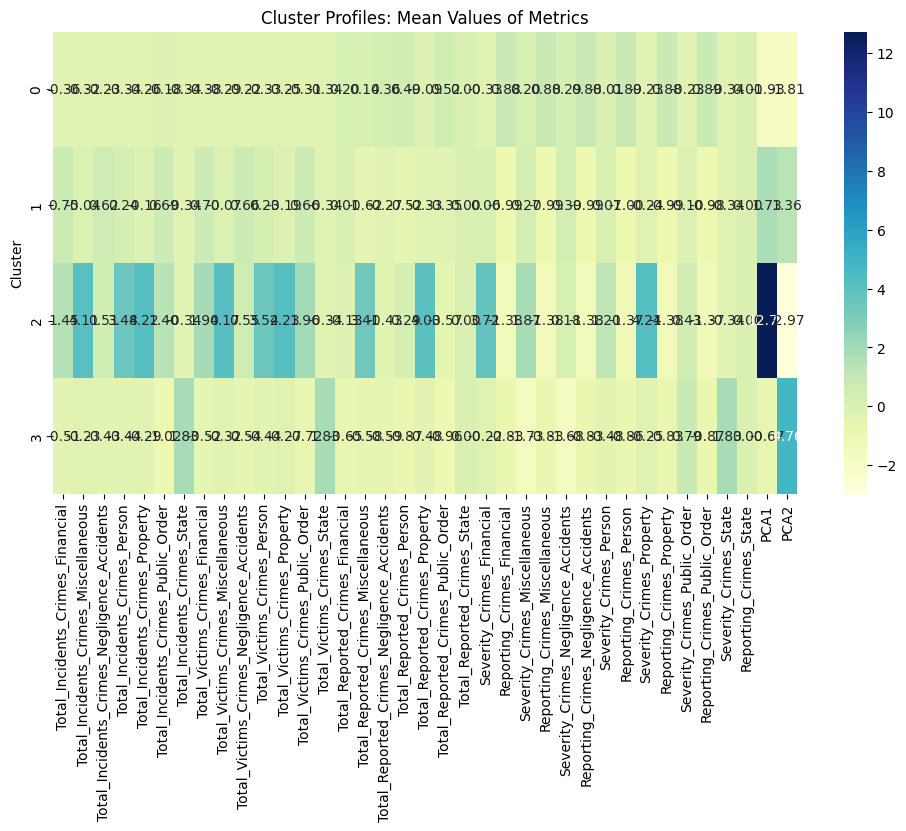

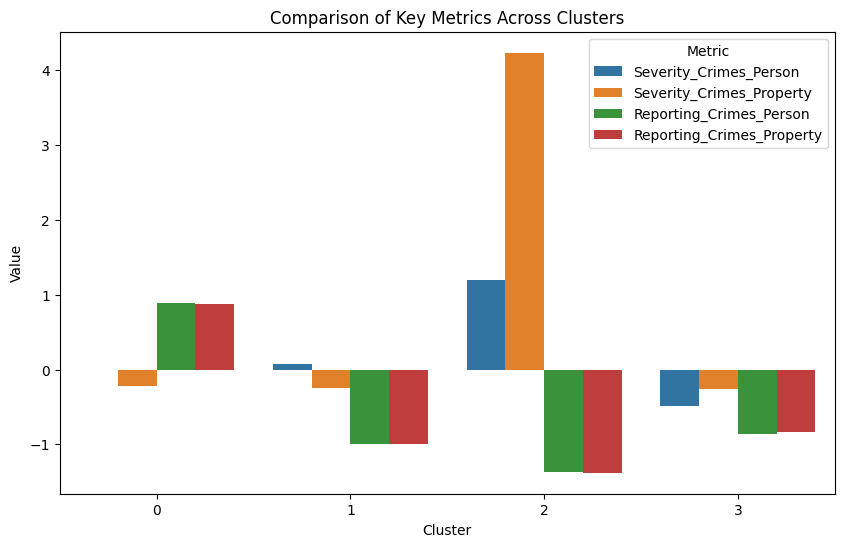

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profiles.set_index('Cluster'), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster Profiles: Mean Values of Metrics")
plt.show()
metrics_to_compare = ['Severity_Crimes_Person','Severity_Crimes_Property','Reporting_Crimes_Person','Reporting_Crimes_Property']
cluster_profiles_melted = cluster_profiles.melt(id_vars='Cluster', value_vars=metrics_to_compare, var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(data=cluster_profiles_melted, x='Cluster', y='Value', hue='Metric')
plt.title("Comparison of Key Metrics Across Clusters")
plt.show()


In [ ]:
cluster_labels = {
    0: "Below-Average Severity, Average Reporting",
    1: "Slightly Above-Average Person Crime Severity, Below-Average Reporting",
    2: " High Severity, Low Reporting",
    3: "Below-Average Severity and Reporting"
}

city_features_scaled['Cluster_Label'] = city_features_scaled['Cluster'].map(cluster_labels)


In [ ]:
# Check how cities are distributed across labeled clusters
city_distribution = city_features_scaled.groupby('Cluster_Label')['City'].count()
print(city_distribution)

# View cities in each cluster
for label in city_features_scaled['Cluster_Label'].unique():
    print(f"\nCities in cluster '{label}':")
    print(city_features_scaled[city_features_scaled['Cluster_Label'] == label]['City'].values)


Cluster_Label
 High Severity, Low Reporting                                             1
Below-Average Severity and Reporting                                      3
Below-Average Severity, Average Reporting                                10
Slightly Above-Average Person Crime Severity, Below-Average Reporting     5
Name: City, dtype: int64

Cities in cluster 'Below-Average Severity and Reporting':
['Ahmedabad (Gujarat)' 'Kolkata (West Bengal)' 'Surat (Gujarat)']

Cities in cluster 'Slightly Above-Average Person Crime Severity, Below-Average Reporting':
['Bengaluru (Karnataka)' 'Chennai (Tamil Nadu)' 'Hyderabad (Telangana)'
 'Mumbai (Maharashtra)' 'Pune (Maharashtra)']

Cities in cluster 'Below-Average Severity, Average Reporting':
['Coimbatore (Tamil Nadu)' 'Ghaziabad (Uttar Pradesh)'
 'Indore (Madhya Pradesh)' 'Jaipur (Rajasthan)' 'Kanpur (Uttar Pradesh)'
 'Kochi (Kerala)' 'Kozhikode (Kerala)' 'Lucknow (Uttar Pradesh)'
 'Nagpur (Maharashtra)' 'Patna (Bihar)']

Cities in cluster ' Hig

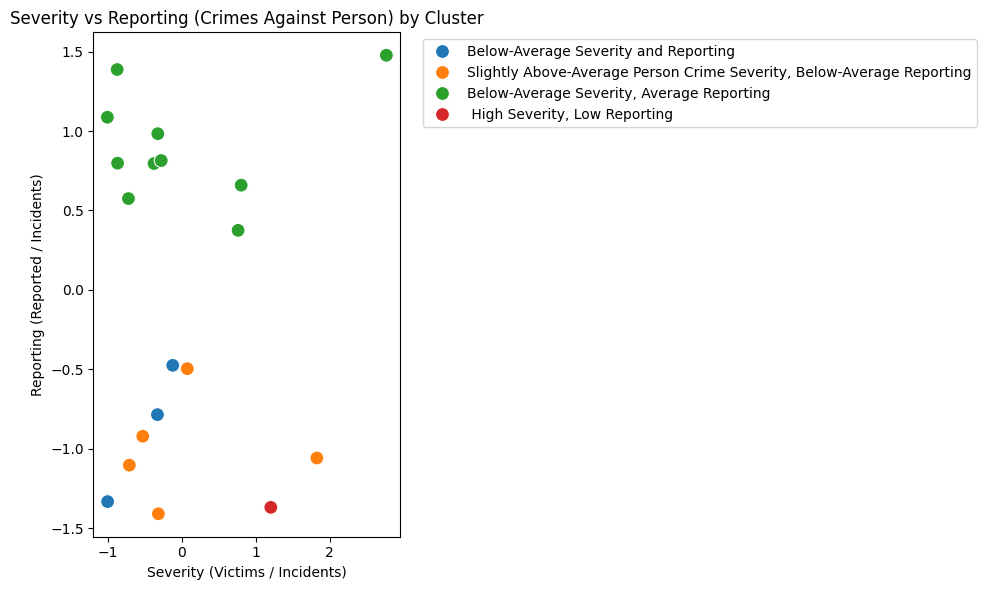

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Severity vs Reporting for all cities, colored by cluster
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=city_features_scaled,
    x='Severity_Crimes_Person',
    y='Reporting_Crimes_Person',
    hue='Cluster_Label',
    s=100
)
plt.title("Severity vs Reporting (Crimes Against Person) by Cluster")
plt.xlabel("Severity (Victims / Incidents)")
plt.ylabel("Reporting (Reported / Incidents)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
numeric_cols = city_features_scaled.select_dtypes(include='number').columns.drop('Cluster')
cluster_summary = city_features_scaled.groupby('Cluster_Label')[numeric_cols].mean()
display(cluster_summary)


Total_Incidents_Crimes_Financial  \
Cluster_Label                                                                          
 High Severity, Low Reporting                                               1.446285   
Below-Average Severity and Reporting                                       -0.514372   
Below-Average Severity, Average Reporting                                  -0.363965   
Slightly Above-Average Person Crime Severity, B...                          0.747295   

                                                    Total_Incidents_Crimes_Miscellaneous  \
Cluster_Label                                                                              
 High Severity, Low Reporting                                                   4.112324   
Below-Average Severity and Reporting                                           -0.227892   
Below-Average Severity, Average Reporting                                      -0.321338   
Slightly Above-Average Person Crime Severity, B...                             -0.043055   

                                                    Total_Incidents_Crimes_Negligence_Accidents  \
Cluster_Label                                                                                     
 High Severity, Low Reporting                                                          0.509113   
Below-Average Severity and Reporting                                                  -0.431824   
Below-Average Severity, Average Reporting                                             -0.232357   
Slightly Above-Average Person Crime Severity, B...                                     0.621985   

                                                    Total_Incidents_Crimes_Person  \
Cluster_Label                                                                       
 High Severity, Low Reporting                                            3.482465   
Below-Average Severity and Reporting                                    -0.437698   
Below-Average Severity, Average Reporting                               -0.335289   
Slightly Above-Average Person Crime Severity, B...                       0.236703   

                                                    Total_Incidents_Crimes_Property  \
Cluster_Label                                                                         
 High Severity, Low Reporting                                              4.221882   
Below-Average Severity and Reporting                                      -0.285396   
Below-Average Severity, Average Reporting                                 -0.258982   
Slightly Above-Average Person Crime Severity, B...                        -0.155174   

                                                    Total_Incidents_Crimes_Public_Order  \
Cluster_Label                                                                             
 High Severity, Low Reporting                                                  1.395076   
Below-Average Severity and Reporting                                          -1.024107   
Below-Average Severity, Average Reporting                                     -0.175132   
Slightly Above-Average Person Crime Severity, B...                             0.685713   

                                                    Total_Incidents_Crimes_State  \
Cluster_Label                                                                      
 High Severity, Low Reporting                                          -0.342997   
Below-Average Severity and Reporting                                    1.829318   
Below-Average Severity, Average Reporting                              -0.342997   
Slightly Above-Average Person Crime Severity, B...                     -0.342997   

                                                    Total_Victims_Crimes_Financial  \
Cluster_Label                                                                        
 High Severity, Low Reporting                                             1.904496   
Below-Average Severity and Repo

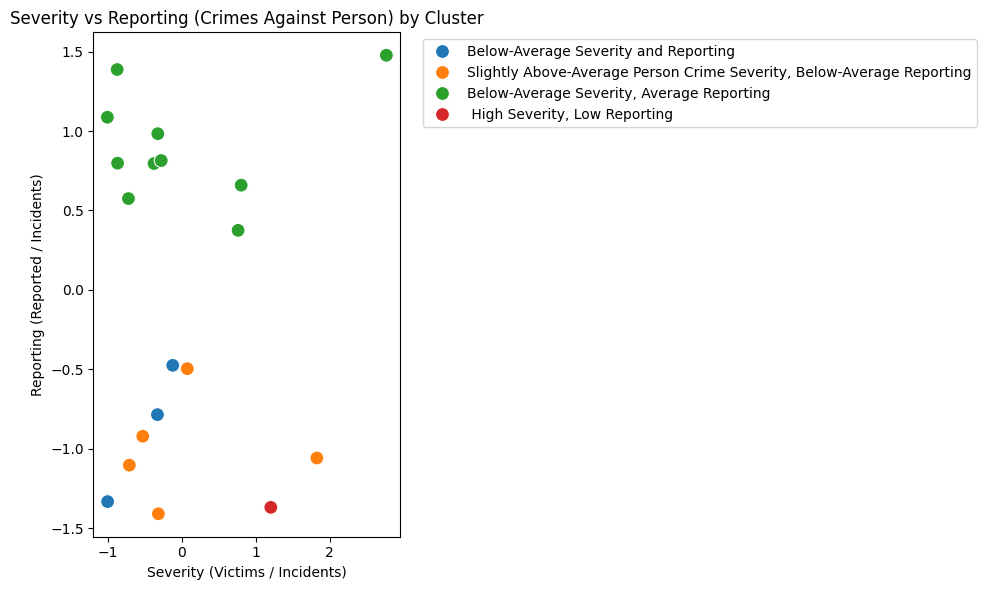

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=city_features_scaled,
    x='Severity_Crimes_Person',
    y='Reporting_Crimes_Person',
    hue='Cluster_Label',
    s=100
)
plt.title("Severity vs Reporting (Crimes Against Person) by Cluster")
plt.xlabel("Severity (Victims / Incidents)")
plt.ylabel("Reporting (Reported / Incidents)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
cluster_summary = city_features_scaled.groupby('Cluster_Label').agg(
    Cities=('City', 'count'),

    # Crimes Against Person
    Avg_Severity_Person=('Severity_Crimes_Person', 'mean'),
    Avg_Reporting_Person=('Reporting_Crimes_Person', 'mean'),
    Total_Incidents_Person=('Total_Incidents_Crimes_Person', 'sum'),

    # Crimes Against Property
    Avg_Severity_Property=('Severity_Crimes_Property', 'mean'),
    Avg_Reporting_Property=('Reporting_Crimes_Property', 'mean'),
    Total_Incidents_Property=('Total_Incidents_Crimes_Property', 'sum'),

    # Financial Crimes & Fraud
    Avg_Severity_Financial=('Severity_Crimes_Financial', 'mean'),
    Avg_Reporting_Financial=('Reporting_Crimes_Financial', 'mean'),
    Total_Incidents_Financial=('Total_Incidents_Crimes_Financial', 'sum'),

    # Crimes Affecting Public Order & State
    Avg_Severity_PublicOrder=('Severity_Crimes_Public_Order', 'mean'),
    Avg_Reporting_PublicOrder=('Reporting_Crimes_Public_Order', 'mean'),
    Total_Incidents_PublicOrder=('Total_Incidents_Crimes_Public_Order', 'sum'),

    Avg_Severity_State=('Severity_Crimes_State', 'mean'),
    Avg_Reporting_State=('Reporting_Crimes_State', 'mean'),
    Total_Incidents_State=('Total_Incidents_Crimes_State', 'sum'),

    # Negligence & Accidents
    Avg_Severity_NegAcc=('Severity_Crimes_Negligence_Accidents', 'mean'),
    Avg_Reporting_NegAcc=('Reporting_Crimes_Negligence_Accidents', 'mean'),
    Total_Incidents_NegAcc=('Total_Incidents_Crimes_Negligence_Accidents', 'sum'),

    # Miscellaneous Crimes
    Avg_Severity_Misc=('Severity_Crimes_Miscellaneous', 'mean'),
    Avg_Reporting_Misc=('Reporting_Crimes_Miscellaneous', 'mean'),
    Total_Incidents_Misc=('Total_Incidents_Crimes_Miscellaneous', 'sum')
).reset_index()

display(cluster_summary)


Cluster_Label  Cities  \
0                       High Severity, Low Reporting       1   
1               Below-Average Severity and Reporting       3   
2          Below-Average Severity, Average Reporting      10   
3  Slightly Above-Average Person Crime Severity, ...       5   

   Avg_Severity_Person  Avg_Reporting_Person  Total_Incidents_Person  \
0             1.203165             -1.368942                3.482465   
1            -0.483143             -0.864179               -1.313095   
2            -0.010575              0.894979               -3.352887   
3             0.070403             -0.997663                1.183517   

   Avg_Severity_Property  Avg_Reporting_Property  Total_Incidents_Property  \
0               4.235357               -1.378820                  4.221882   
1              -0.253567               -0.829834                 -0.856189   
2              -0.225502                0.883056                 -2.589822   
3              -0.243927               -0.992448                 -0.775871   

   Avg_Severity_Financial  Avg_Reporting_Financial  Total_Incidents_Financial  \
0                3.721590                -1.379760                   1.446285   
1               -0.223161                -0.828646                  -1.543115   
2               -0.332745                 0.882870                  -3.639647   
3                0.055069                -0.992600                   3.736477   

   Avg_Severity_PublicOrder  Avg_Reporting_PublicOrder  \
0                  0.429151                  -1.369888   
1                  0.794763                  -0.872446   
2                 -0.232521                   0.889143   
3                 -0.097646                  -0.980842   

   Total_Incidents_PublicOrder  Avg_Severity_State  Avg_Reporting_State  \
0                     1.395076           -0.342997                  0.0   
1                    -3.072320            1.829318                  0.0   
2                    -1.751319           -0.342997                  0.0   
3                     3.428564           -0.342997                  0.0   

   Total_Incidents_State  Avg_Severity_NegAcc  Avg_Reporting_NegAcc  \
0              -0.342997             0.180510             -1.377520   
1               5.487955            -1.681668             -0.830153   
2              -3.429972             0.290435              0.882992   
3              -1.714986             0.392030             -0.992388   

   Total_Incidents_NegAcc  Avg_Severity_Misc  Avg_Reporting_Misc  \
0                0.509113           1.866530           -1.378483   
1               -1.295471          -1.732223           -0.829196   
2               -2.323565           0.197804            0.882888   
3                3.109924           0.270420           -0.992563   

   Total_Incidents_Misc  
0              4.112324  
1             -0.683675  
2             -3.213375  
3             -0.215273

In [ ]:
# List of crime categories
crime_categories = ['Crimes_Person', 'Crimes_Property', 'Crimes_Financial',
                    'Crimes_Public_Order', 'Crimes_State', 'Crimes_Negligence_Accidents',
                    'Crimes_Miscellaneous']

# Threshold in std deviations
threshold = 2

for cluster_label in city_features_scaled['Cluster_Label'].unique():
    print(f"\n===== Cluster: {cluster_label} =====")

    cluster_data = city_features_scaled[city_features_scaled['Cluster_Label'] == cluster_label]

    for cat in crime_categories:
        sev_col = f'Severity_{cat}'
        rep_col = f'Reporting_{cat}'

        if sev_col in cluster_data.columns:
            mean_sev = cluster_data[sev_col].mean()
            std_sev = cluster_data[sev_col].std()
            sev_outliers = cluster_data[cluster_data[sev_col] > mean_sev + threshold*std_sev]

            if not sev_outliers.empty:
                print(f"\nSeverity Outliers in {cat}:")
                print(sev_outliers[['City', sev_col]])

        if rep_col in cluster_data.columns:
            mean_rep = cluster_data[rep_col].mean()
            std_rep = cluster_data[rep_col].std()
            rep_outliers = cluster_data[cluster_data[rep_col] < mean_rep - threshold*std_rep]

            if not rep_outliers.empty:
                print(f"\nReporting Outliers in {cat}:")
                print(rep_outliers[['City', rep_col]])




===== Cluster: Below-Average Severity and Reporting =====

===== Cluster: Slightly Above-Average Person Crime Severity, Below-Average Reporting =====

===== Cluster: Below-Average Severity, Average Reporting =====

Severity Outliers in Crimes_Person:
                  City  Severity_Crimes_Person
12  Kozhikode (Kerala)                2.763339

Severity Outliers in Crimes_Property:
             City  Severity_Crimes_Property
16  Patna (Bihar)                 -0.062605

Severity Outliers in Crimes_Financial:
                  City  Severity_Crimes_Financial
12  Kozhikode (Kerala)                   0.400281

Severity Outliers in Crimes_Negligence_Accidents:
                        City  Severity_Crimes_Negligence_Accidents
5  Ghaziabad (Uttar Pradesh)                              1.662588

===== Cluster:  High Severity, Low Reporting =====


In [ ]:
import pandas as pd

# Crime categories you have grouped
crime_categories = ['Crimes_Person', 'Crimes_Property', 'Crimes_Financial',
                    'Crimes_Public_Order', 'Crimes_State', 'Crimes_Negligence_Accidents',
                    'Crimes_Miscellaneous']

# Threshold multiplier for detecting outliers (e.g., 2 std deviations)
threshold = 2

# Dictionary to store detected outliers
outlier_summary = {}

for cluster in city_features_scaled['Cluster_Label'].unique():
    cluster_data = city_features_scaled[city_features_scaled['Cluster_Label'] == cluster]

    outlier_summary[cluster] = {}

    for cat in crime_categories:
        severity_col = f'Severity_{cat}'
        reporting_col = f'Reporting_{cat}'

        # Skip if column doesn't exist
        if severity_col not in cluster_data.columns or reporting_col not in cluster_data.columns:
            continue

        # Severity Outliers: Above threshold
        mean_sev = cluster_data[severity_col].mean()
        std_sev = cluster_data[severity_col].std()
        sev_outliers = cluster_data[cluster_data[severity_col] > mean_sev + threshold*std_sev]

        # Reporting Outliers: Below threshold (low reporting)
        mean_rep = cluster_data[reporting_col].mean()
        std_rep = cluster_data[reporting_col].std()
        rep_outliers = cluster_data[cluster_data[reporting_col] < mean_rep - threshold*std_rep]

        # Store results
        outlier_summary[cluster][cat] = {
            'Severity_Outliers': sev_outliers[['City', severity_col]],
            'Reporting_Outliers': rep_outliers[['City', reporting_col]]
        }

# Display results neatly
for cluster, cats in outlier_summary.items():
    print(f"\n===== Cluster: {cluster} =====")
    for cat, data in cats.items():
        if not data['Severity_Outliers'].empty:
            print(f"\nSeverity Outliers in {cat}:")
            print(data['Severity_Outliers'])
        if not data['Reporting_Outliers'].empty:
            print(f"\nReporting Outliers in {cat}:")
            print(data['Reporting_Outliers'])



===== Cluster: Below-Average Severity and Reporting =====

===== Cluster: Slightly Above-Average Person Crime Severity, Below-Average Reporting =====

===== Cluster: Below-Average Severity, Average Reporting =====

Severity Outliers in Crimes_Person:
                  City  Severity_Crimes_Person
12  Kozhikode (Kerala)                2.763339

Severity Outliers in Crimes_Property:
             City  Severity_Crimes_Property
16  Patna (Bihar)                 -0.062605

Severity Outliers in Crimes_Financial:
                  City  Severity_Crimes_Financial
12  Kozhikode (Kerala)                   0.400281

Severity Outliers in Crimes_Negligence_Accidents:
                        City  Severity_Crimes_Negligence_Accidents
5  Ghaziabad (Uttar Pradesh)                              1.662588

===== Cluster:  High Severity, Low Reporting =====


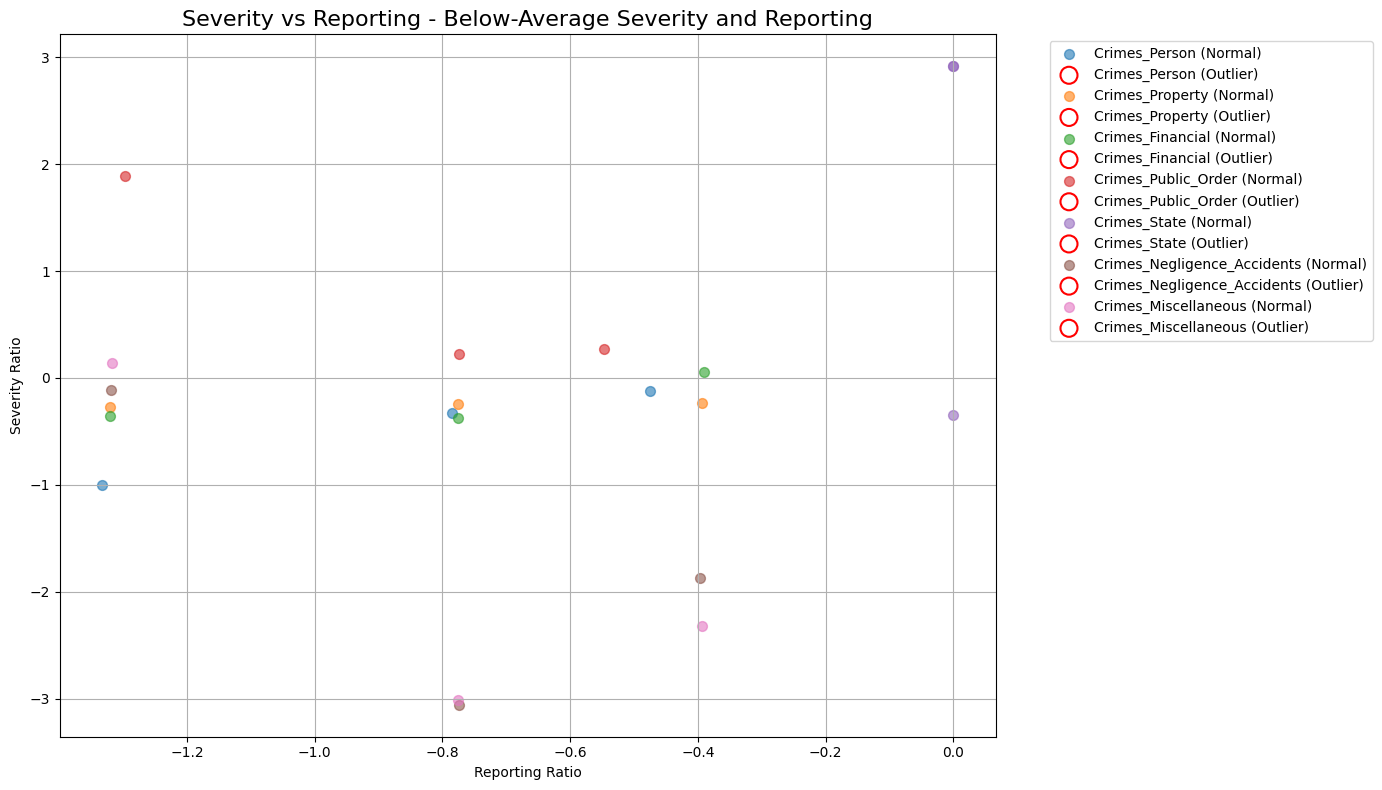

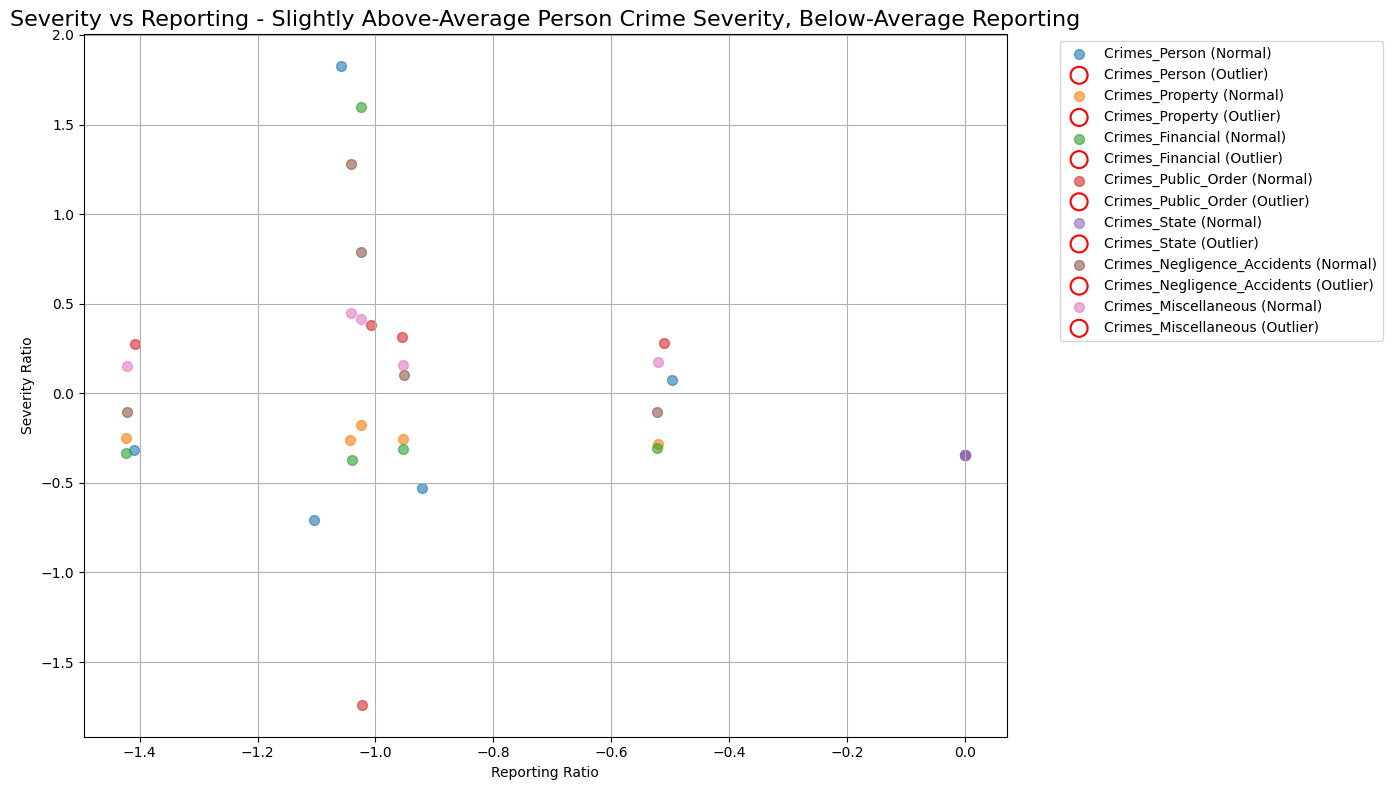

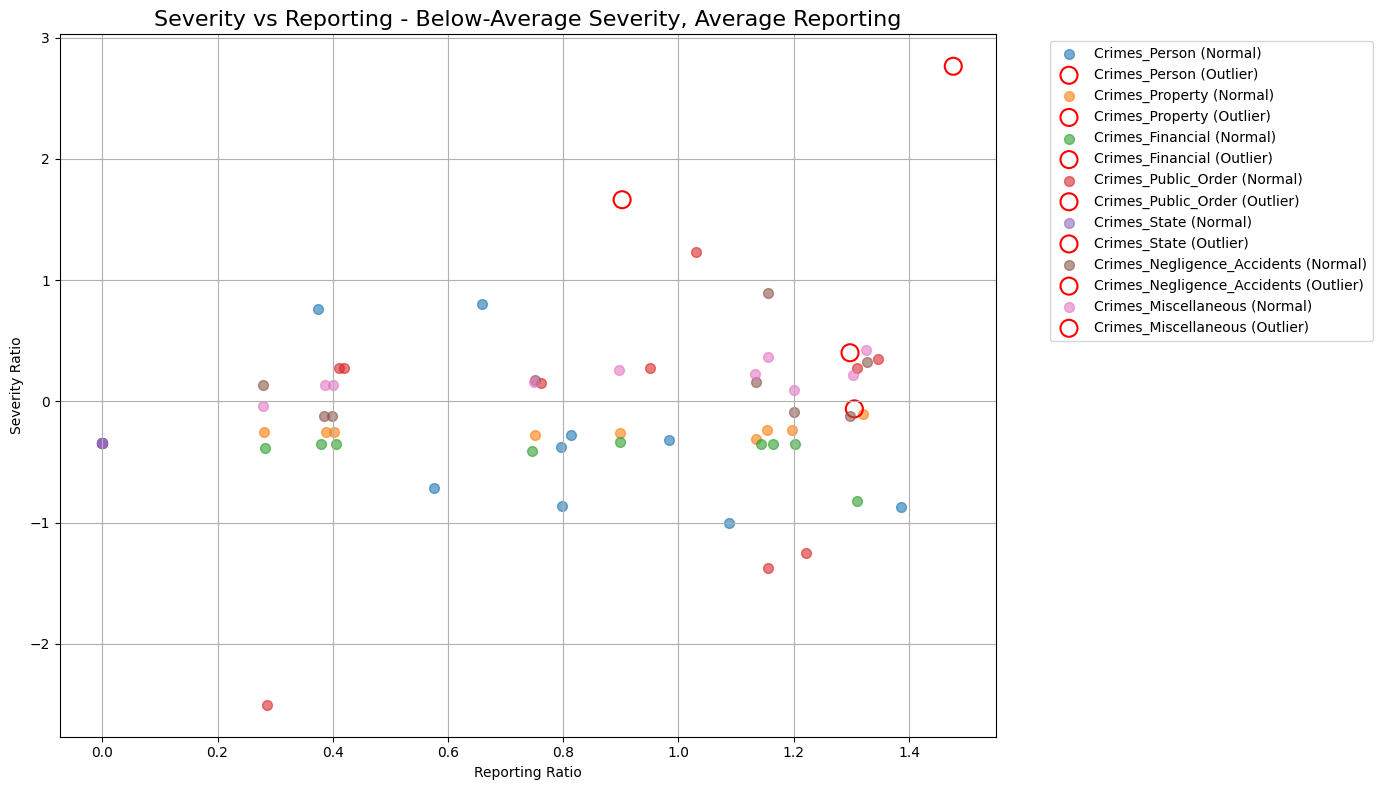

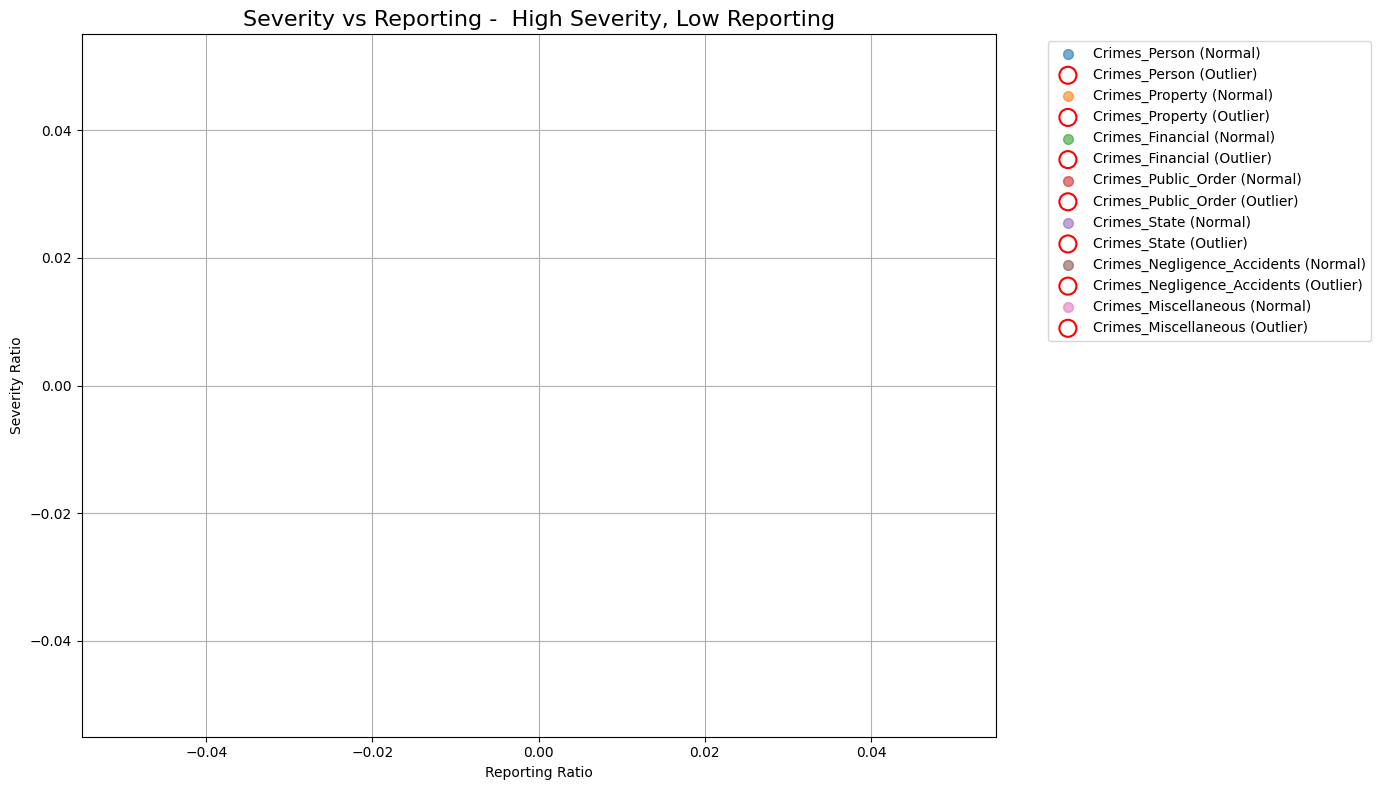

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

crime_categories = ['Crimes_Person', 'Crimes_Property', 'Crimes_Financial',
                    'Crimes_Public_Order', 'Crimes_State',
                    'Crimes_Negligence_Accidents', 'Crimes_Miscellaneous']

threshold = 2  # For outlier detection

for cluster_label in city_features_scaled['Cluster_Label'].unique():
    cluster_data = city_features_scaled[city_features_scaled['Cluster_Label'] == cluster_label]

    plt.figure(figsize=(14,8))
    plt.title(f"Severity vs Reporting - {cluster_label}", fontsize=16)

    for cat in crime_categories:
        sev_col = f'Severity_{cat}'
        rep_col = f'Reporting_{cat}'
        if sev_col not in cluster_data.columns or rep_col not in cluster_data.columns:
            continue

        # Detect outliers
        mean_sev, std_sev = cluster_data[sev_col].mean(), cluster_data[sev_col].std()
        mean_rep, std_rep = cluster_data[rep_col].mean(), cluster_data[rep_col].std()

        # Normal points
        normal = cluster_data[(cluster_data[sev_col] <= mean_sev + threshold*std_sev) &
                              (cluster_data[rep_col] >= mean_rep - threshold*std_rep)]

        # Outlier points
        outliers = cluster_data[(cluster_data[sev_col] > mean_sev + threshold*std_sev) |
                                (cluster_data[rep_col] < mean_rep - threshold*std_rep)]

        # Plot normal cities
        plt.scatter(normal[rep_col], normal[sev_col], label=f'{cat} (Normal)', s=50, alpha=0.6)

        # Plot outliers
        plt.scatter(outliers[rep_col], outliers[sev_col], label=f'{cat} (Outlier)', s=150, edgecolor='red', facecolor='none', linewidth=1.5)

    plt.xlabel('Reporting Ratio')
    plt.ylabel('Severity Ratio')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
outlier_summary_table.to_csv("outlier_summary.csv", index=False)


In [ ]:
city_features_scaled.to_csv("processed_city_crime_clusters.csv", index=False)


In [ ]:
cluster_summary = city_features_scaled.groupby('Cluster_Label').agg(
    Cities=('City', 'count'),
    Avg_Severity_Person=('Severity_Crimes_Person', 'mean'),
    Avg_Reporting_Person=('Reporting_Crimes_Person', 'mean'),
    Total_Incidents_Person=('Total_Incidents_Crimes_Person', 'sum'),
    Avg_Severity_Property=('Severity_Crimes_Property', 'mean'),
    Avg_Reporting_Property=('Reporting_Crimes_Property', 'mean'),
    Total_Incidents_Property=('Total_Incidents_Crimes_Property', 'sum'),
    Avg_Severity_Financial=('Severity_Crimes_Financial', 'mean'),
    Avg_Reporting_Financial=('Reporting_Crimes_Financial', 'mean'),
    Total_Incidents_Financial=('Total_Incidents_Crimes_Financial', 'sum'),
    Avg_Severity_PublicOrder=('Severity_Crimes_Public_Order', 'mean'),
    Avg_Reporting_PublicOrder=('Reporting_Crimes_Public_Order', 'mean'),
    Total_Incidents_PublicOrder=('Total_Incidents_Crimes_Public_Order', 'sum'),
    Avg_Severity_State=('Severity_Crimes_State', 'mean'),
    Avg_Reporting_State=('Reporting_Crimes_State', 'mean'),
    Total_Incidents_State=('Total_Incidents_Crimes_State', 'sum'),
    Avg_Severity_Accidents=('Severity_Crimes_Negligence_Accidents', 'mean'),
    Avg_Reporting_Accidents=('Reporting_Crimes_Negligence_Accidents', 'mean'),
    Total_Incidents_Accidents=('Total_Incidents_Crimes_Negligence_Accidents', 'sum'),
    Avg_Severity_Misc=('Severity_Crimes_Miscellaneous', 'mean'),
    Avg_Reporting_Misc=('Reporting_Crimes_Miscellaneous', 'mean'),
    Total_Incidents_Misc=('Total_Incidents_Crimes_Miscellaneous', 'sum')
).reset_index()

display(cluster_summary)


Cluster_Label  Cities  \
0                       High Severity, Low Reporting       1   
1               Below-Average Severity and Reporting       3   
2          Below-Average Severity, Average Reporting      10   
3  Slightly Above-Average Person Crime Severity, ...       5   

   Avg_Severity_Person  Avg_Reporting_Person  Total_Incidents_Person  \
0             1.203165             -1.368942                3.482465   
1            -0.483143             -0.864179               -1.313095   
2            -0.010575              0.894979               -3.352887   
3             0.070403             -0.997663                1.183517   

   Avg_Severity_Property  Avg_Reporting_Property  Total_Incidents_Property  \
0               4.235357               -1.378820                  4.221882   
1              -0.253567               -0.829834                 -0.856189   
2              -0.225502                0.883056                 -2.589822   
3              -0.243927               -0.992448                 -0.775871   

   Avg_Severity_Financial  Avg_Reporting_Financial  Total_Incidents_Financial  \
0                3.721590                -1.379760                   1.446285   
1               -0.223161                -0.828646                  -1.543115   
2               -0.332745                 0.882870                  -3.639647   
3                0.055069                -0.992600                   3.736477   

   Avg_Severity_PublicOrder  Avg_Reporting_PublicOrder  \
0                  0.429151                  -1.369888   
1                  0.794763                  -0.872446   
2                 -0.232521                   0.889143   
3                 -0.097646                  -0.980842   

   Total_Incidents_PublicOrder  Avg_Severity_State  Avg_Reporting_State  \
0                     1.395076           -0.342997                  0.0   
1                    -3.072320            1.829318                  0.0   
2                    -1.751319           -0.342997                  0.0   
3                     3.428564           -0.342997                  0.0   

   Total_Incidents_State  Avg_Severity_Accidents  Avg_Reporting_Accidents  \
0              -0.342997                0.180510                -1.377520   
1               5.487955               -1.681668                -0.830153   
2              -3.429972                0.290435                 0.882992   
3              -1.714986                0.392030                -0.992388   

   Total_Incidents_Accidents  Avg_Severity_Misc  Avg_Reporting_Misc  \
0                   0.509113           1.866530           -1.378483   
1                  -1.295471          -1.732223           -0.829196   
2                  -2.323565           0.197804            0.882888   
3                   3.109924           0.270420           -0.992563   

   Total_Incidents_Misc  
0              4.112324  
1             -0.683675  
2             -3.213375  
3             -0.215273

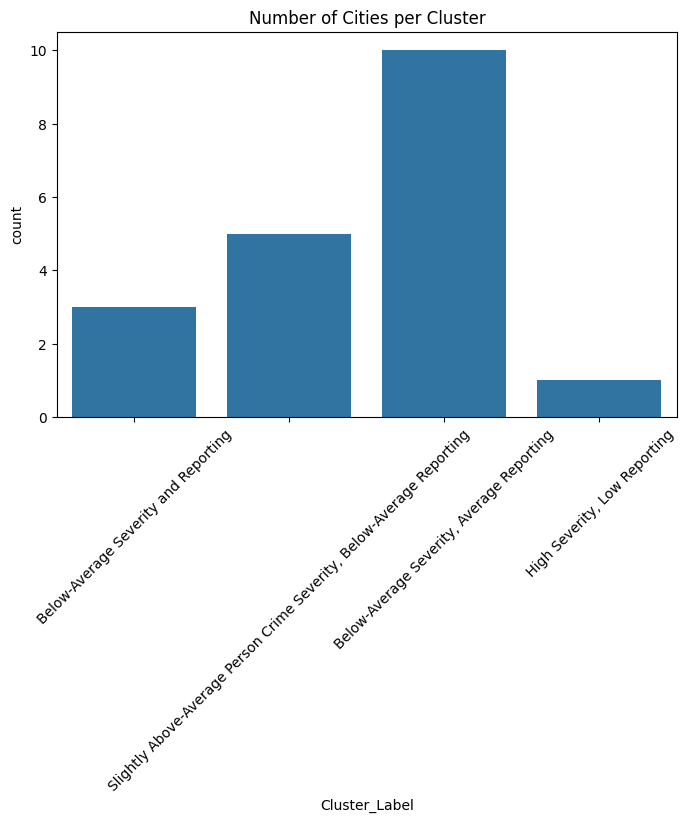

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=city_features_scaled, x='Cluster_Label', order=city_features_scaled['Cluster_Label'].unique())
plt.xticks(rotation=45)
plt.title("Number of Cities per Cluster")
plt.show()


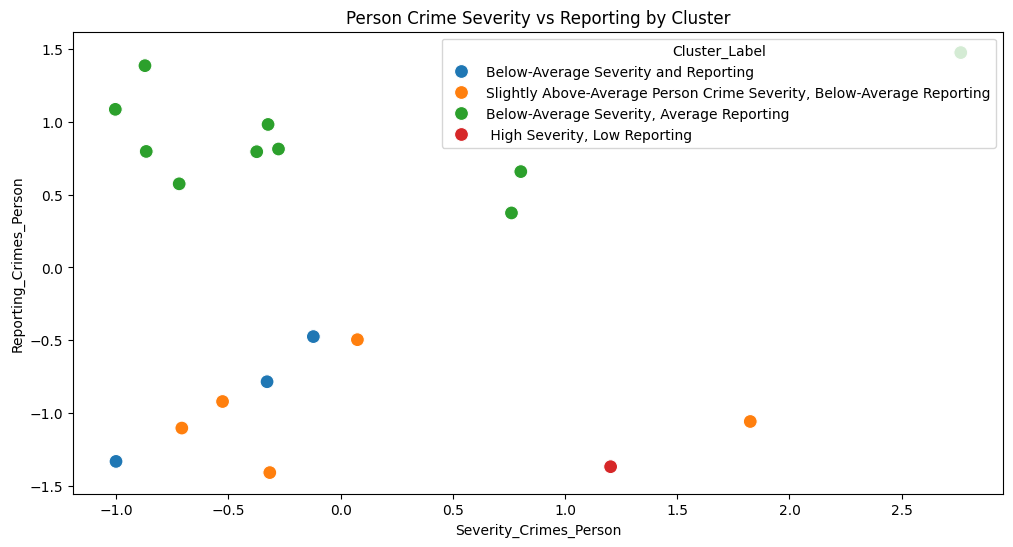

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=city_features_scaled,
    x='Severity_Crimes_Person',
    y='Reporting_Crimes_Person',
    hue='Cluster_Label',
    s=100
)
plt.title("Person Crime Severity vs Reporting by Cluster")
plt.show()


In [ ]:
# ---- 4. Outlier Detection (Severity) ----
threshold = 2  # 2 std deviations
for cluster in city_features_scaled['Cluster_Label'].unique():
    cluster_data = city_features_scaled[city_features_scaled['Cluster_Label'] == cluster]
    print(f"\n===== Outliers in {cluster} =====")
    for cat in crime_categories:
        col = f'Severity_{cat}'
        if col in cluster_data.columns:
            mean_val = cluster_data[col].mean()
            std_val = cluster_data[col].std()
            outliers = cluster_data[cluster_data[col] > mean_val + threshold*std_val]
            if not outliers.empty:
                print(f"\nSeverity Outliers in {cat}:")
                print(outliers[['City', col]])


===== Outliers in Below-Average Severity and Reporting =====

===== Outliers in Slightly Above-Average Person Crime Severity, Below-Average Reporting =====

===== Outliers in Below-Average Severity, Average Reporting =====

Severity Outliers in Crimes_Person:
                  City  Severity_Crimes_Person
12  Kozhikode (Kerala)                2.763339

Severity Outliers in Crimes_Property:
             City  Severity_Crimes_Property
16  Patna (Bihar)                 -0.062605

Severity Outliers in Crimes_Financial:
                  City  Severity_Crimes_Financial
12  Kozhikode (Kerala)                   0.400281

Severity Outliers in Crimes_Negligence_Accidents:
                        City  Severity_Crimes_Negligence_Accidents
5  Ghaziabad (Uttar Pradesh)                              1.662588

===== Outliers in  High Severity, Low Reporting =====


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crime categories
crime_categories = ['Crimes_Person', 'Crimes_Property', 'Crimes_Financial',
                    'Crimes_Public_Order', 'Crimes_State',
                    'Crimes_Negligence_Accidents', 'Crimes_Miscellaneous']

# Columns to drop from features
drop_cols = ['City', 'Cluster_Label']

# Dictionary to store results
results = {}

for cat in crime_categories:
    print(f"\n=== Predicting for: {cat} ===")

    # Targets
    targets = [f'Severity_{cat}', f'Reporting_{cat}']

    for target_col in targets:
        print(f"\nTarget: {target_col}")

        # Features: all numeric columns except the target
        feature_cols = city_features_scaled.select_dtypes(include='number').columns.drop(target_col)
        X = city_features_scaled[feature_cols]
        y = city_features_scaled[target_col]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Optional: scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Model: Random Forest Regressor
        model = RandomForestRegressor(n_estimators=200, random_state=42)
        model.fit(X_train_scaled, y_train)

        # Predict & evaluate
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"MSE: {mse:.4f}, R2: {r2:.4f}")

        # Feature importance
        importance = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False).head(10)
        print("\nTop 10 Features:")
        display(importance)

        # Store results
        results[target_col] = {'model': model, 'scaler': scaler, 'features': feature_cols}


=== Predicting for: Crimes_Person ===

Target: Severity_Crimes_Person
MSE: 0.9345, R2: 0.2751

Top 10 Features:


Feature  Importance
19    Total_Reported_Crimes_Public_Order    0.164776
36                                  PCA2    0.141128
21             Severity_Crimes_Financial    0.082003
28              Severity_Crimes_Property    0.053714
12     Total_Victims_Crimes_Public_Order    0.049155
18        Total_Reported_Crimes_Property    0.045698
15   Total_Reported_Crimes_Miscellaneous    0.044554
25  Severity_Crimes_Negligence_Accidents    0.043148
30          Severity_Crimes_Public_Order    0.041789
27               Reporting_Crimes_Person    0.035072


Target: Reporting_Crimes_Person
MSE: 0.0841, R2: 0.8769

Top 10 Features:


Feature  Importance
34                                     Cluster    0.201742
22                  Reporting_Crimes_Financial    0.128639
36                                        PCA2    0.117606
26       Reporting_Crimes_Negligence_Accidents    0.101391
31               Reporting_Crimes_Public_Order    0.087704
29                   Reporting_Crimes_Property    0.074950
35                                        PCA1    0.067242
24              Reporting_Crimes_Miscellaneous    0.054159
21                   Severity_Crimes_Financial    0.017950
16  Total_Reported_Crimes_Negligence_Accidents    0.017005


=== Predicting for: Crimes_Property ===

Target: Severity_Crimes_Property
MSE: 0.0147, R2: -8.9582

Top 10 Features:


Feature  Importance
21             Severity_Crimes_Financial    0.110636
23         Severity_Crimes_Miscellaneous    0.073227
31         Reporting_Crimes_Public_Order    0.063844
1   Total_Incidents_Crimes_Miscellaneous    0.060347
11         Total_Victims_Crimes_Property    0.060139
22            Reporting_Crimes_Financial    0.059330
10           Total_Victims_Crimes_Person    0.052251
3          Total_Incidents_Crimes_Person    0.049083
24        Reporting_Crimes_Miscellaneous    0.047994
35                                  PCA1    0.040820


Target: Reporting_Crimes_Property
MSE: 0.0919, R2: 0.8761

Top 10 Features:


Feature  Importance
34                                     Cluster    0.196446
22                  Reporting_Crimes_Financial    0.115236
36                                        PCA2    0.111877
28                     Reporting_Crimes_Person    0.096116
24              Reporting_Crimes_Miscellaneous    0.095706
31               Reporting_Crimes_Public_Order    0.094833
35                                        PCA1    0.072451
26       Reporting_Crimes_Negligence_Accidents    0.065177
16  Total_Reported_Crimes_Negligence_Accidents    0.027631
5          Total_Incidents_Crimes_Public_Order    0.017151


=== Predicting for: Crimes_Financial ===

Target: Severity_Crimes_Financial
MSE: 0.8376, R2: -0.1759

Top 10 Features:


Feature  Importance
10           Total_Victims_Crimes_Person    0.105988
3          Total_Incidents_Crimes_Person    0.103193
22         Severity_Crimes_Miscellaneous    0.087806
15   Total_Reported_Crimes_Miscellaneous    0.071348
28              Severity_Crimes_Property    0.070681
18        Total_Reported_Crimes_Property    0.066584
11         Total_Victims_Crimes_Property    0.039856
36                                  PCA2    0.037961
1   Total_Incidents_Crimes_Miscellaneous    0.037655
14       Total_Reported_Crimes_Financial    0.033231


Target: Reporting_Crimes_Financial
MSE: 0.0715, R2: 0.9038

Top 10 Features:


Feature  Importance
34                                Cluster    0.182270
31          Reporting_Crimes_Public_Order    0.122694
23         Reporting_Crimes_Miscellaneous    0.113813
25  Reporting_Crimes_Negligence_Accidents    0.106638
27                Reporting_Crimes_Person    0.096693
29              Reporting_Crimes_Property    0.091422
36                                   PCA2    0.084935
35                                   PCA1    0.055482
21              Severity_Crimes_Financial    0.022202
17           Total_Reported_Crimes_Person    0.020508


=== Predicting for: Crimes_Public_Order ===

Target: Severity_Crimes_Public_Order
MSE: 1.3185, R2: -1.7372

Top 10 Features:


Feature  Importance
25        Severity_Crimes_Negligence_Accidents    0.161097
15         Total_Reported_Crimes_Miscellaneous    0.137897
19          Total_Reported_Crimes_Public_Order    0.108442
35                                        PCA1    0.085778
21                   Severity_Crimes_Financial    0.081570
14             Total_Reported_Crimes_Financial    0.058645
18              Total_Reported_Crimes_Property    0.050152
23               Severity_Crimes_Miscellaneous    0.046560
16  Total_Reported_Crimes_Negligence_Accidents    0.033163
5          Total_Incidents_Crimes_Public_Order    0.030546


Target: Reporting_Crimes_Public_Order
MSE: 0.0534, R2: 0.9303

Top 10 Features:


Feature  Importance
34                                     Cluster    0.212510
22                  Reporting_Crimes_Financial    0.128992
28                     Reporting_Crimes_Person    0.101411
36                                        PCA2    0.097166
24              Reporting_Crimes_Miscellaneous    0.094155
26       Reporting_Crimes_Negligence_Accidents    0.090434
30                   Reporting_Crimes_Property    0.085052
35                                        PCA1    0.070550
16  Total_Reported_Crimes_Negligence_Accidents    0.020915
21                   Severity_Crimes_Financial    0.014354


=== Predicting for: Crimes_State ===

Target: Severity_Crimes_State
MSE: 1.4268, R2: 0.2833

Top 10 Features:


Feature  Importance
34                               Cluster    0.103704
23         Severity_Crimes_Miscellaneous    0.096296
5    Total_Incidents_Crimes_Public_Order    0.081481
25  Severity_Crimes_Negligence_Accidents    0.081481
3          Total_Incidents_Crimes_Person    0.074074
36                                  PCA2    0.074074
6           Total_Incidents_Crimes_State    0.074074
12     Total_Victims_Crimes_Public_Order    0.074074
19    Total_Reported_Crimes_Public_Order    0.074074
17          Total_Reported_Crimes_Person    0.074074


Target: Reporting_Crimes_State
MSE: 0.0000, R2: 1.0000

Top 10 Features:


Feature  Importance
0             Total_Incidents_Crimes_Financial         0.0
1         Total_Incidents_Crimes_Miscellaneous         0.0
2  Total_Incidents_Crimes_Negligence_Accidents         0.0
3                Total_Incidents_Crimes_Person         0.0
4              Total_Incidents_Crimes_Property         0.0
5          Total_Incidents_Crimes_Public_Order         0.0
6                 Total_Incidents_Crimes_State         0.0
7               Total_Victims_Crimes_Financial         0.0
8           Total_Victims_Crimes_Miscellaneous         0.0
9    Total_Victims_Crimes_Negligence_Accidents         0.0


=== Predicting for: Crimes_Negligence_Accidents ===

Target: Severity_Crimes_Negligence_Accidents
MSE: 2.9583, R2: 0.0624

Top 10 Features:


Feature  Importance
15  Total_Reported_Crimes_Miscellaneous    0.195965
36                                 PCA2    0.131753
23        Severity_Crimes_Miscellaneous    0.084510
30         Severity_Crimes_Public_Order    0.064298
17         Total_Reported_Crimes_Person    0.063285
14      Total_Reported_Crimes_Financial    0.046813
3         Total_Incidents_Crimes_Person    0.041254
34                              Cluster    0.039547
5   Total_Incidents_Crimes_Public_Order    0.036282
13           Total_Victims_Crimes_State    0.033993


Target: Reporting_Crimes_Negligence_Accidents
MSE: 0.0934, R2: 0.8745

Top 10 Features:


Feature  Importance
34                                     Cluster    0.256560
22                  Reporting_Crimes_Financial    0.112669
36                                        PCA2    0.104803
29                   Reporting_Crimes_Property    0.092742
27                     Reporting_Crimes_Person    0.078878
24              Reporting_Crimes_Miscellaneous    0.075492
31               Reporting_Crimes_Public_Order    0.075114
35                                        PCA1    0.058072
21                   Severity_Crimes_Financial    0.019974
16  Total_Reported_Crimes_Negligence_Accidents    0.014658


=== Predicting for: Crimes_Miscellaneous ===

Target: Severity_Crimes_Miscellaneous
MSE: 2.6850, R2: -0.3166

Top 10 Features:


Feature  Importance
36                                  PCA2    0.199612
24  Severity_Crimes_Negligence_Accidents    0.093099
34                               Cluster    0.087244
3          Total_Incidents_Crimes_Person    0.049345
32                 Severity_Crimes_State    0.047397
13            Total_Victims_Crimes_State    0.041737
14       Total_Reported_Crimes_Financial    0.039323
21             Severity_Crimes_Financial    0.039096
5    Total_Incidents_Crimes_Public_Order    0.038113
28              Severity_Crimes_Property    0.036469


Target: Reporting_Crimes_Miscellaneous
MSE: 0.0783, R2: 0.8942

Top 10 Features:


Feature  Importance
34                                     Cluster    0.177272
22                  Reporting_Crimes_Financial    0.153389
31               Reporting_Crimes_Public_Order    0.116934
25       Reporting_Crimes_Negligence_Accidents    0.109627
27                     Reporting_Crimes_Person    0.100387
29                   Reporting_Crimes_Property    0.079574
36                                        PCA2    0.075068
35                                        PCA1    0.056575
16  Total_Reported_Crimes_Negligence_Accidents    0.014437
12           Total_Victims_Crimes_Public_Order    0.013676

In [ ]:
print(city_features_scaled['Reporting_Crimes_State'].unique())


[0.]


In [ ]:
for cat in crime_categories:
    print(cat)
    print(city_features_scaled[f'Reporting_{cat}'].describe())


Crimes_Person
count    1.900000e+01
mean    -5.492682e-16
std      1.027402e+00
min     -1.409441e+00
25%     -9.896660e-01
50%      3.748092e-01
75%      8.058668e-01
max      1.476892e+00
Name: Reporting_Crimes_Person, dtype: float64
Crimes_Property
count    1.900000e+01
mean    -5.843279e-18
std      1.027402e+00
min     -1.422670e+00
25%     -9.887799e-01
50%      2.805119e-01
75%      1.016395e+00
max      1.320833e+00
Name: Reporting_Crimes_Property, dtype: float64
Crimes_Financial
count    1.900000e+01
mean    -1.752984e-17
std      1.027402e+00
min     -1.423985e+00
25%     -9.889832e-01
50%      2.826022e-01
75%      1.021131e+00
max      1.309076e+00
Name: Reporting_Crimes_Financial, dtype: float64
Crimes_Public_Order
count    1.900000e+01
mean    -4.733056e-16
std      1.027402e+00
min     -1.408237e+00
25%     -9.813068e-01
50%      2.866018e-01
75%      9.901051e-01
max      1.345690e+00
Name: Reporting_Crimes_Public_Order, dtype: float64
Crimes_State
count    19.0
mean   

In [ ]:
display(city_features_scaled.columns)

Index(['City', 'Total_Incidents_Crimes_Financial',
       'Total_Incidents_Crimes_Miscellaneous',
       'Total_Incidents_Crimes_Negligence_Accidents',
       'Total_Incidents_Crimes_Person', 'Total_Incidents_Crimes_Property',
       'Total_Incidents_Crimes_Public_Order', 'Total_Incidents_Crimes_State',
       'Total_Victims_Crimes_Financial', 'Total_Victims_Crimes_Miscellaneous',
       'Total_Victims_Crimes_Negligence_Accidents',
       'Total_Victims_Crimes_Person', 'Total_Victims_Crimes_Property',
       'Total_Victims_Crimes_Public_Order', 'Total_Victims_Crimes_State',
       'Total_Reported_Crimes_Financial',
       'Total_Reported_Crimes_Miscellaneous',
       'Total_Reported_Crimes_Negligence_Accidents',
       'Total_Reported_Crimes_Person', 'Total_Reported_Crimes_Property',
       'Total_Reported_Crimes_Public_Order', 'Total_Reported_Crimes_State',
       'Severity_Crimes_Financial', 'Reporting_Crimes_Financial',
       'Severity_Crimes_Miscellaneous', 'Reporting_Crimes_Misce

In [ ]:
def predict_new_city(raw_city_data, results, kmeans, city_features_scaled, crime_categories, scaler_kmeans):
    city_input = raw_city_data.copy()

    # 1️⃣ Predict Severity & Reporting for each crime category using trained RF models
    for cat in crime_categories:
        for target_type in ['Severity', 'Reporting']:
            target_col = f"{target_type}_{cat}"
            model_info = results[target_col]
            rf_model = model_info['model']
            scaler = model_info['scaler']
            features = model_info['features']

            # ✅ Reindex ensures correct order + adds missing features as 0
            X_city = city_input.reindex(columns=features, fill_value=0)

            # ✅ Scale using the same scaler from training
            X_city_scaled = scaler.transform(X_city)

            # Predict
            city_input[target_col] = rf_model.predict(X_city_scaled)

    # 2️⃣ Prepare KMeans features (same features as during training)
    kmeans_features = [
        col for col in city_features_scaled.select_dtypes(include='number').columns
        if col not in ['Cluster', 'PCA1', 'PCA2', 'Cluster_Label']
    ]
    city_input = city_input.reindex(columns=list(city_input.columns) +
                                    [c for c in kmeans_features if c not in city_input.columns], fill_value=0)

    # 3️⃣ Scale using *trained* scaler_kmeans (DON’T fit again!)
    X_cluster_scaled = scaler_kmeans.transform(city_input[kmeans_features])

    # 4️⃣ Predict cluster
    city_input['Cluster'] = kmeans.predict(X_cluster_scaled)

    return city_input


In [ ]:
# Step 0: Define raw features (only counts, no Severity/Reporting)
raw_features = [
    'Total_Incidents_Crimes_Person', 'Total_Victims_Crimes_Person', 'Total_Reported_Crimes_Person',
    'Total_Incidents_Crimes_Property', 'Total_Victims_Crimes_Property', 'Total_Reported_Crimes_Property',
    'Total_Incidents_Crimes_Financial', 'Total_Victims_Crimes_Financial', 'Total_Reported_Crimes_Financial',
    'Total_Incidents_Crimes_Public_Order', 'Total_Victims_Crimes_Public_Order', 'Total_Reported_Crimes_Public_Order',
    'Total_Incidents_Crimes_State', 'Total_Victims_Crimes_State', 'Total_Reported_Crimes_State',
    'Total_Incidents_Crimes_Negligence_Accidents', 'Total_Victims_Crimes_Negligence_Accidents', 'Total_Reported_Crimes_Negligence_Accidents',
    'Total_Incidents_Crimes_Miscellaneous', 'Total_Victims_Crimes_Miscellaneous', 'Total_Reported_Crimes_Miscellaneous'
]

import numpy as np

# Create sample raw city data
np.random.seed(42)
raw_city_data = pd.DataFrame({
    feature: np.random.randint(0, 50, 1) for feature in raw_features
})
raw_city_data['City'] = ['SampleCity']

# ✅ Predict everything (include the trained scaler_kmeans)
predicted_city = predict_new_city(
    raw_city_data,
    results,
    kmeans,
    city_features_scaled,
    crime_categories,
    scaler_kmeans  # <--- important: pass the trained KMeans scaler
)

display(predicted_city)


Total_Incidents_Crimes_Person  Total_Victims_Crimes_Person  \
0                             38                           28   

   Total_Reported_Crimes_Person  Total_Incidents_Crimes_Property  \
0                            14                               42   

   Total_Victims_Crimes_Property  Total_Reported_Crimes_Property  \
0                              7                              20   

   Total_Incidents_Crimes_Financial  Total_Victims_Crimes_Financial  \
0                                38                              18   

   Total_Reported_Crimes_Financial  Total_Incidents_Crimes_Public_Order  \
0                               22                                   10   

   Total_Victims_Crimes_Public_Order  Total_Reported_Crimes_Public_Order  \
0                                 10                                  23   

   Total_Incidents_Crimes_State  Total_Victims_Crimes_State  \
0                            35                          39   

   Total_Reported_Crimes_State  Total_Incidents_Crimes_Negligence_Accidents  \
0                           23                                            2   

   Total_Victims_Crimes_Negligence_Accidents  \
0                                         21   

   Total_Reported_Crimes_Negligence_Accidents  \
0                                           1   

   Total_Incidents_Crimes_Miscellaneous  Total_Victims_Crimes_Miscellaneous  \
0                                    23                                  43   

   Total_Reported_Crimes_Miscellaneous        City  Severity_Crimes_Person  \
0                                   29  SampleCity                0.552935   

   Reporting_Crimes_Person  Severity_Crimes_Property  \
0                 0.396218                  1.197301   

   Reporting_Crimes_Property  Severity_Crimes_Financial  \
0                   0.247195                   1.195098   

   Reporting_Crimes_Financial  Severity_Crimes_Public_Order  \
0                    0.298367                     -0.718289   

   Reporting_Crimes_Public_Order  Severity_Crimes_State  \
0                       0.305939              -0.033442   

   Reporting_Crimes_State  Severity_Crimes_Negligence_Accidents  \
0                     0.0                             -0.056609   

   Reporting_Crimes_Negligence_Accidents  Severity_Crimes_Miscellaneous  \
0                               0.343937                       0.163506   

   Reporting_Crimes_Miscellaneous  Cluster  
0                        0.369057        2

In [ ]:
# Example multiple city input
raw_city_data = pd.DataFrame([
    {
        'City': 'SampleCity_1',
        'Total_Incidents_Crimes_Person': 38, 'Total_Victims_Crimes_Person': 28, 'Total_Reported_Crimes_Person': 14,
        'Total_Incidents_Crimes_Property': 42, 'Total_Victims_Crimes_Property': 7, 'Total_Reported_Crimes_Property': 20,
        'Total_Incidents_Crimes_Financial': 38, 'Total_Victims_Crimes_Financial': 18, 'Total_Reported_Crimes_Financial': 22,
        'Total_Incidents_Crimes_Public_Order': 10, 'Total_Victims_Crimes_Public_Order': 10, 'Total_Reported_Crimes_Public_Order': 23,
        'Total_Incidents_Crimes_State': 35, 'Total_Victims_Crimes_State': 39, 'Total_Reported_Crimes_State': 23,
        'Total_Incidents_Crimes_Negligence_Accidents': 2, 'Total_Victims_Crimes_Negligence_Accidents': 21, 'Total_Reported_Crimes_Negligence_Accidents': 1,
        'Total_Incidents_Crimes_Miscellaneous': 23, 'Total_Victims_Crimes_Miscellaneous': 43, 'Total_Reported_Crimes_Miscellaneous': 29
    },
    {
        'City': 'SampleCity_2',
        'Total_Incidents_Crimes_Person': 5, 'Total_Victims_Crimes_Person': 9, 'Total_Reported_Crimes_Person': 12,
        'Total_Incidents_Crimes_Property': 7, 'Total_Victims_Crimes_Property': 15, 'Total_Reported_Crimes_Property': 18,
        'Total_Incidents_Crimes_Financial': 3, 'Total_Victims_Crimes_Financial': 8, 'Total_Reported_Crimes_Financial': 5,
        'Total_Incidents_Crimes_Public_Order': 12, 'Total_Victims_Crimes_Public_Order': 6, 'Total_Reported_Crimes_Public_Order': 10,
        'Total_Incidents_Crimes_State': 20, 'Total_Victims_Crimes_State': 17, 'Total_Reported_Crimes_State': 8,
        'Total_Incidents_Crimes_Negligence_Accidents': 14, 'Total_Victims_Crimes_Negligence_Accidents': 8, 'Total_Reported_Crimes_Negligence_Accidents': 4,
        'Total_Incidents_Crimes_Miscellaneous': 9, 'Total_Victims_Crimes_Miscellaneous': 3, 'Total_Reported_Crimes_Miscellaneous': 2
    }
])

predicted_cities = predict_new_city(raw_city_data, results, kmeans, city_features_scaled, crime_categories,scaler_kmeans)
display(predicted_cities)


City  Total_Incidents_Crimes_Person  Total_Victims_Crimes_Person  \
0  SampleCity_1                             38                           28   
1  SampleCity_2                              5                            9   

   Total_Reported_Crimes_Person  Total_Incidents_Crimes_Property  \
0                            14                               42   
1                            12                                7   

   Total_Victims_Crimes_Property  Total_Reported_Crimes_Property  \
0                              7                              20   
1                             15                              18   

   Total_Incidents_Crimes_Financial  Total_Victims_Crimes_Financial  \
0                                38                              18   
1                                 3                               8   

   Total_Reported_Crimes_Financial  Total_Incidents_Crimes_Public_Order  \
0                               22                                   10   
1                                5                                   12   

   Total_Victims_Crimes_Public_Order  Total_Reported_Crimes_Public_Order  \
0                                 10                                  23   
1                                  6                                  10   

   Total_Incidents_Crimes_State  Total_Victims_Crimes_State  \
0                            35                          39   
1                            20                          17   

   Total_Reported_Crimes_State  Total_Incidents_Crimes_Negligence_Accidents  \
0                           23                                            2   
1                            8                                           14   

   Total_Victims_Crimes_Negligence_Accidents  \
0                                         21   
1                                          8   

   Total_Reported_Crimes_Negligence_Accidents  \
0                                           1   
1                                           4   

   Total_Incidents_Crimes_Miscellaneous  Total_Victims_Crimes_Miscellaneous  \
0                                    23                                  43   
1                                     9                                   3   

   Total_Reported_Crimes_Miscellaneous  Severity_Crimes_Person  \
0                                   29                0.552935   
1                                    2                0.566599   

   Reporting_Crimes_Person  Severity_Crimes_Property  \
0                 0.396218                  1.197301   
1                 0.410965                  1.107562   

   Reporting_Crimes_Property  Severity_Crimes_Financial  \
0                   0.247195                   1.195098   
1                   0.247195                   0.946765   

   Reporting_Crimes_Financial  Severity_Crimes_Public_Order  \
0                    0.298367                     -0.718289   
1                    0.298367                     -0.766970   

   Reporting_Crimes_Public_Order  Severity_Crimes_State  \
0                       0.305939              -0.033442   
1                       0.305939              -0.033442   

   Reporting_Crimes_State  Severity_Crimes_Negligence_Accidents  \
0                     0.0                             -0.056609   
1                     0.0                             -0.048528   

   Reporting_Crimes_Negligence_Accidents  Severity_Crimes_Miscellaneous  \
0                               0.343937                       0.163506   
1                               0.343937                       0.109684   

   Reporting_Crimes_Miscellaneous  Cluster  
0                        0.369057        2  
1                        0.351385        2

In [ ]:
predicted_city.filter(like='Reporting')


Reporting_Crimes_Person  Reporting_Crimes_Property  \
0                 0.396218                   0.247195   

   Reporting_Crimes_Financial  Reporting_Crimes_Public_Order  \
0                    0.298367                       0.305939   

   Reporting_Crimes_State  Reporting_Crimes_Negligence_Accidents  \
0                     0.0                               0.343937   

   Reporting_Crimes_Miscellaneous  
0                        0.369057

In [ ]:
raw_city_data[['Total_Reported_Crimes_State', 'Total_Incidents_Crimes_State']]


Total_Reported_Crimes_State  Total_Incidents_Crimes_State
0                           23                            35
1                            8                            20